# Importing Libraries

In [63]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visulization
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data into training and testing 
from sklearn.preprocessing import MinMaxScaler  # Standardise the data
from sklearn.metrics import mean_squared_error # Evaluation matric 

# Loading Dataset

In [3]:
df= pd.read_excel('Walmart.xlsx')
df.head()

Order ID Order Date  Ship Date    Customer Name        Country  \
0  CA-2013-138688 2013-06-13 2013-06-17  Darrin Van Huff  United States   
1  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  United States   
2  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  United States   
3  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  United States   
4  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  United States   

          City       State     Category  \
0  Los Angeles  California       Labels   
1  Los Angeles  California  Furnishings   
2  Los Angeles  California          Art   
3  Los Angeles  California       Phones   
4  Los Angeles  California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
3                     Mitel 5320 IP Phone VoIP phone  907.152         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
3  90.7152  
4   5.7825

# Data Pre processing 

In [4]:
df.shape

(3203, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Customer Name  3203 non-null   object        
 4   Country        3203 non-null   object        
 5   City           3203 non-null   object        
 6   State          3203 non-null   object        
 7   Category       3203 non-null   object        
 8   Product Name   3203 non-null   object        
 9   Sales          3203 non-null   float64       
 10  Quantity       3203 non-null   int64         
 11  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 300.4+ KB


In [6]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

here we can see their no null value in the dataset 

In [7]:
df.describe()

Sales     Quantity       Profit
count   3203.000000  3203.000000  3203.000000
mean     226.493233     3.828910    33.849032
std      524.876877     2.260947   174.109081
min        0.990000     1.000000 -3399.980000
25%       19.440000     2.000000     3.852000
50%       60.840000     3.000000    11.166400
75%      215.809000     5.000000    33.000400
max    13999.960000    14.000000  6719.980800

Sales columns are highly right skewed

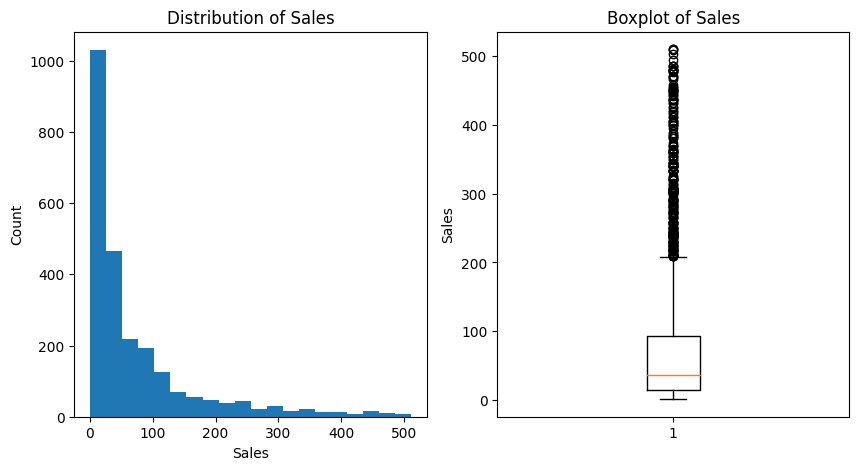

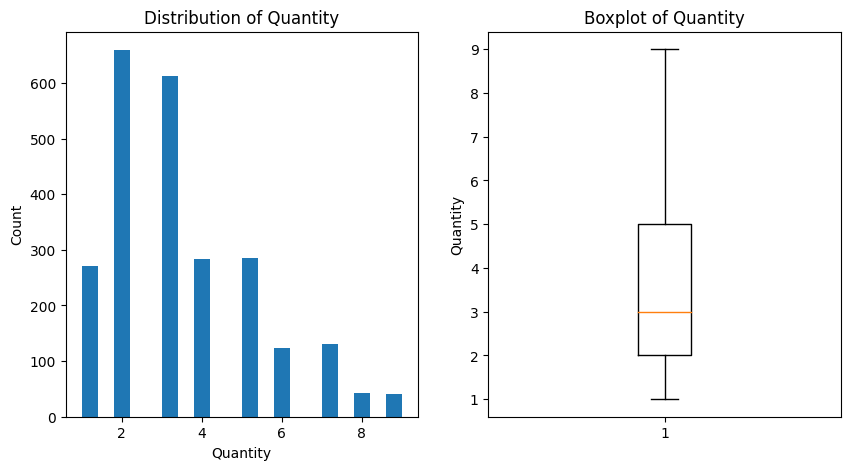

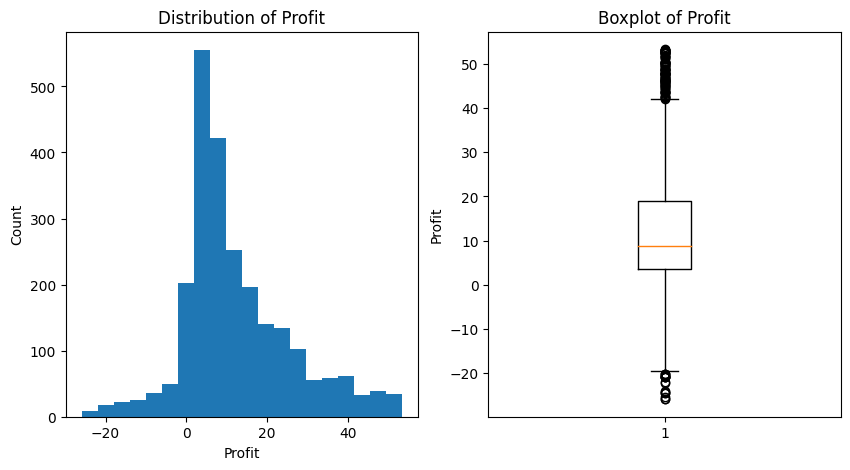

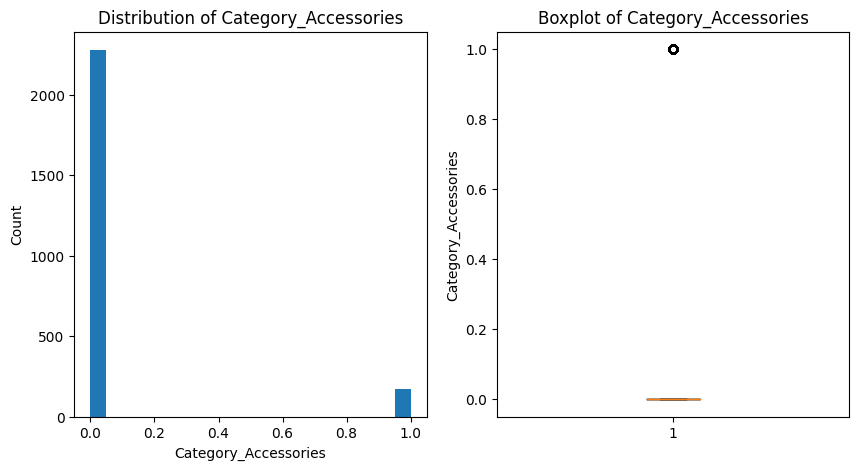

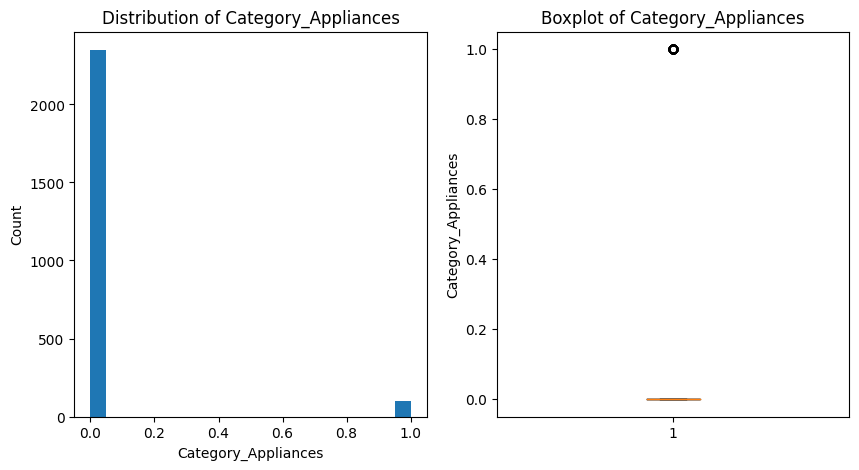

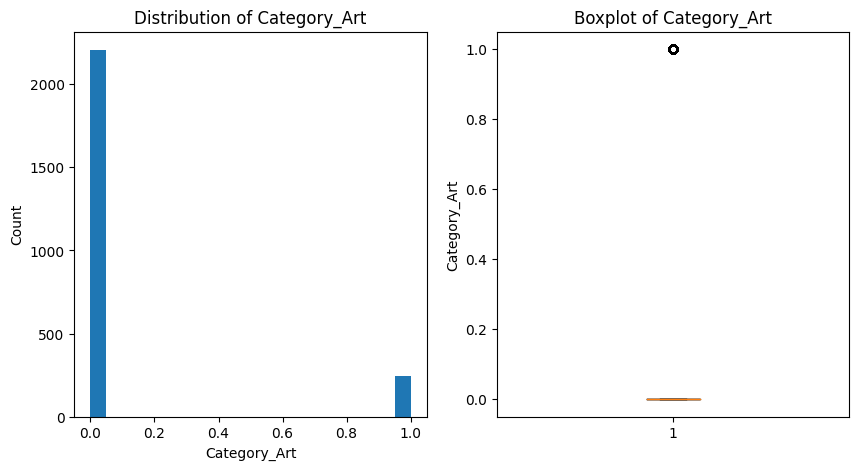

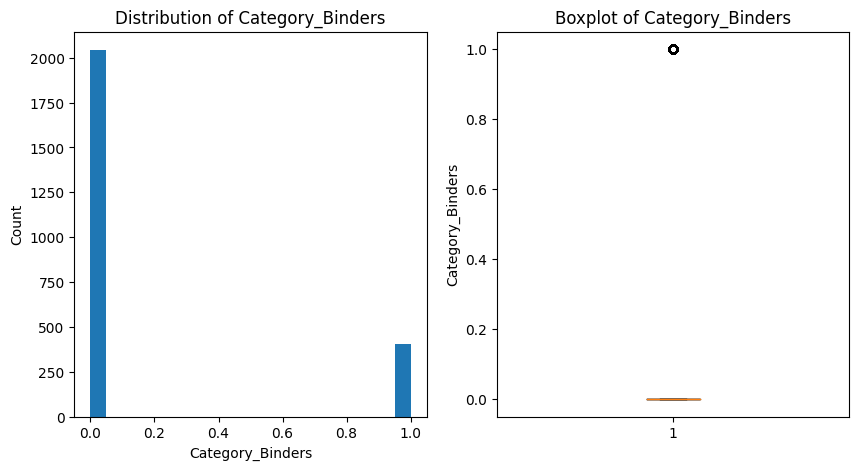

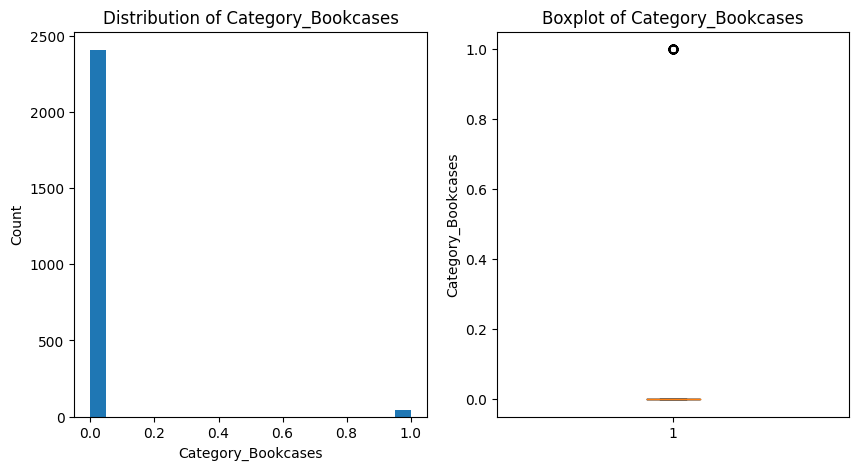

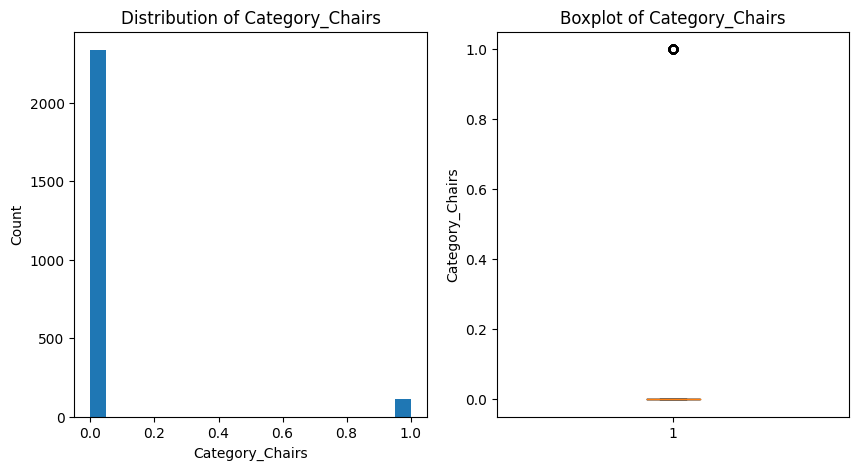

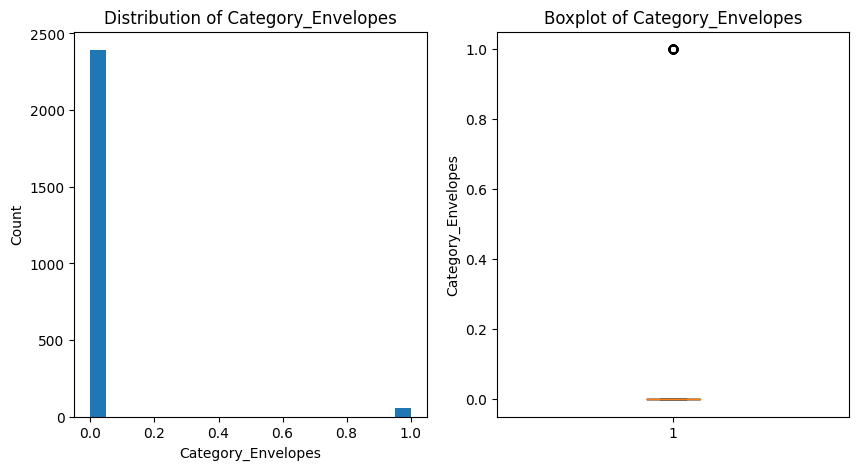

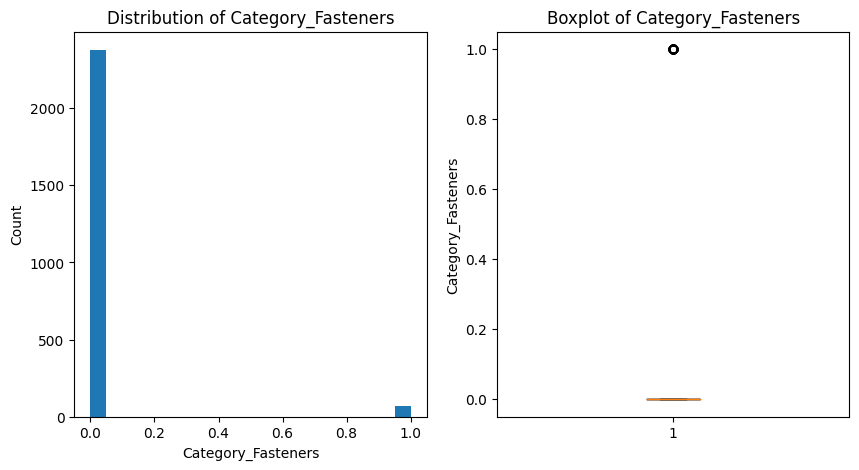

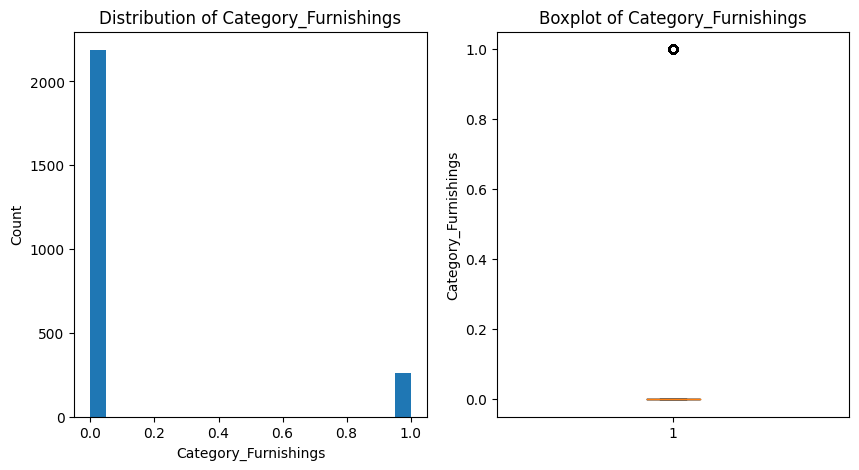

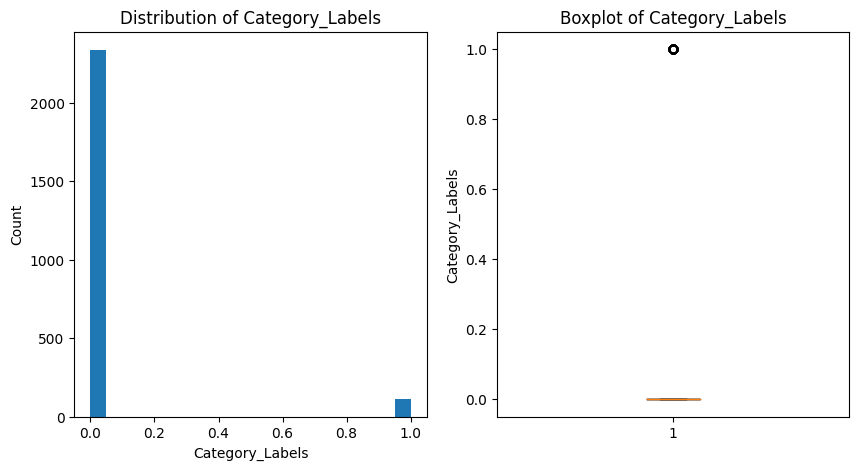

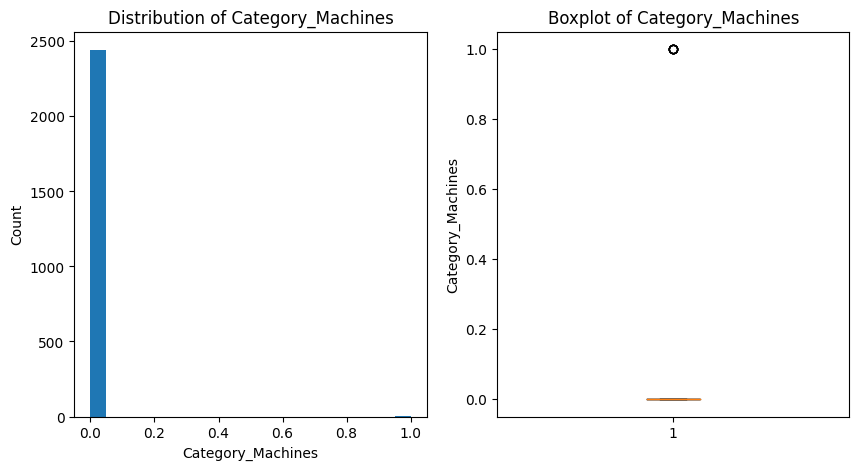

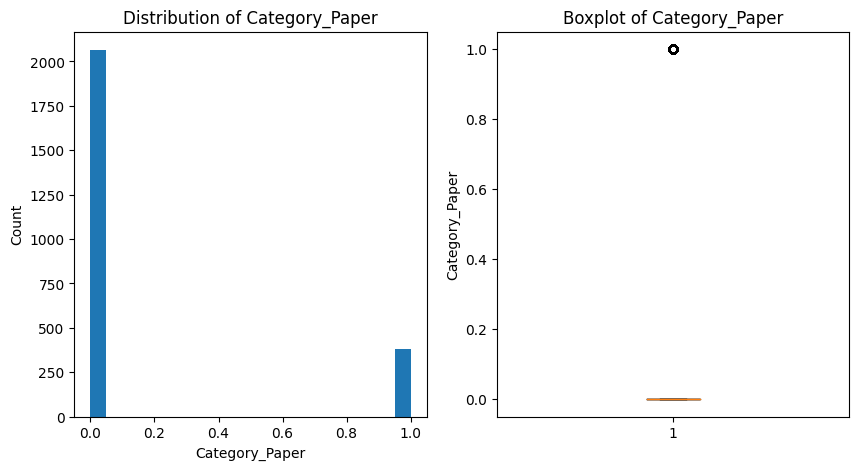

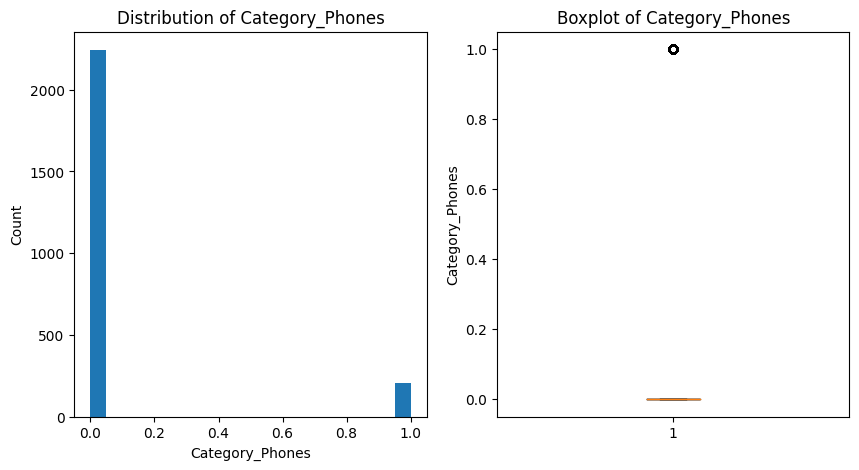

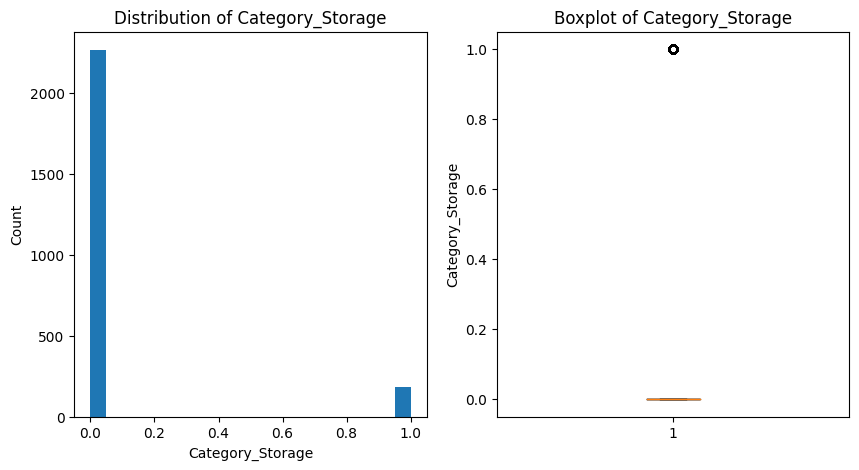

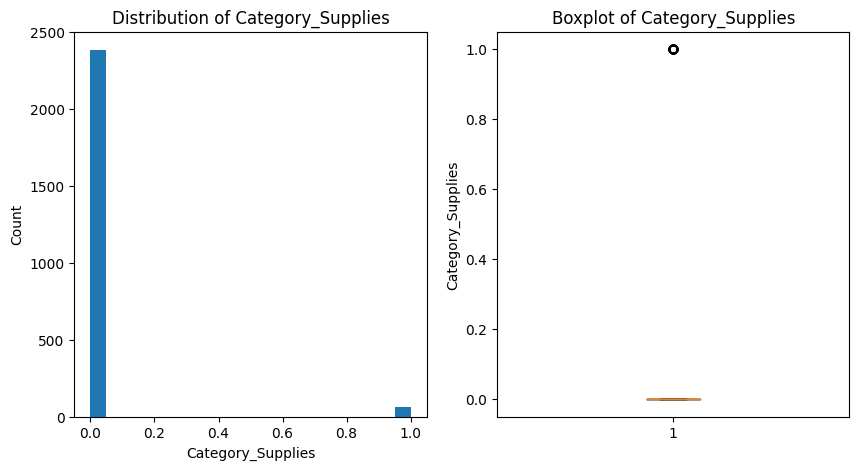

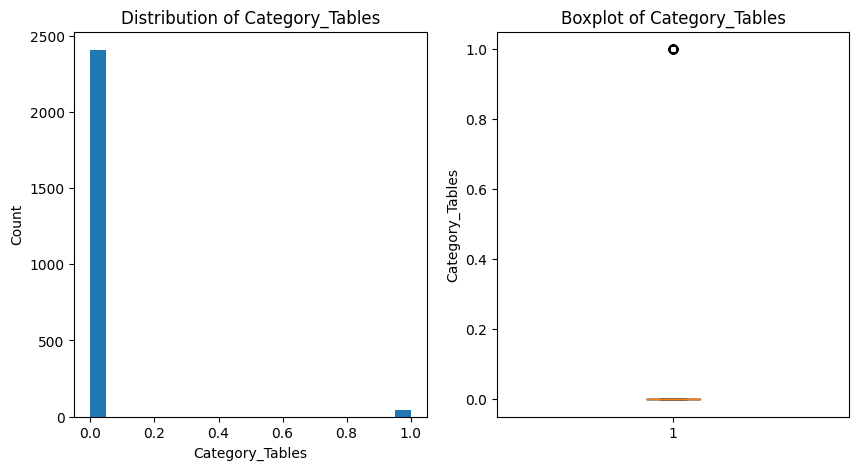

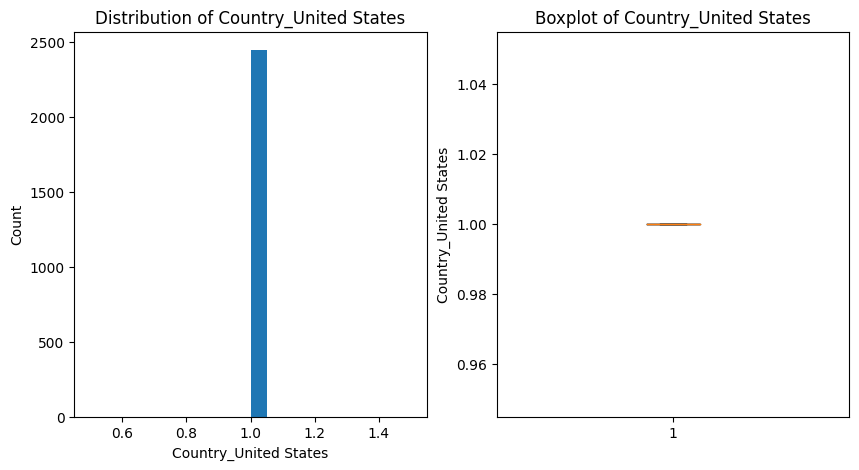

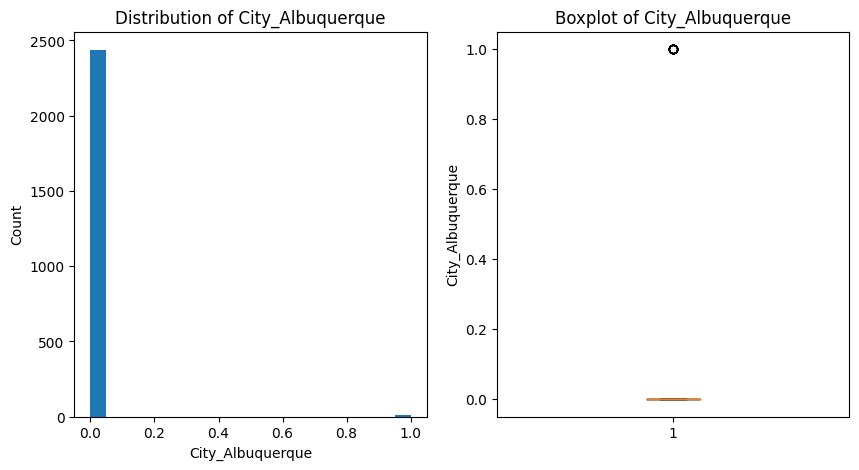

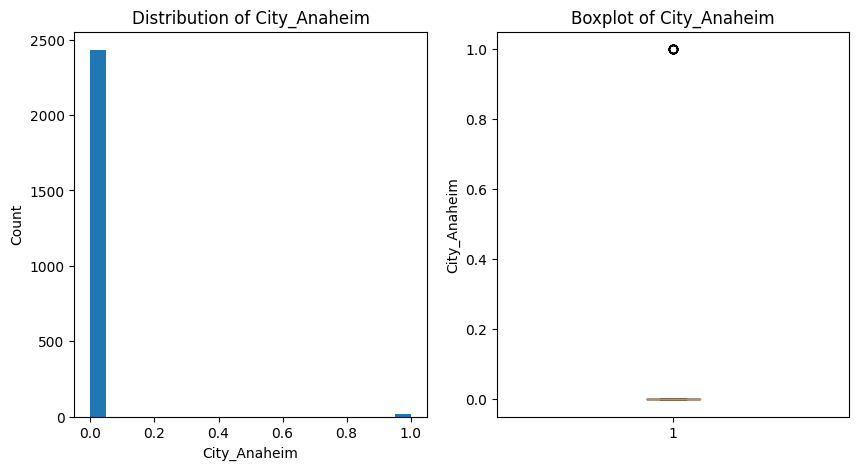

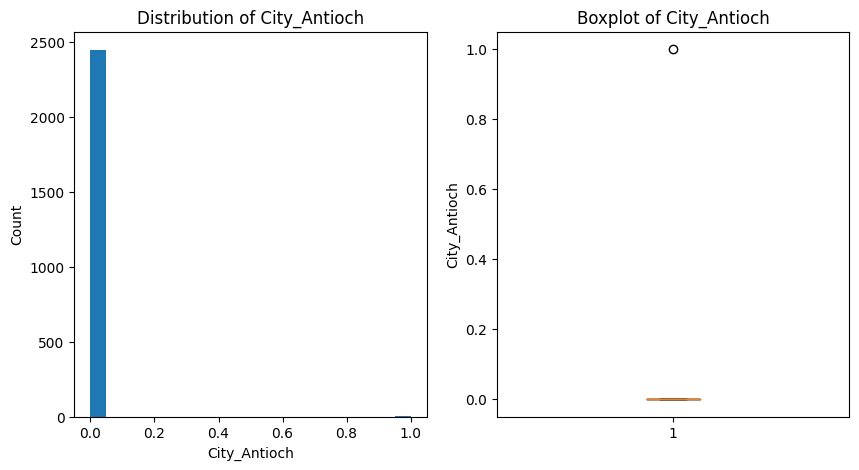

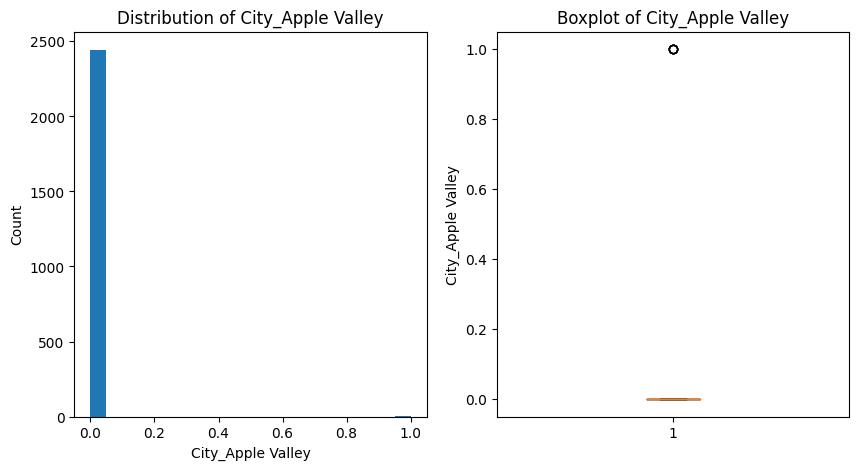

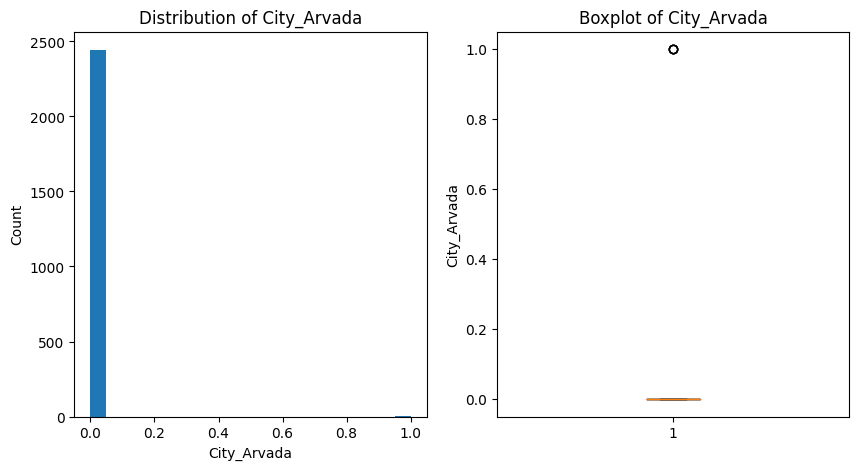

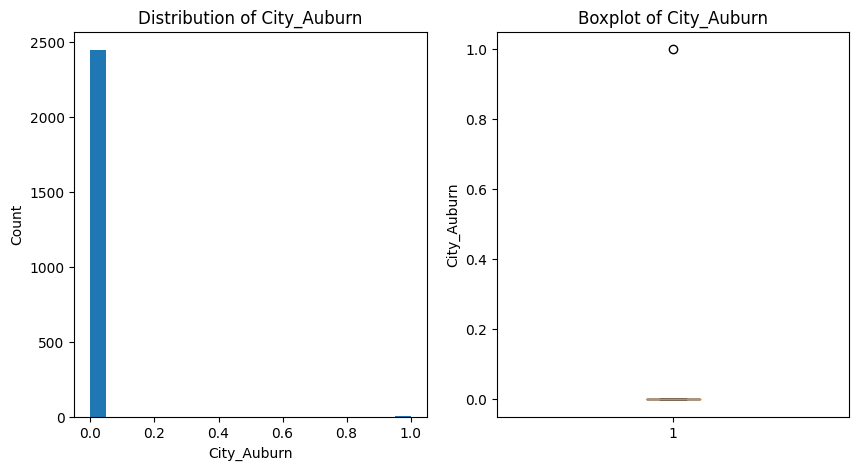

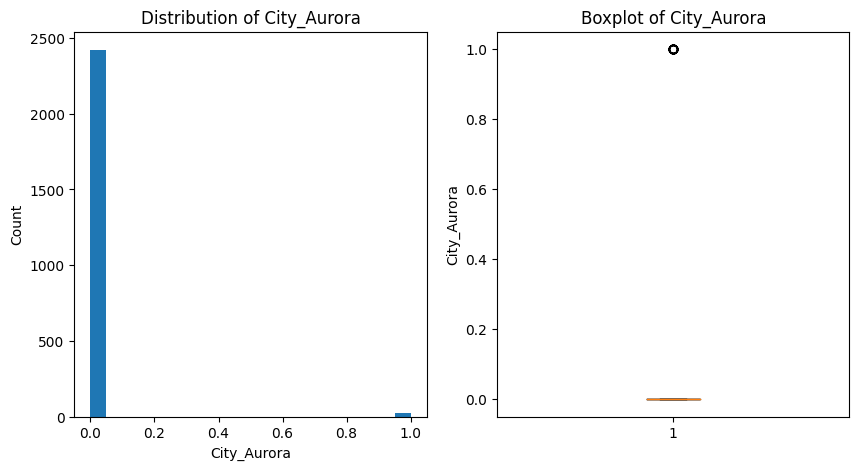

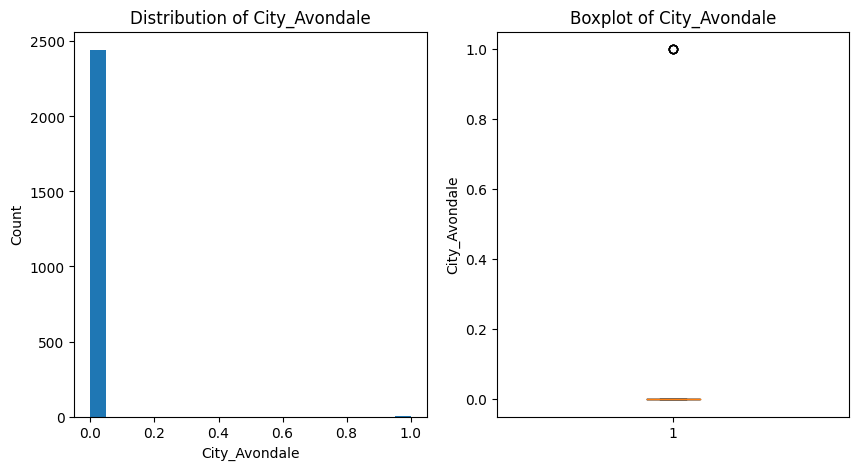

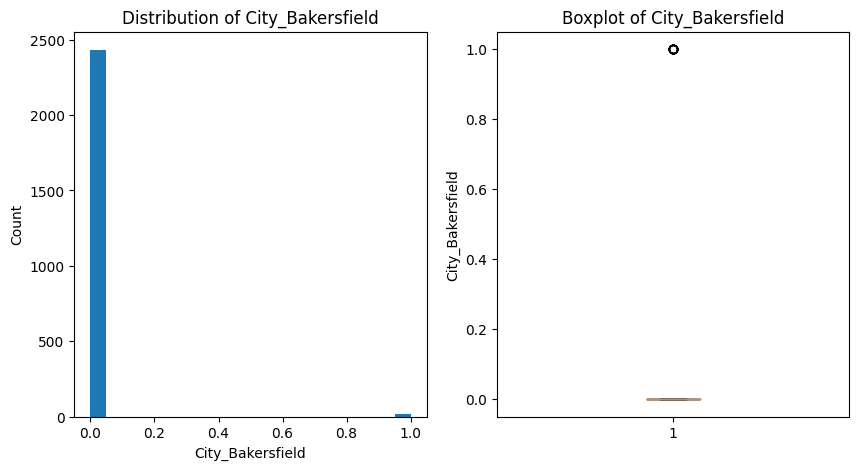

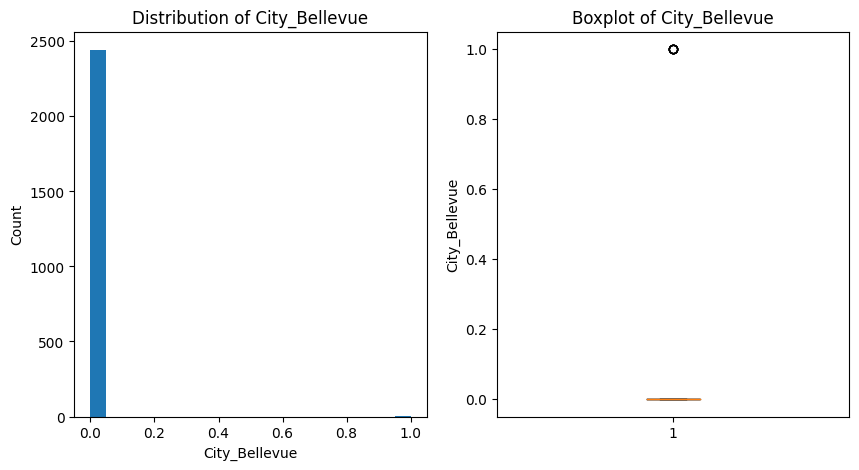

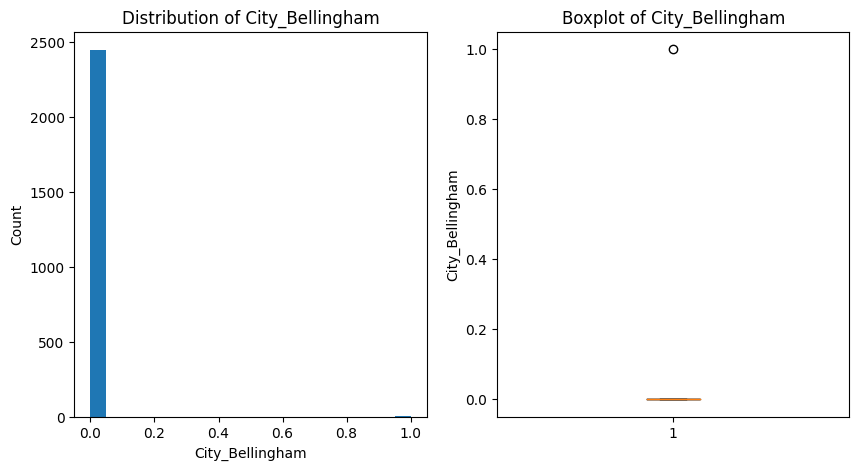

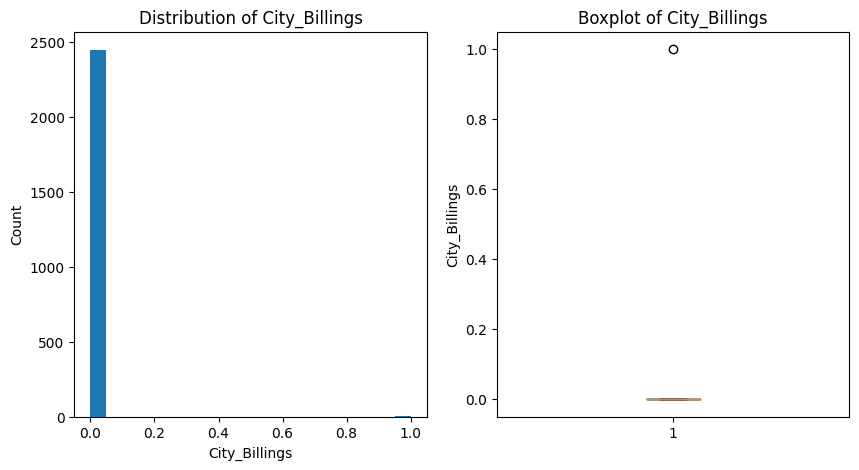

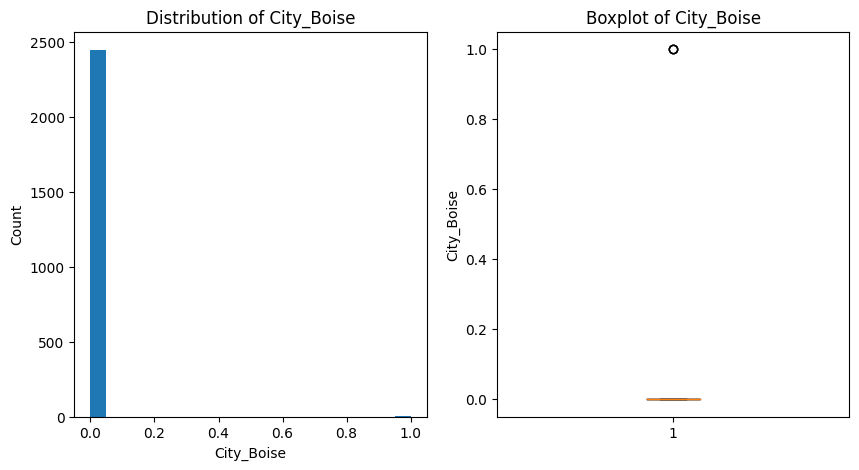

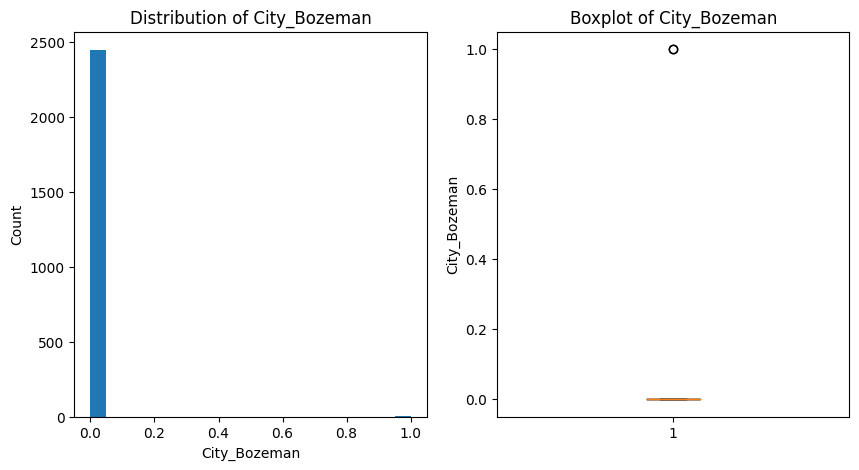

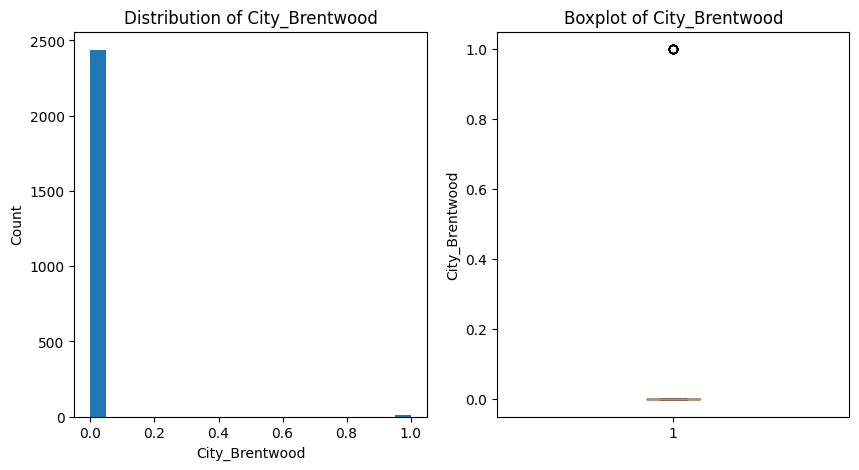

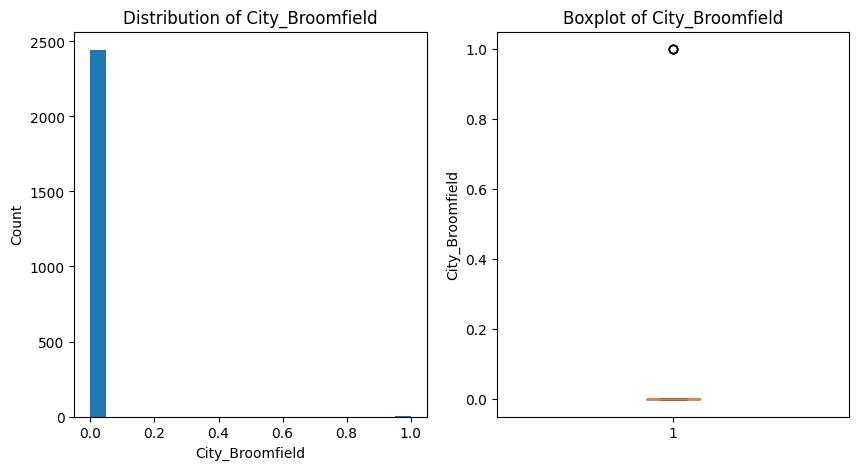

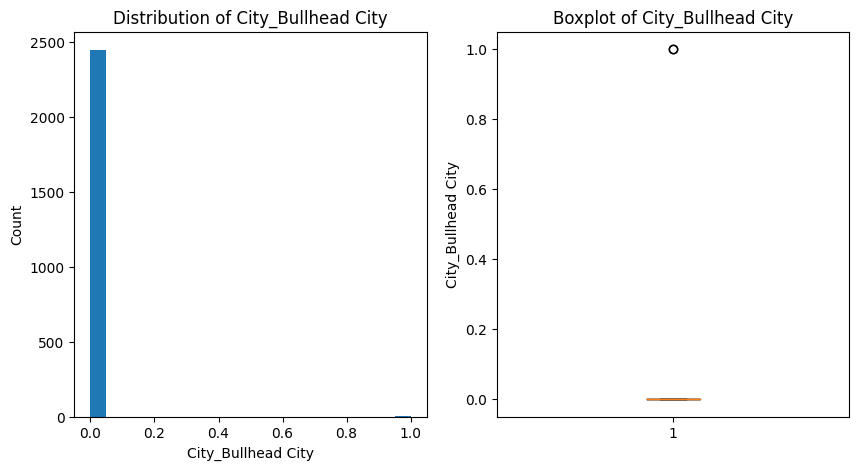

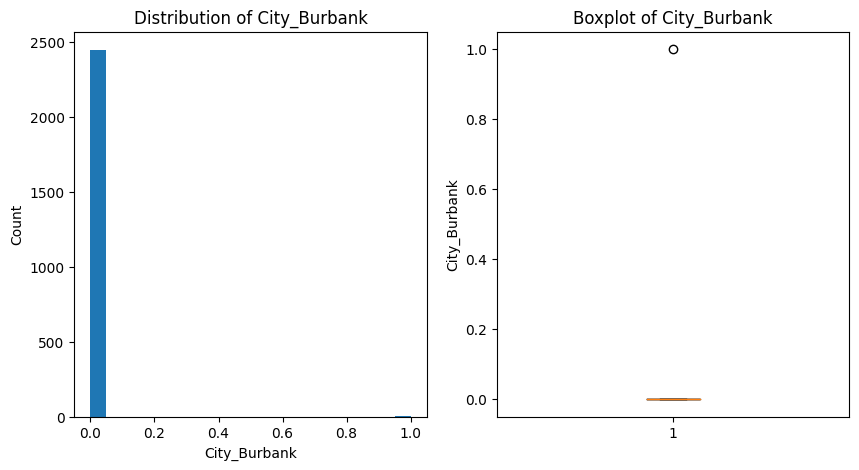

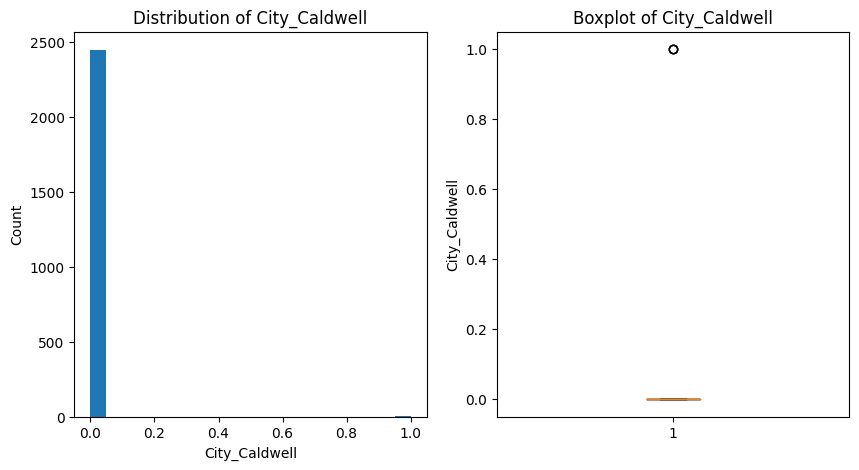

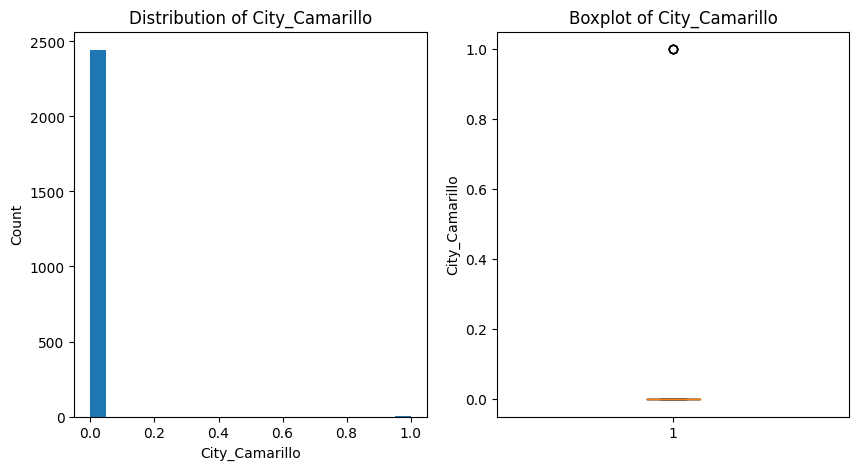

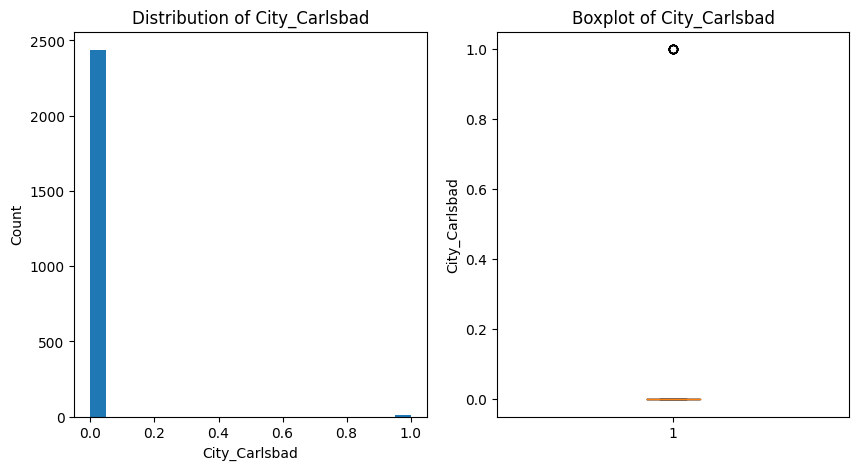

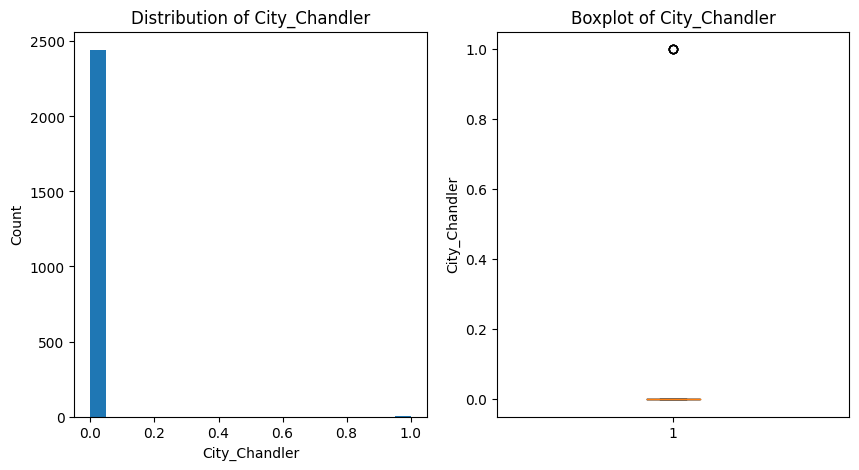

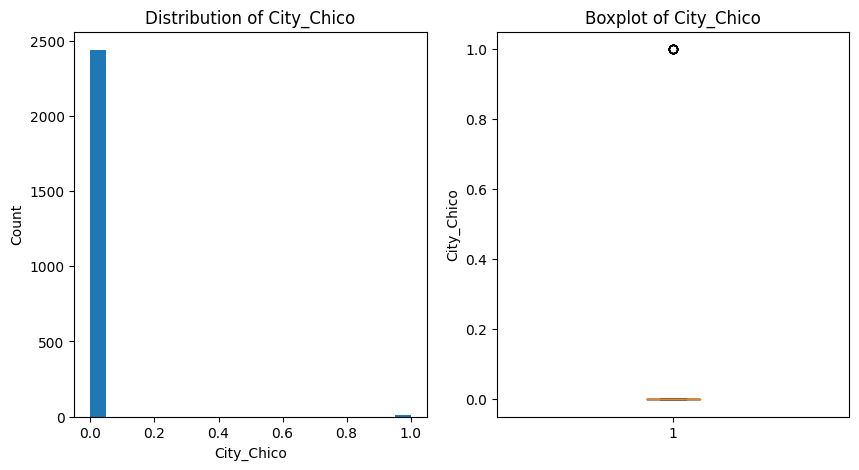

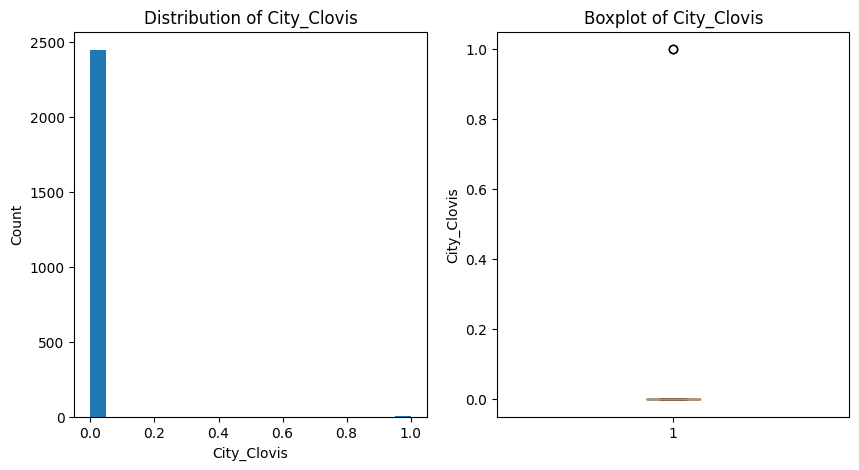

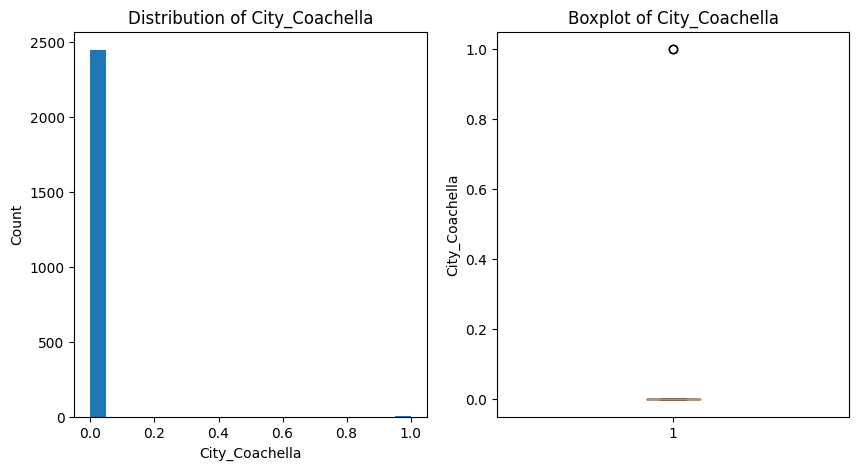

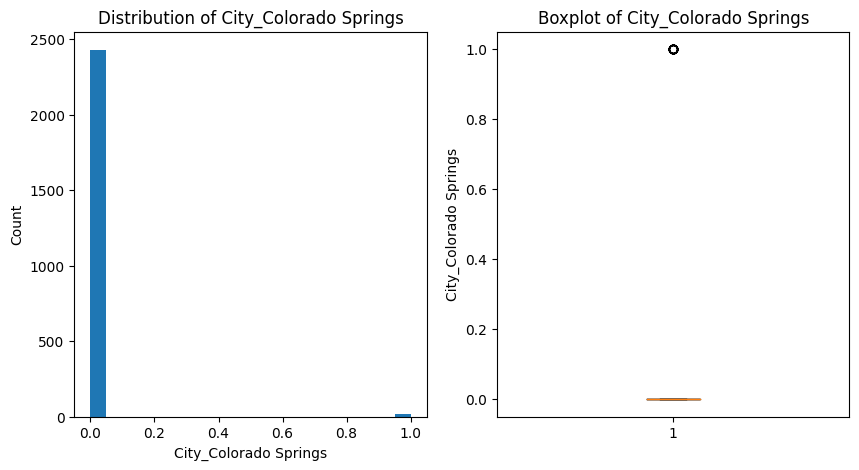

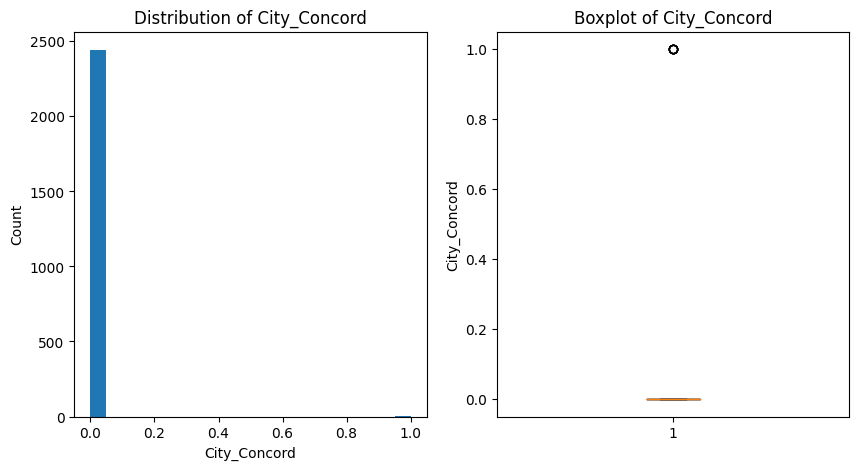

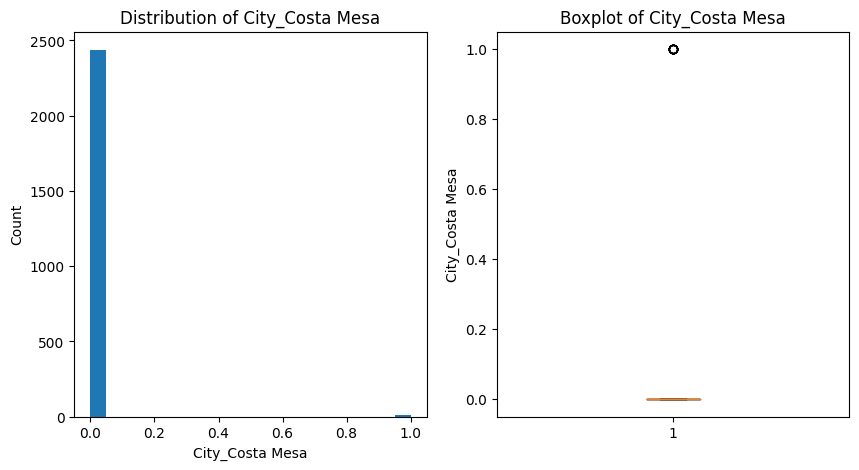

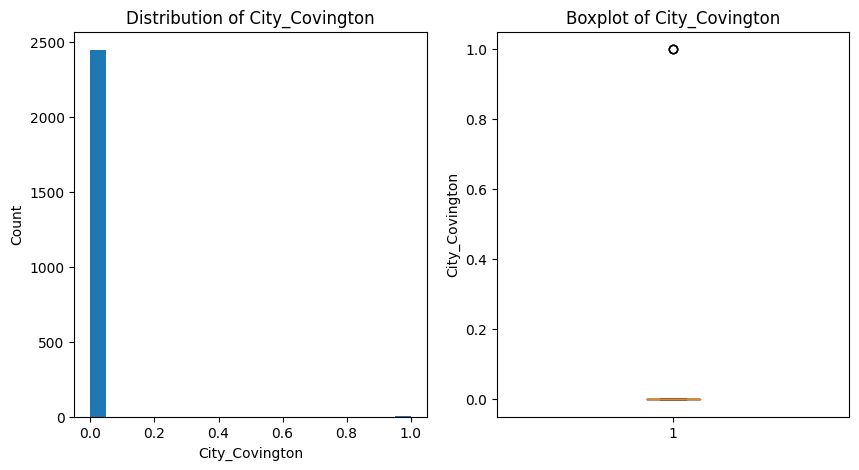

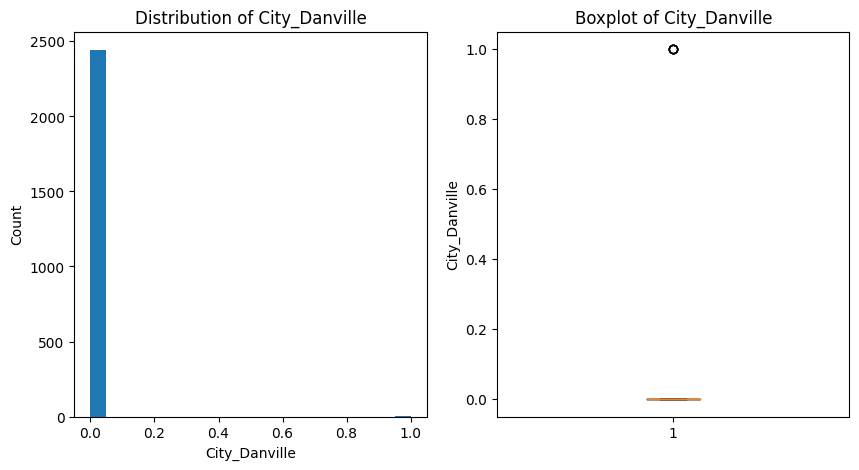

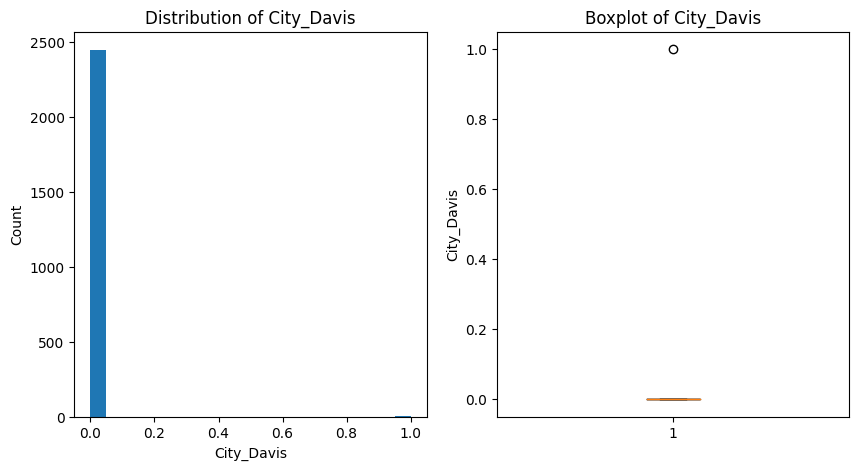

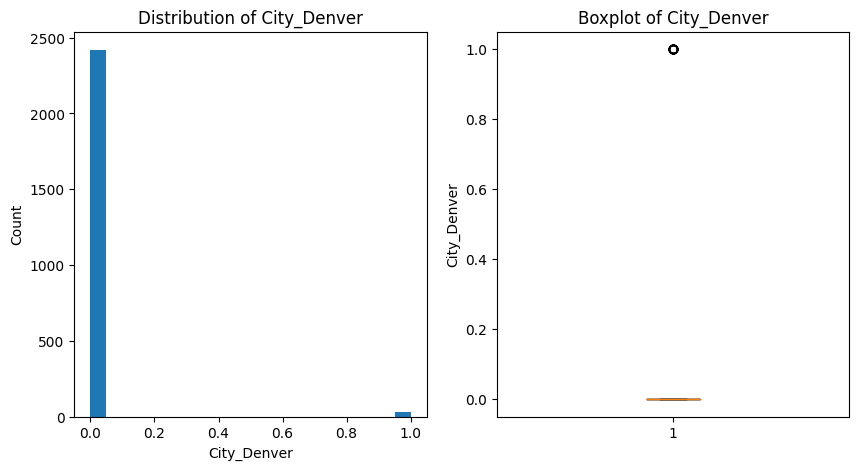

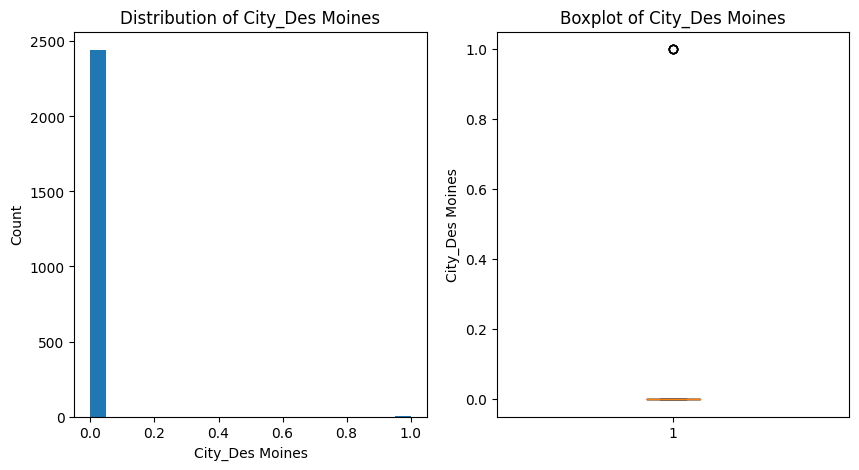

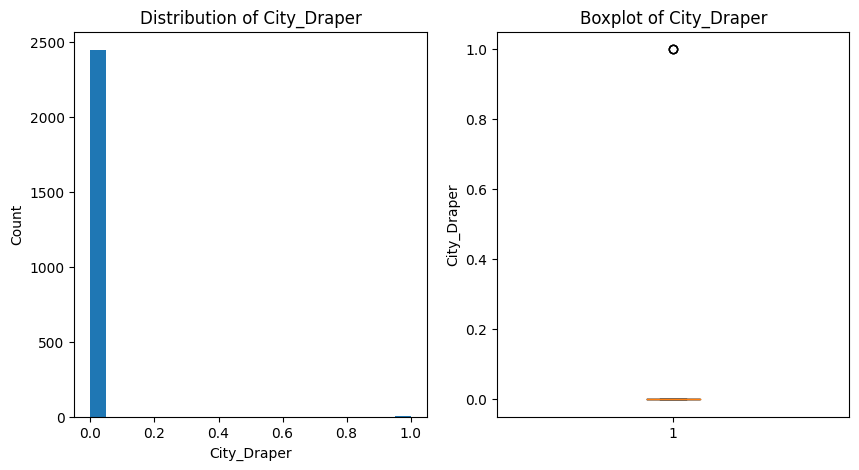

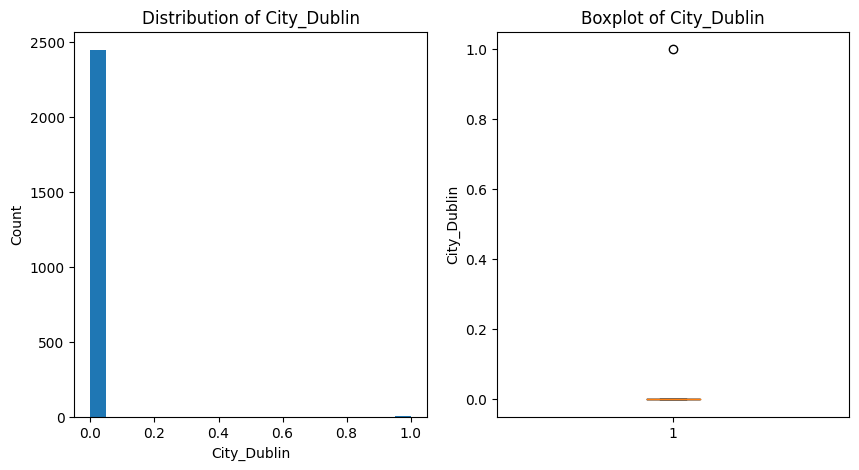

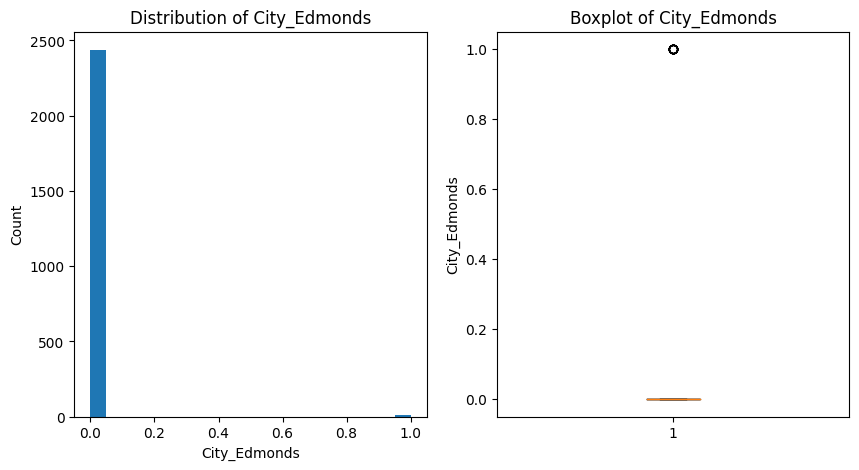

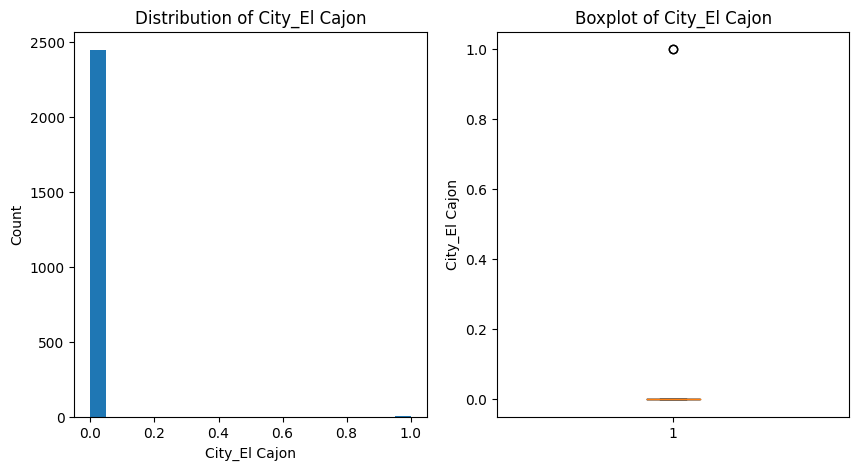

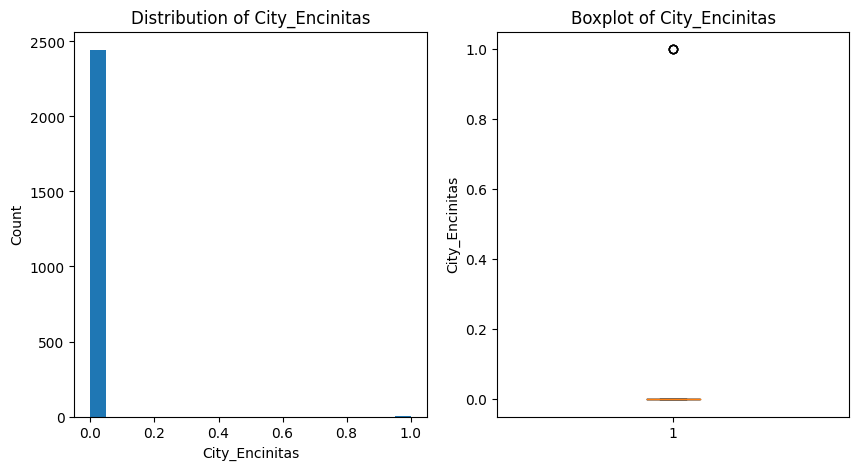

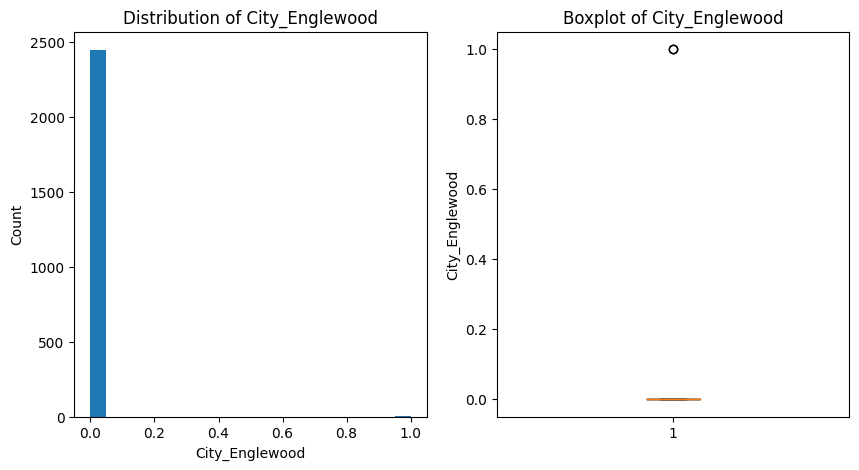

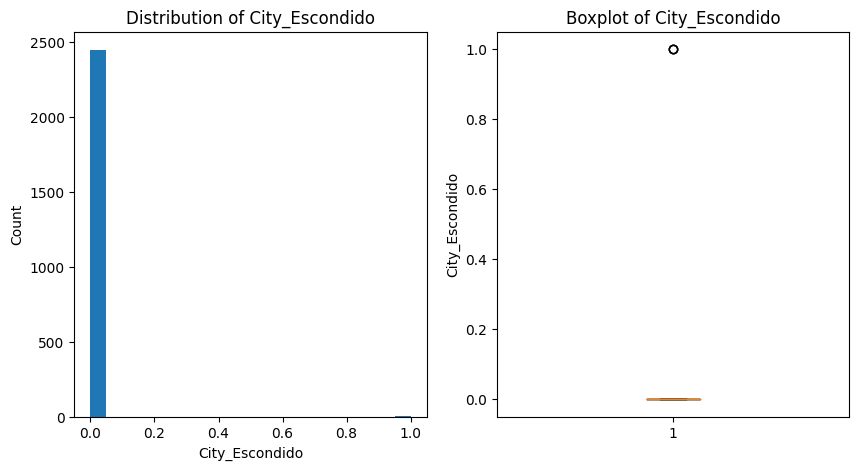

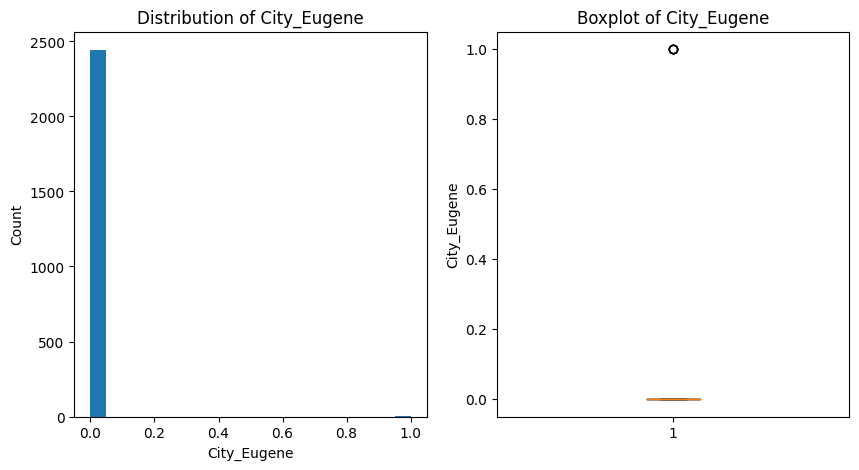

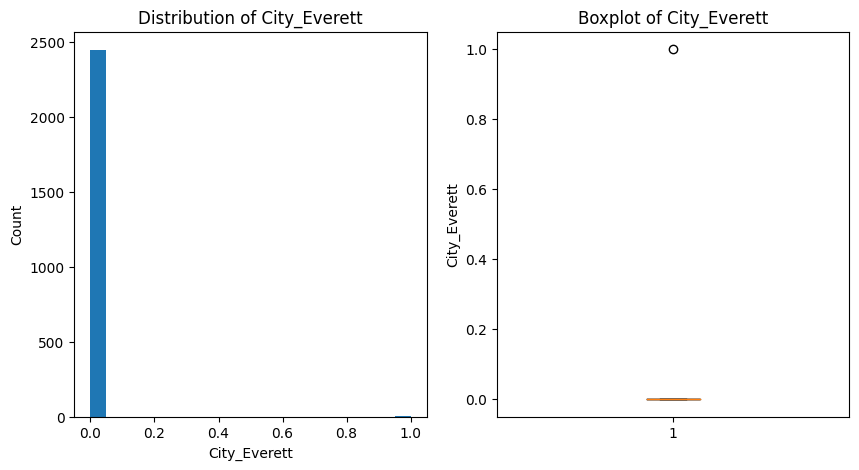

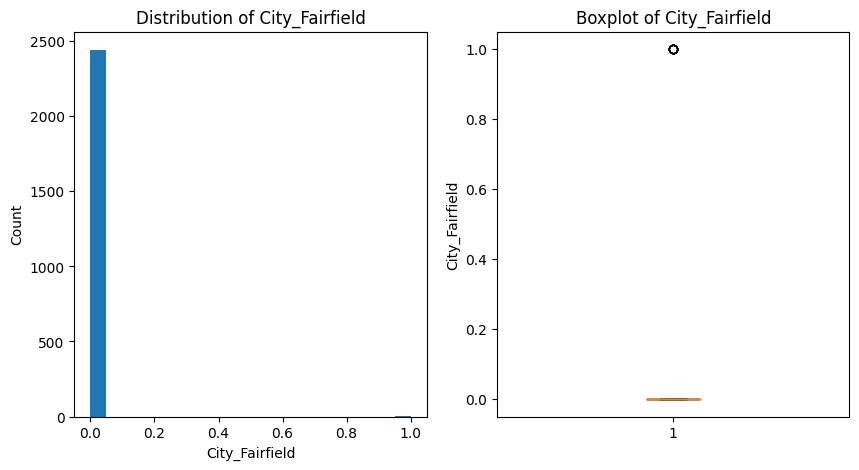

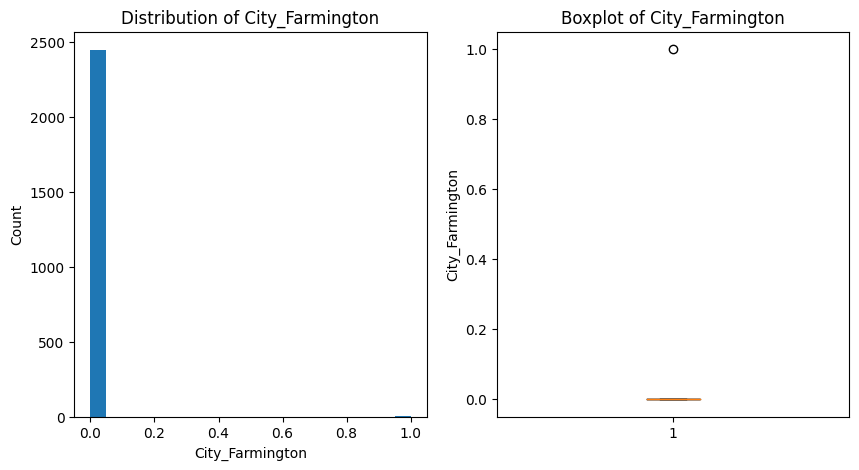

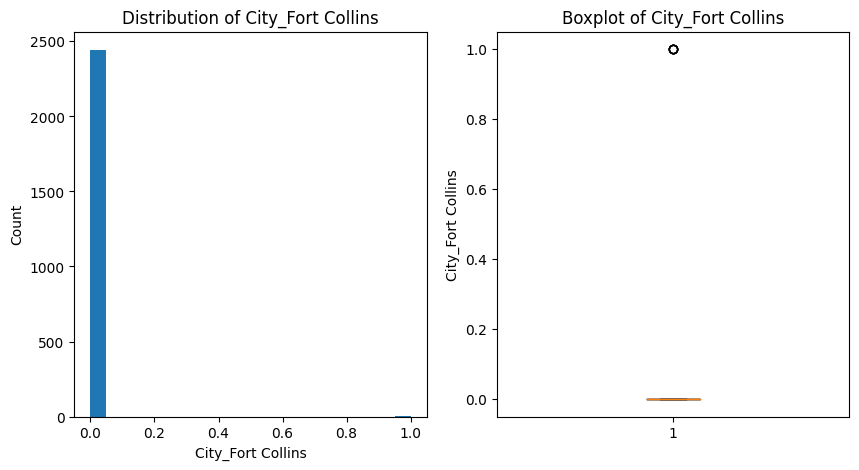

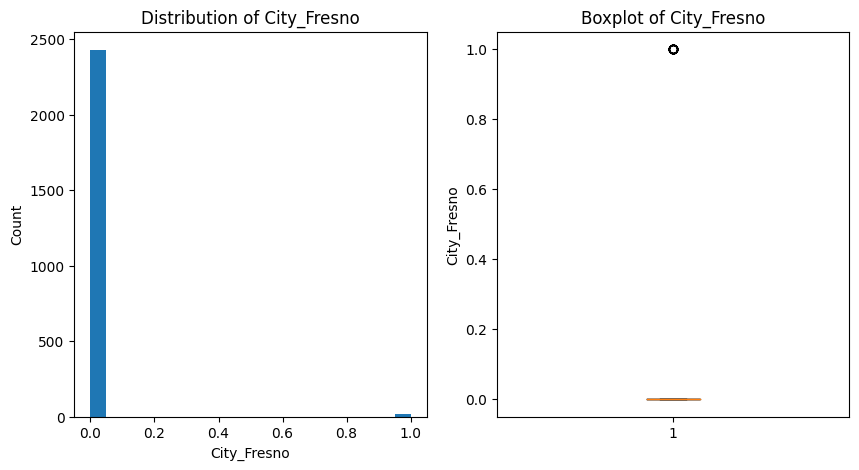

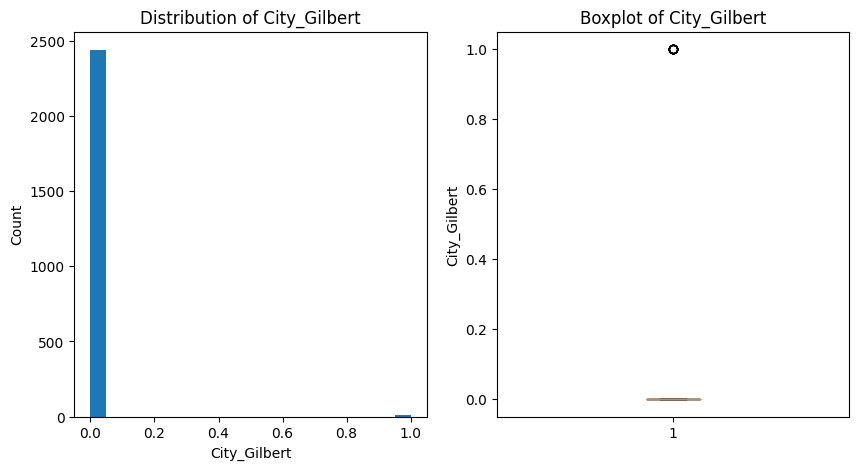

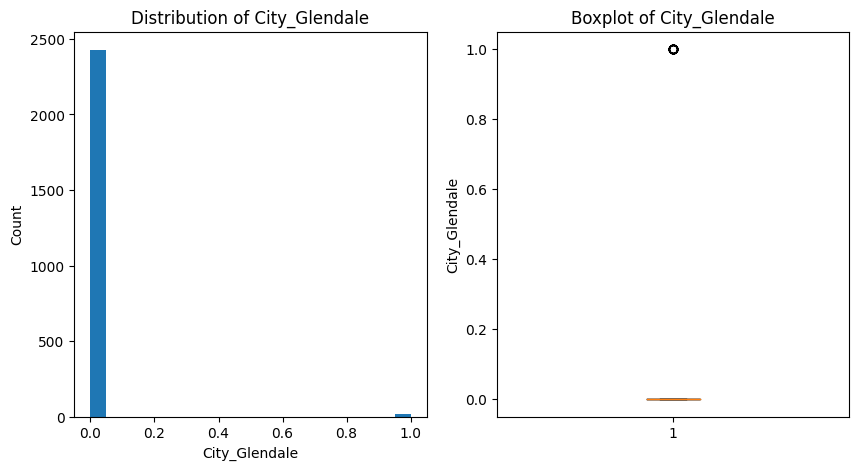

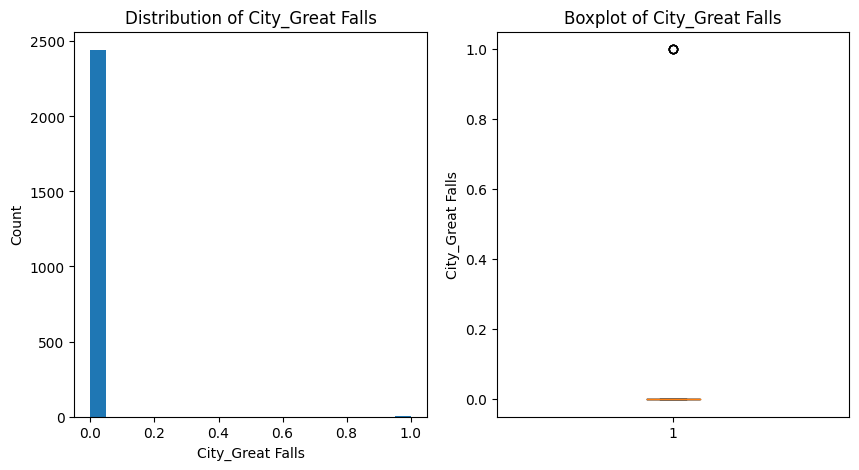

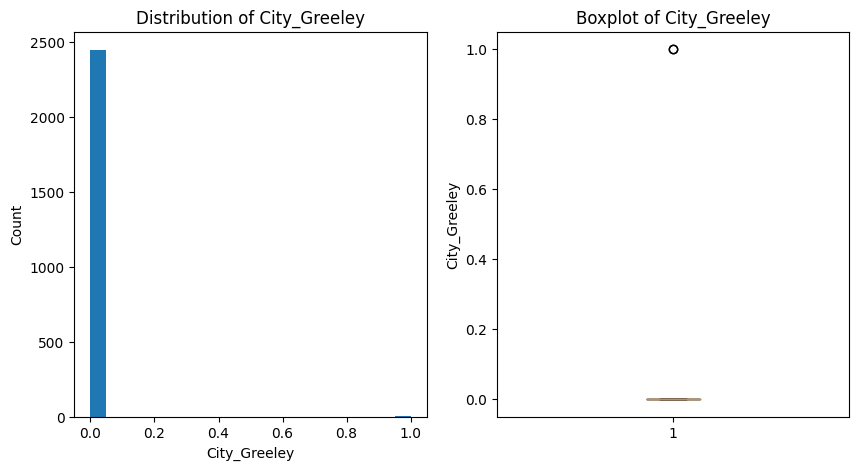

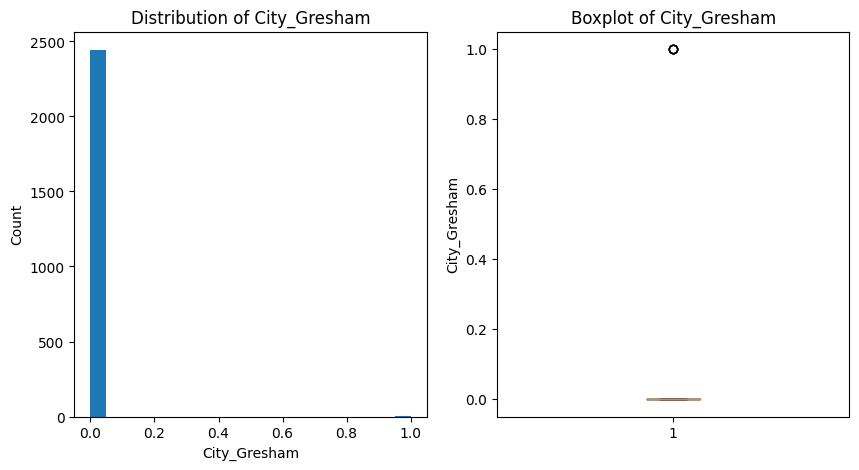

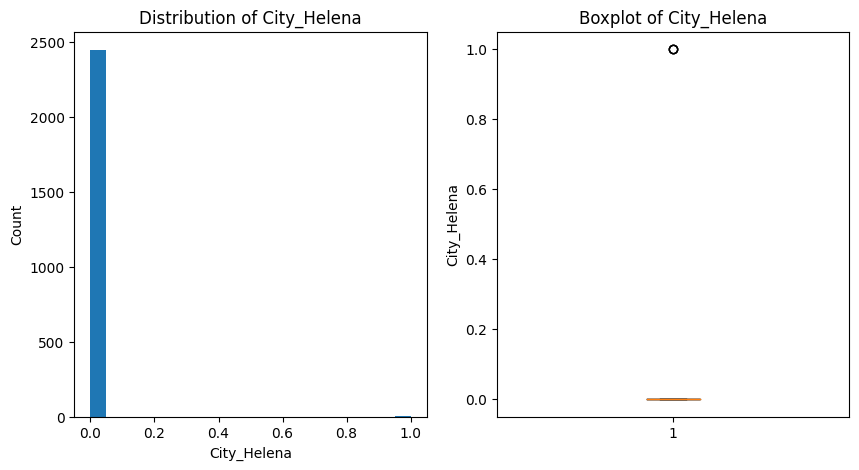

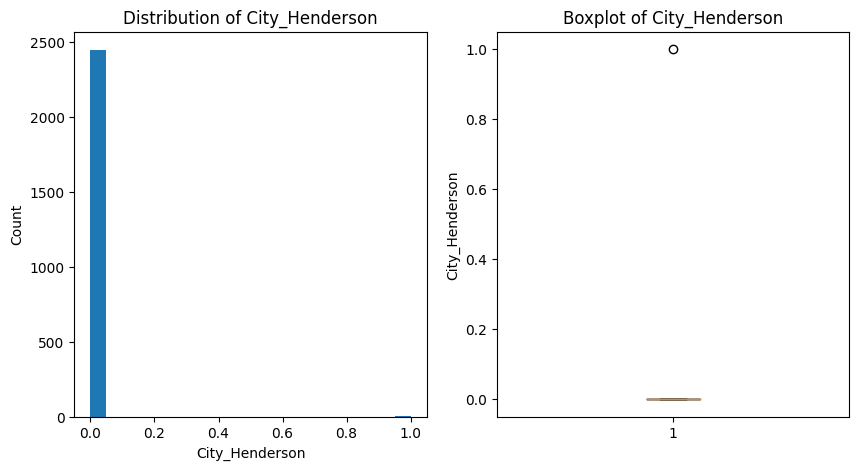

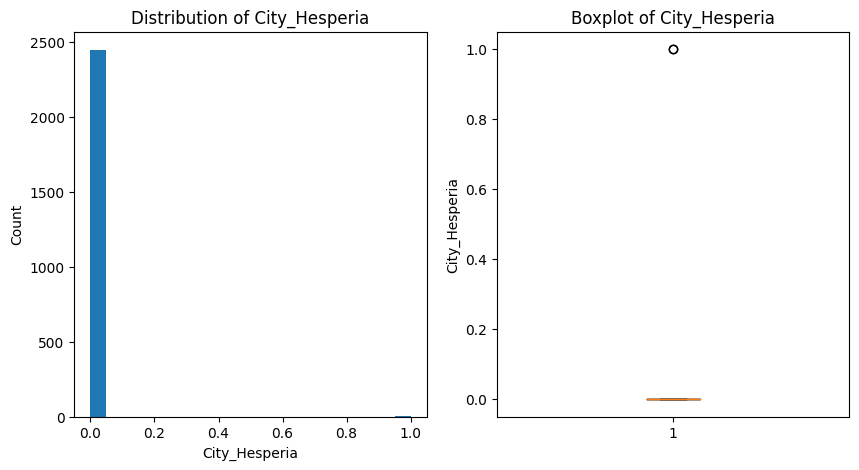

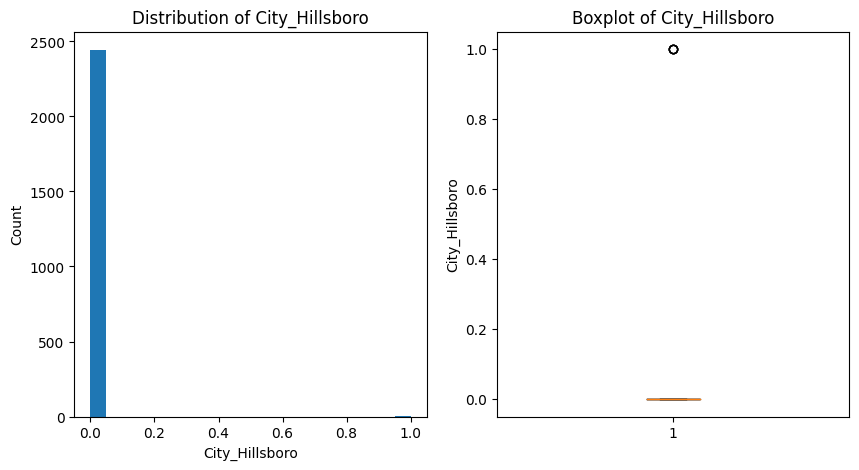

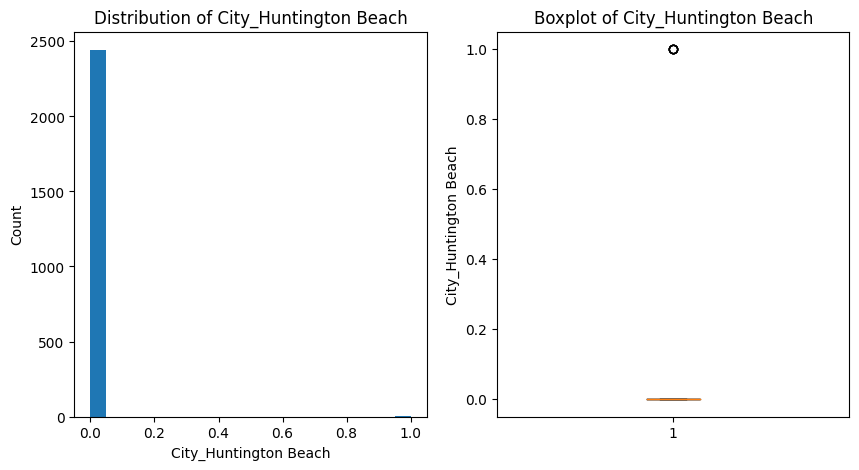

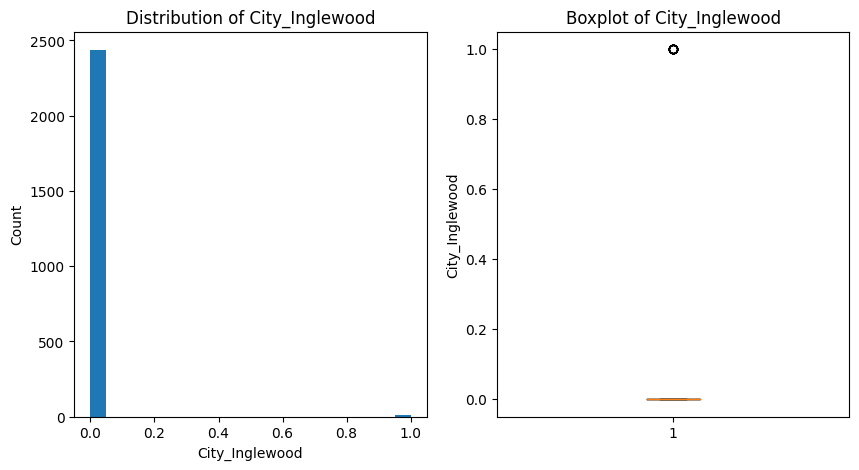

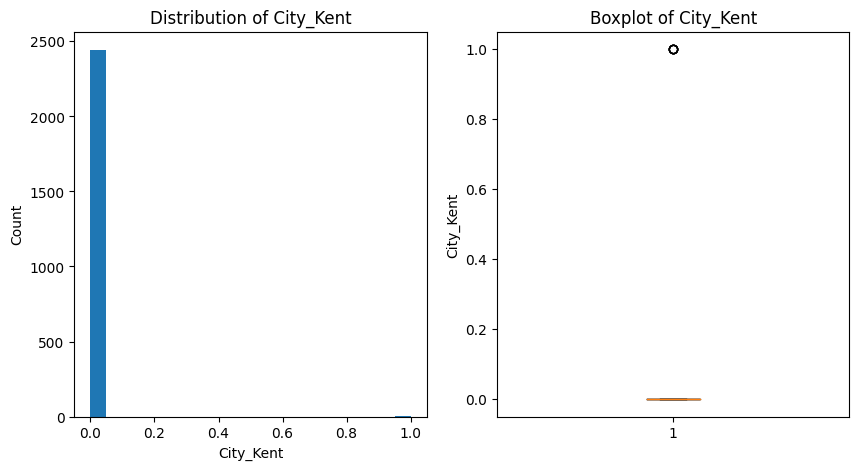

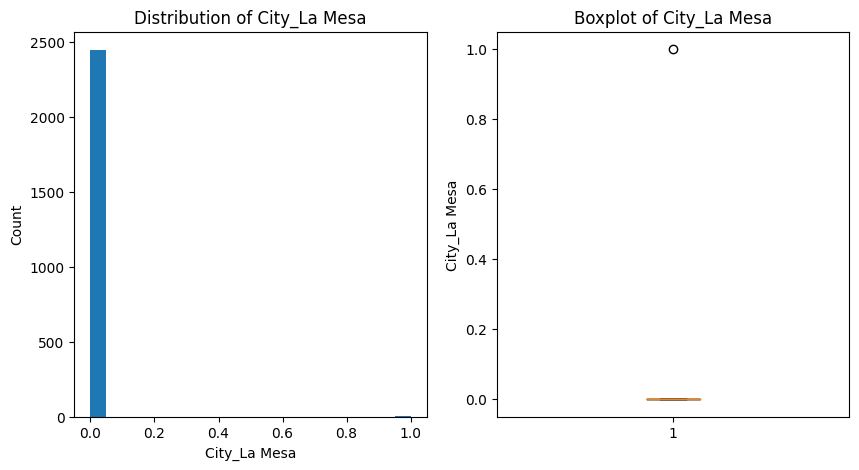

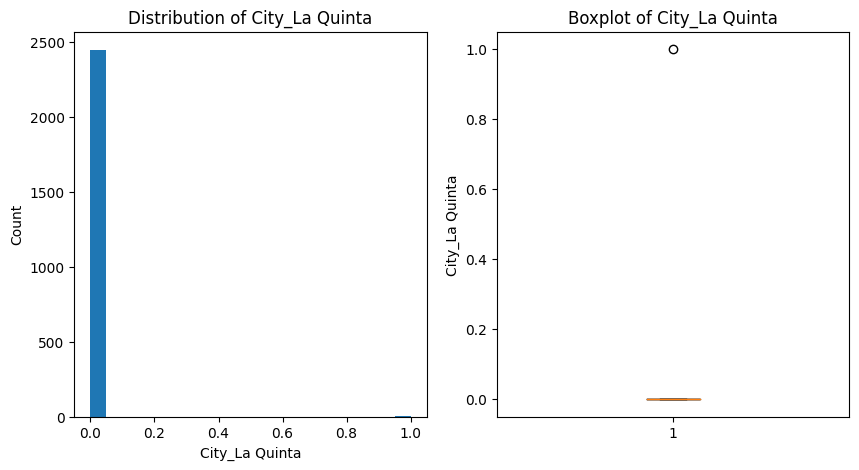

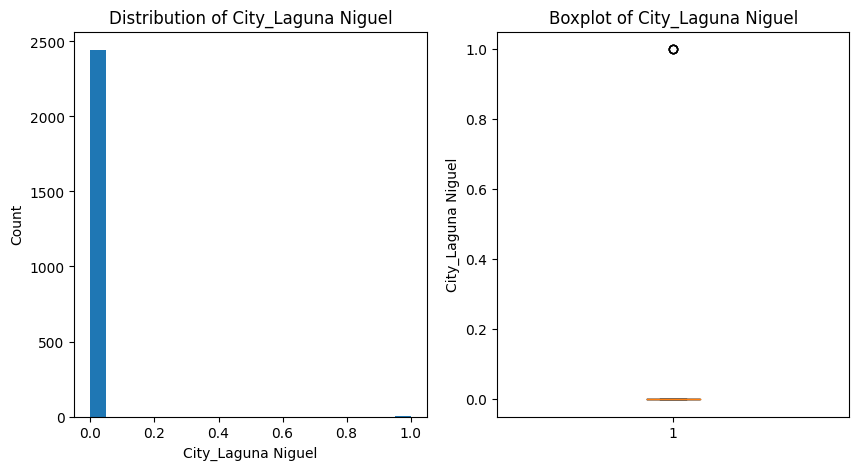

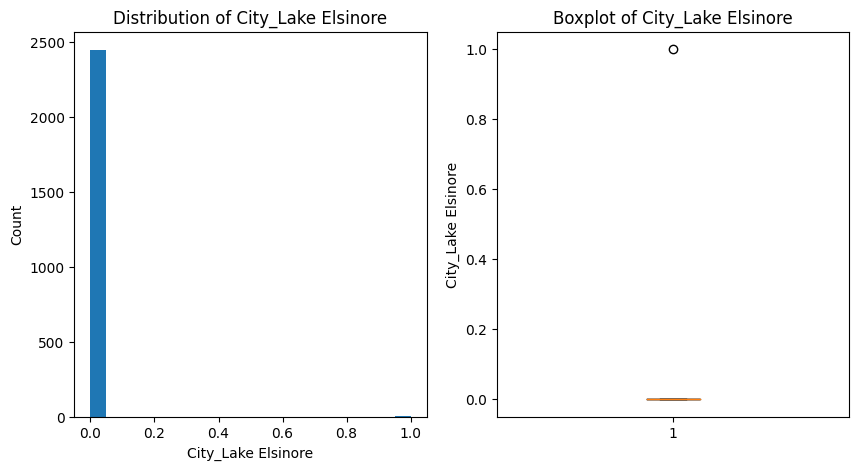

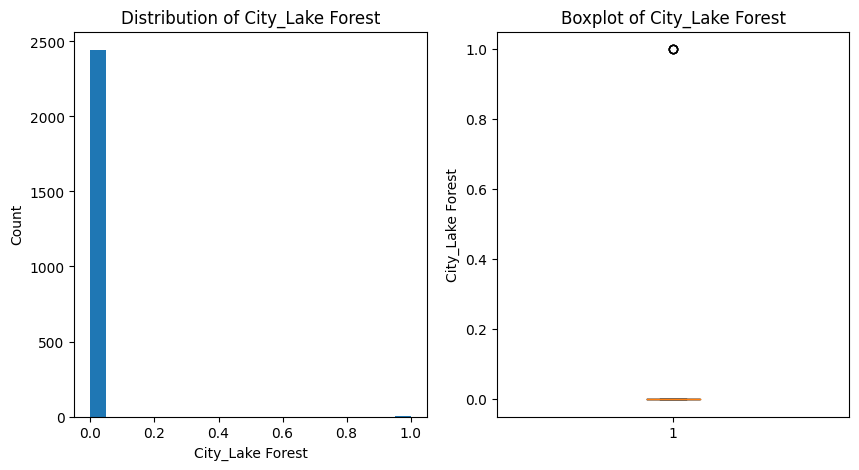

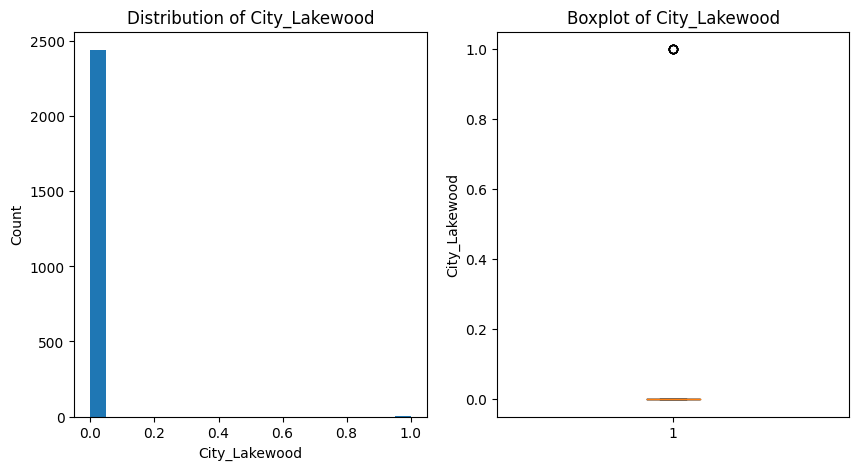

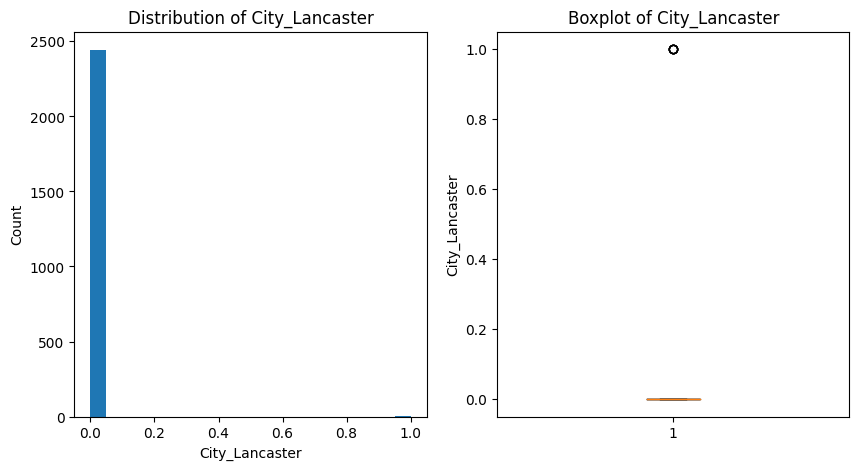

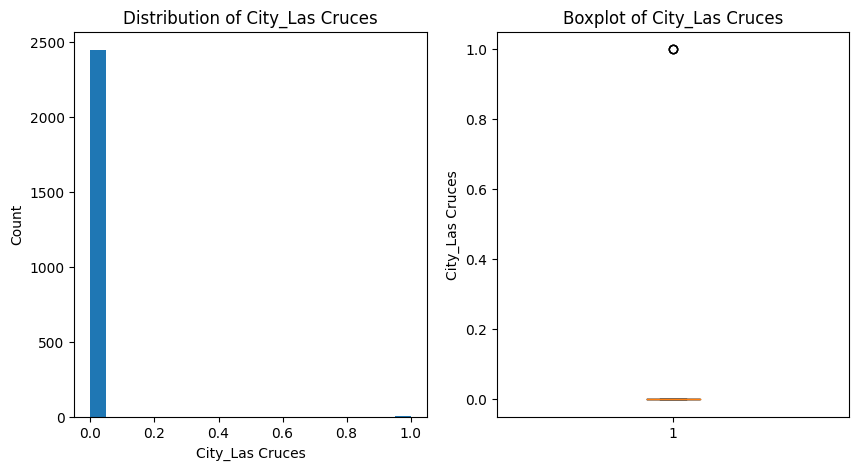

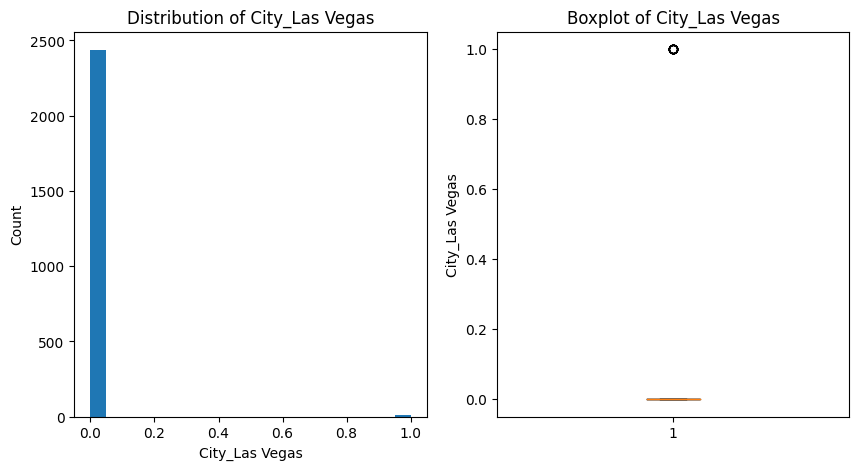

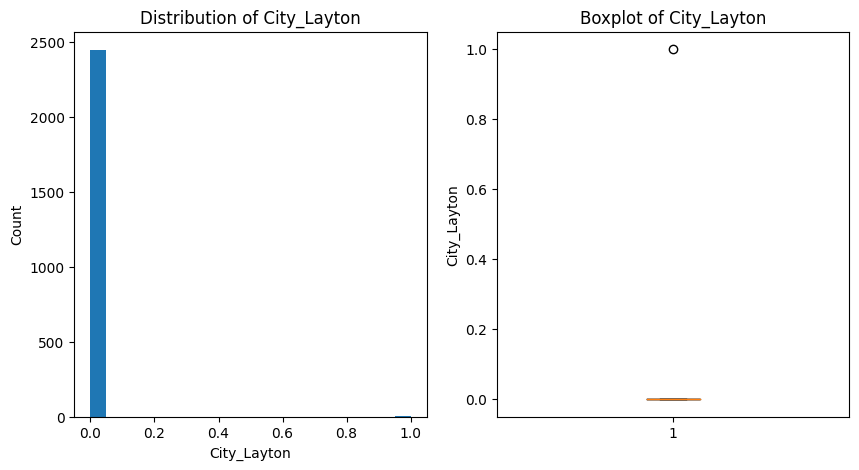

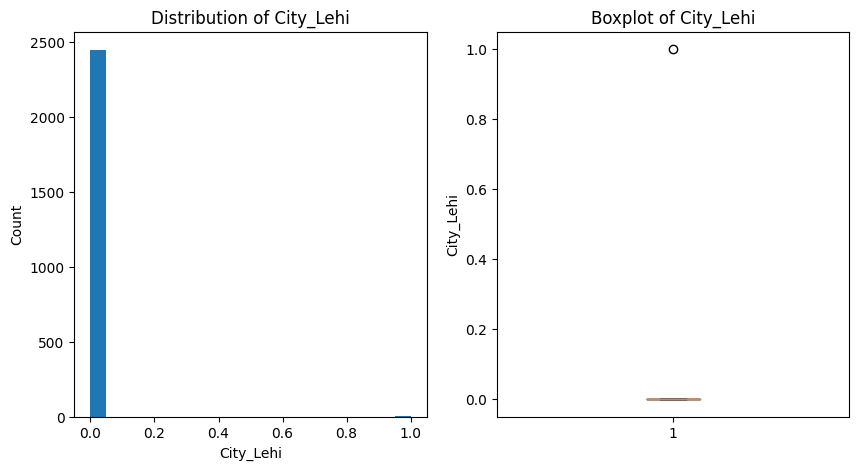

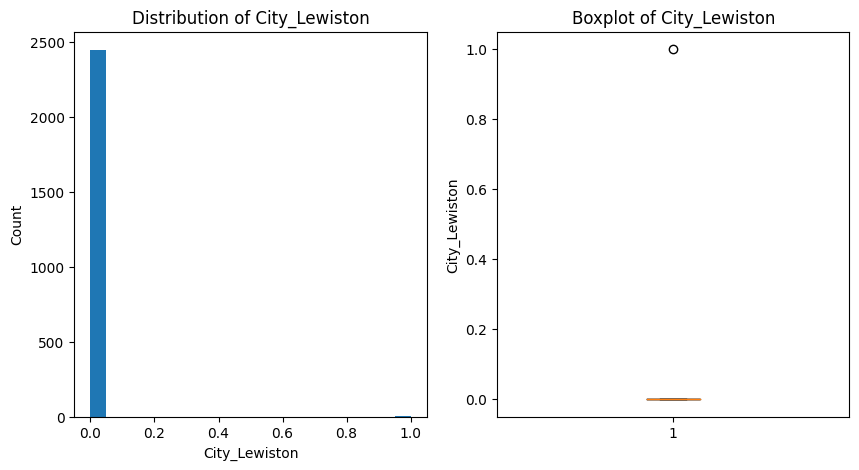

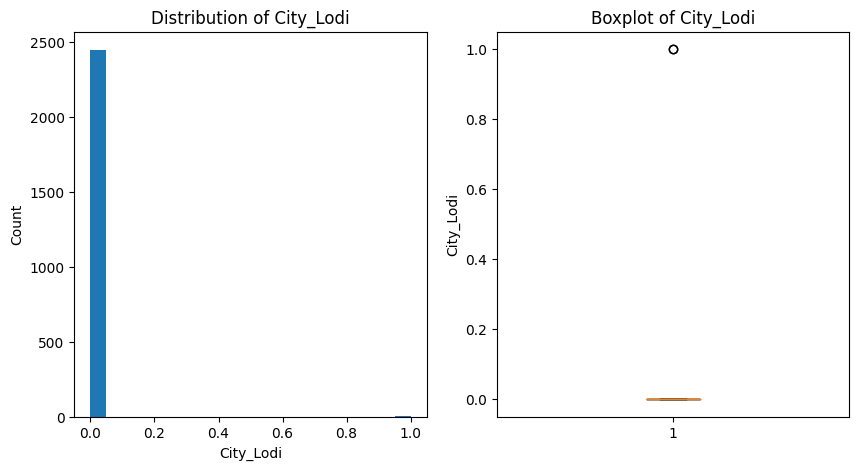

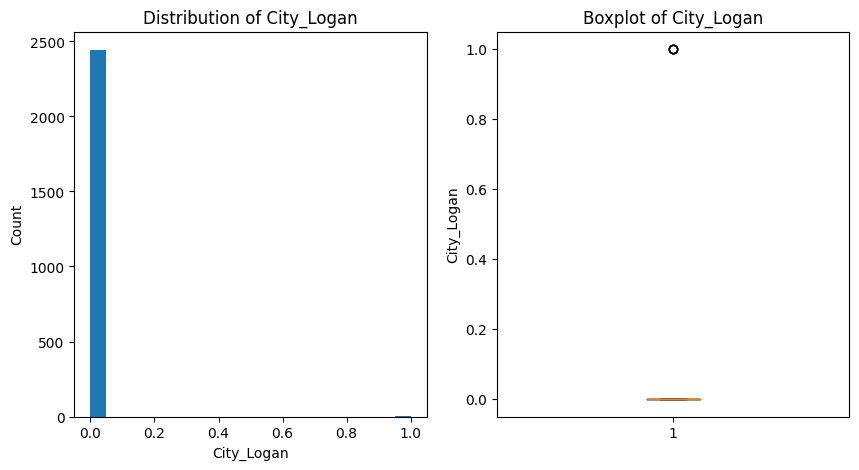

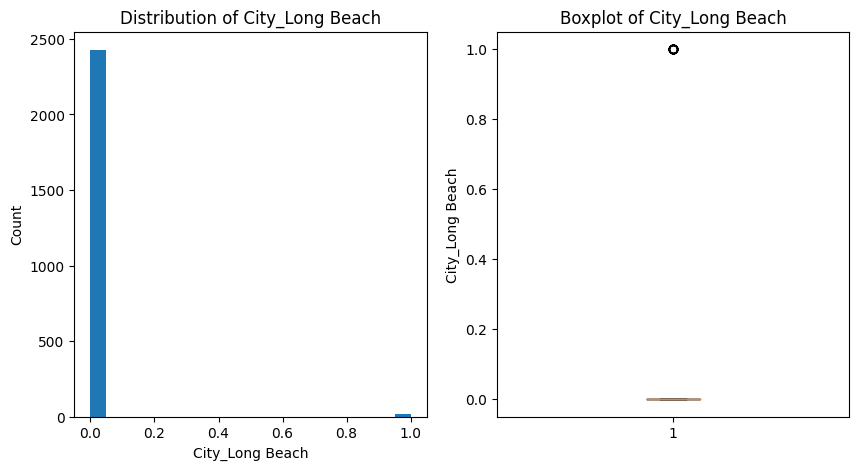

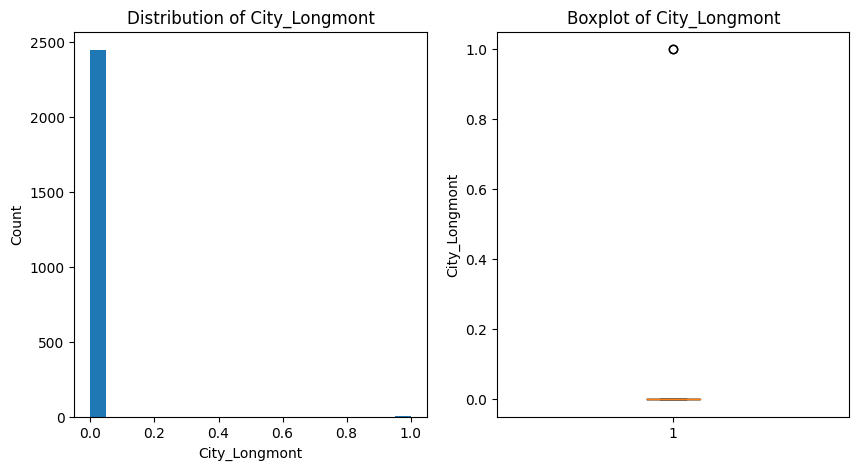

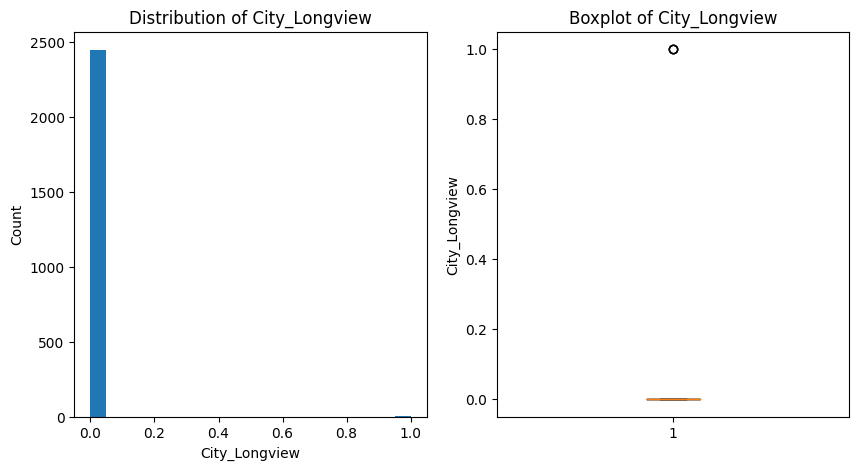

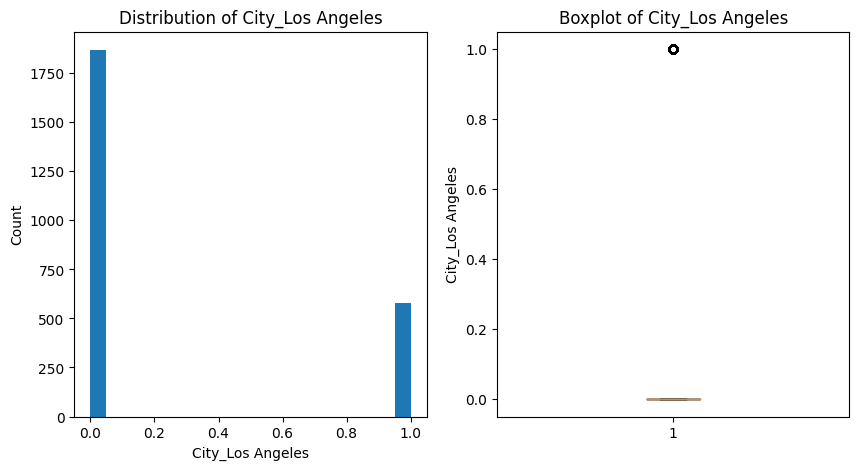

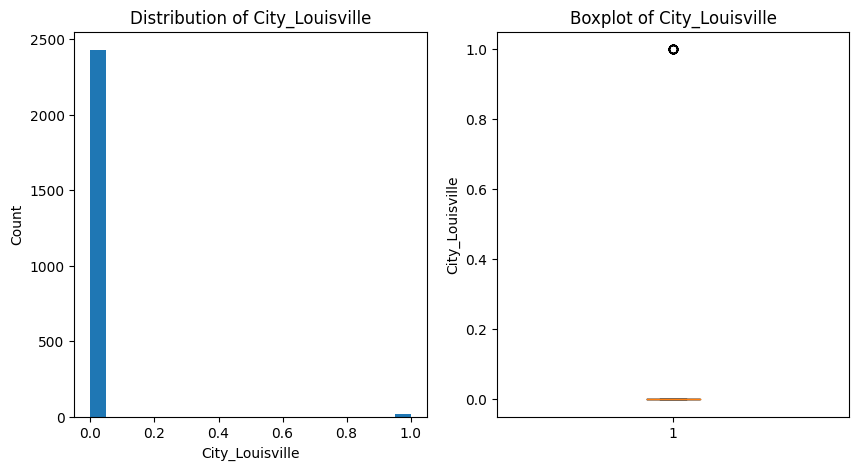

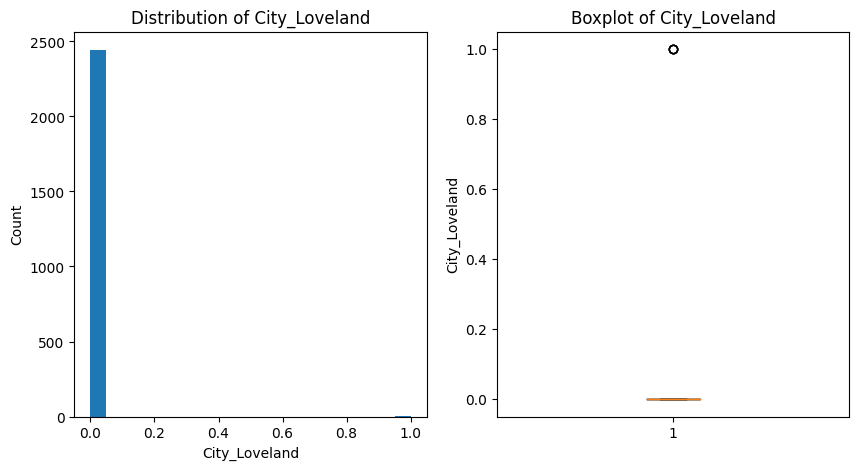

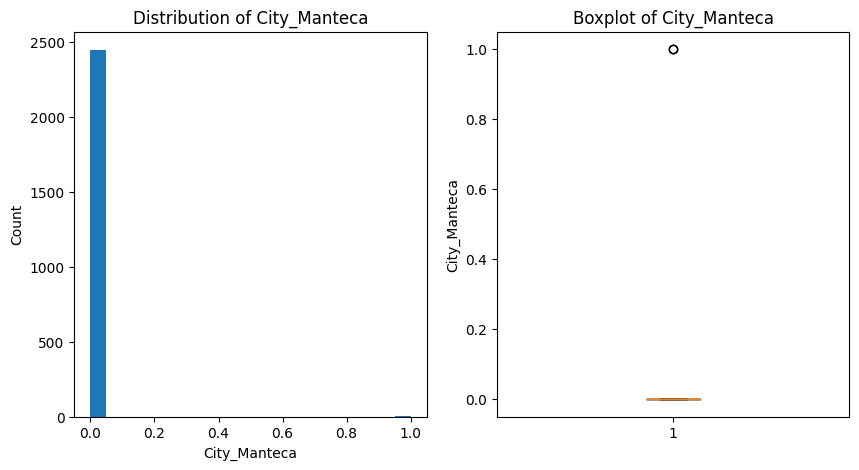

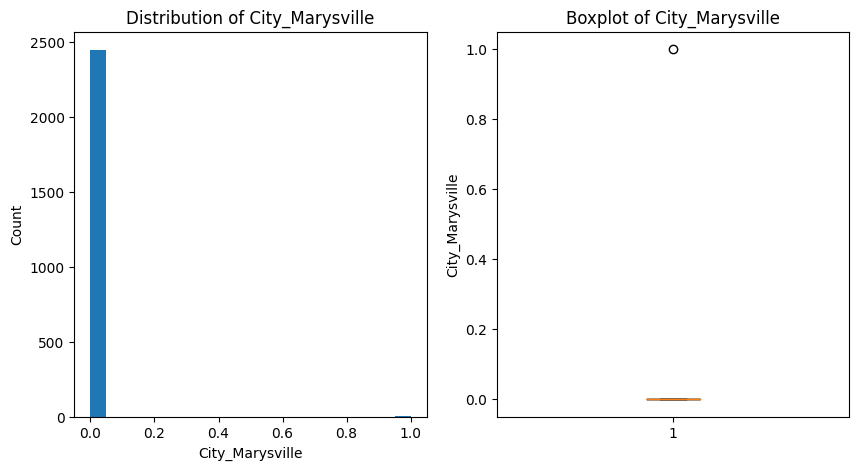

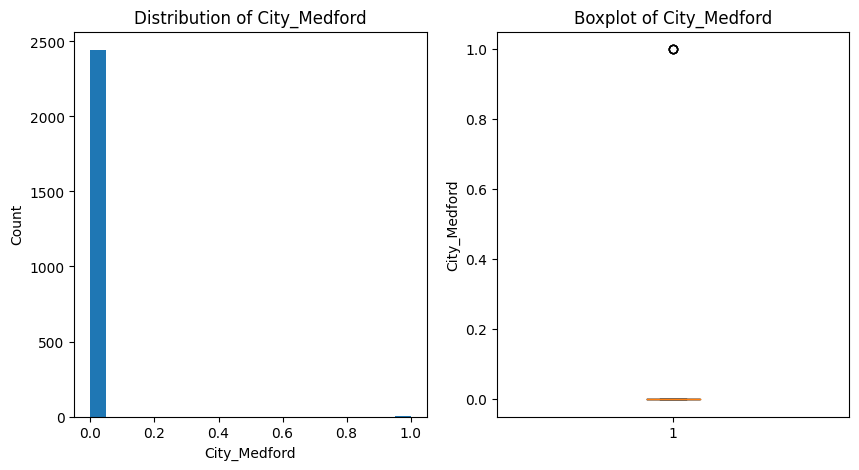

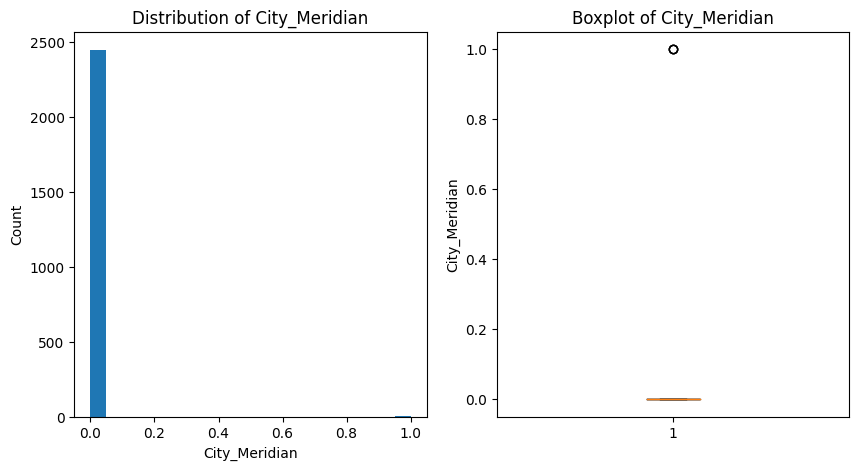

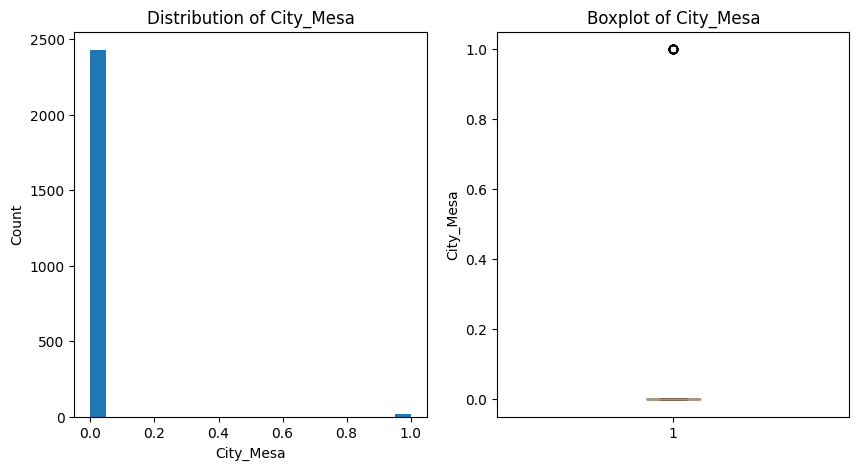

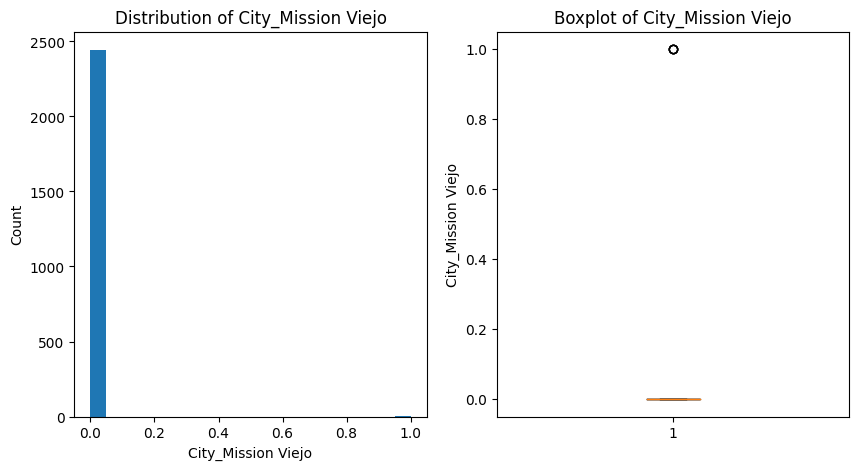

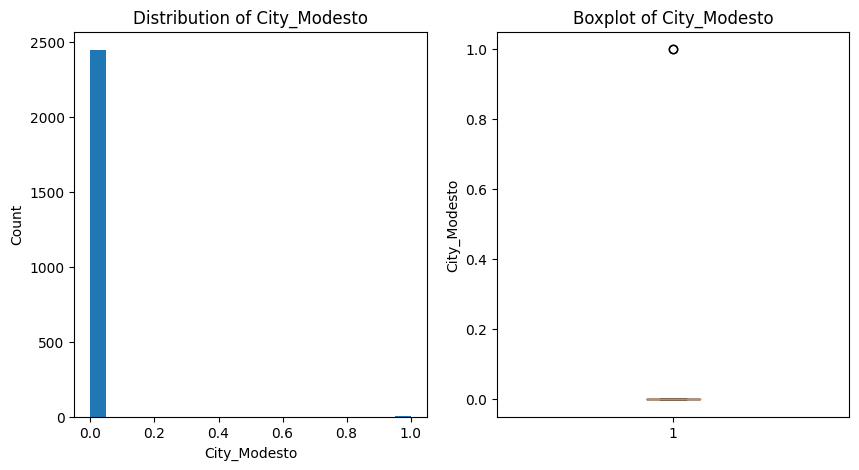

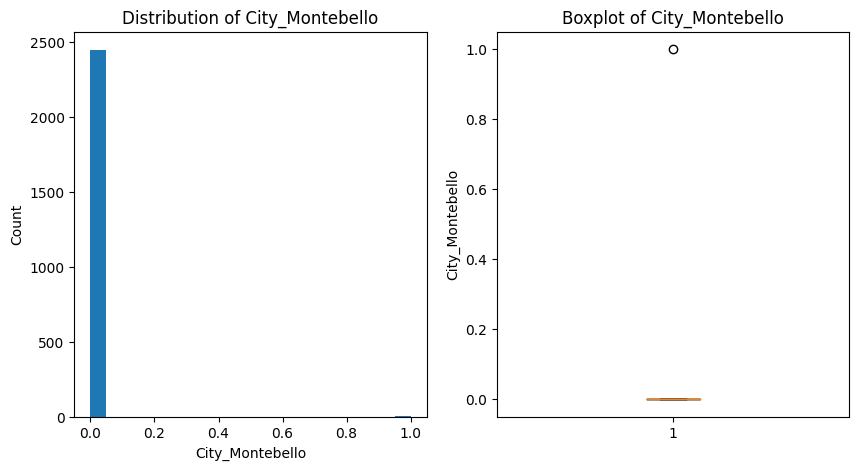

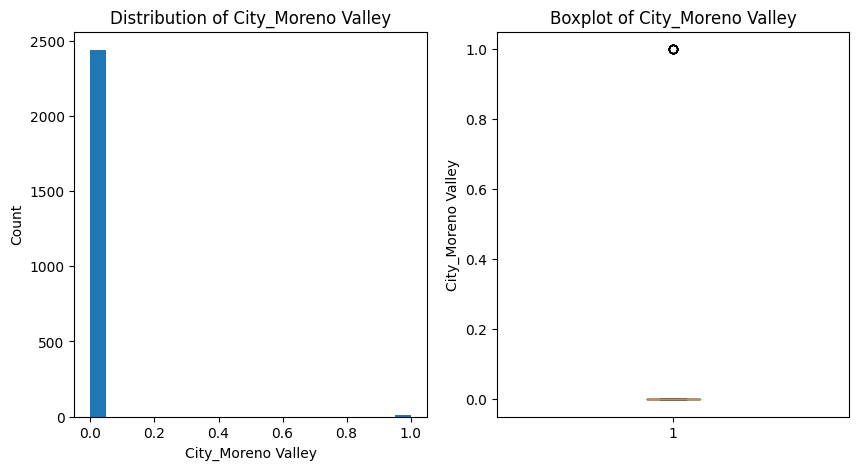

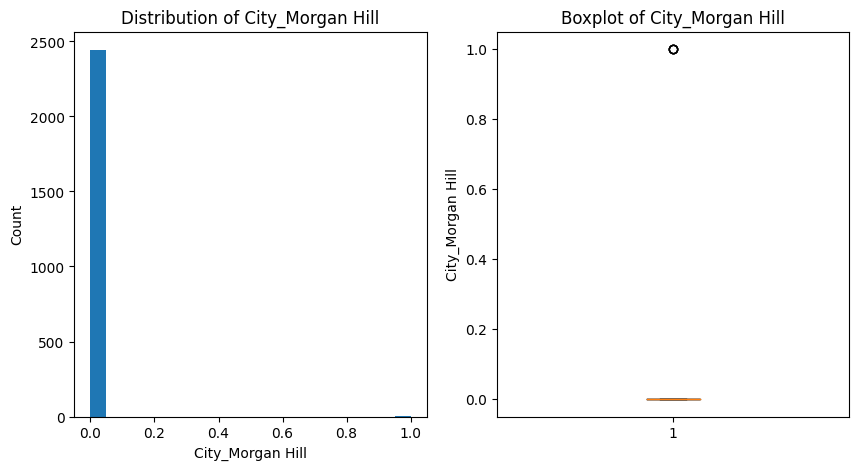

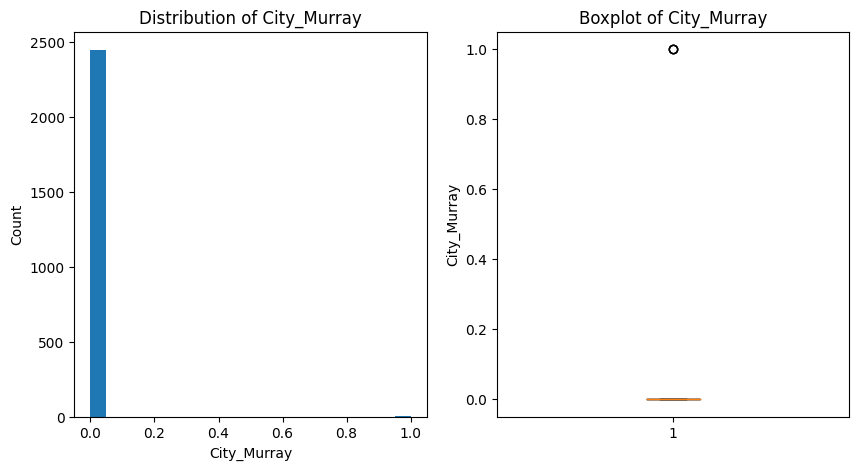

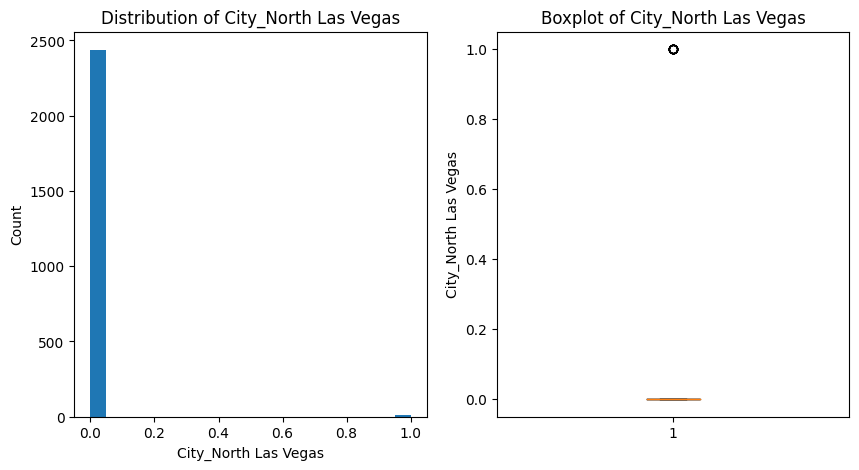

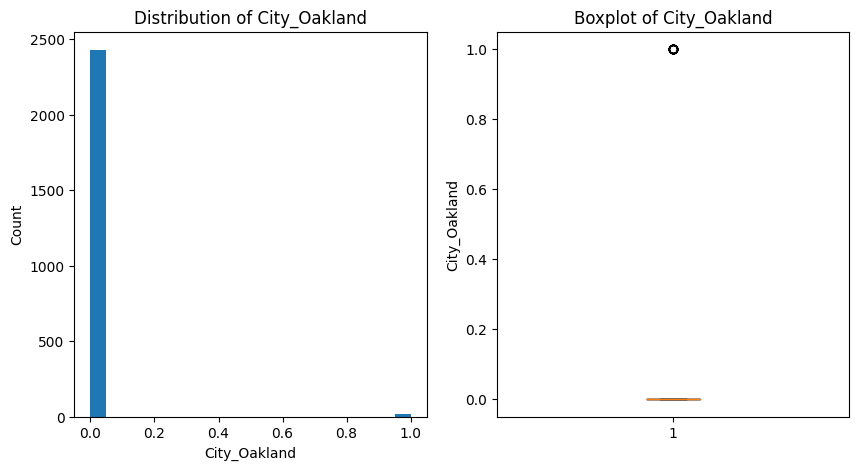

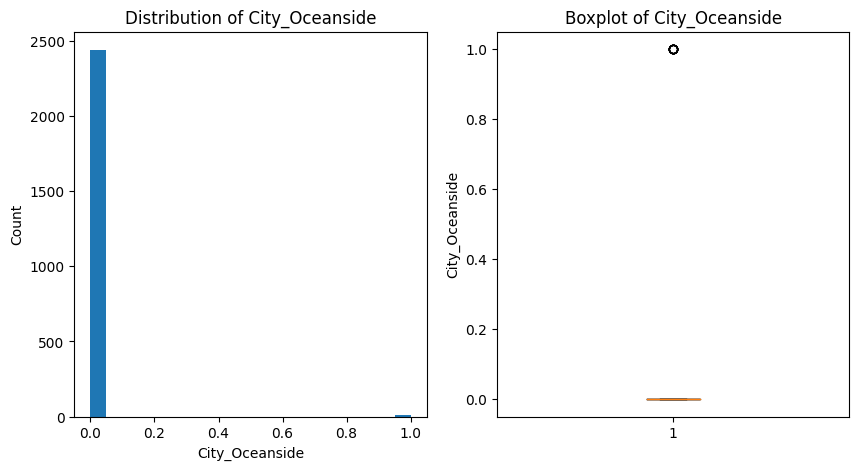

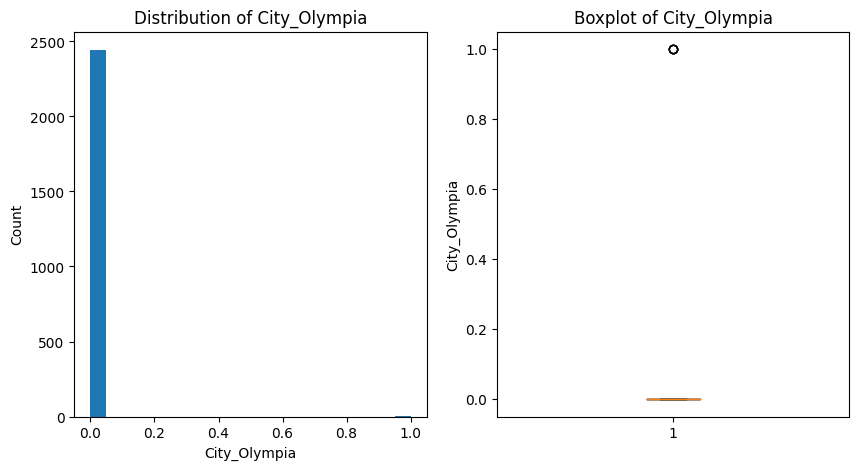

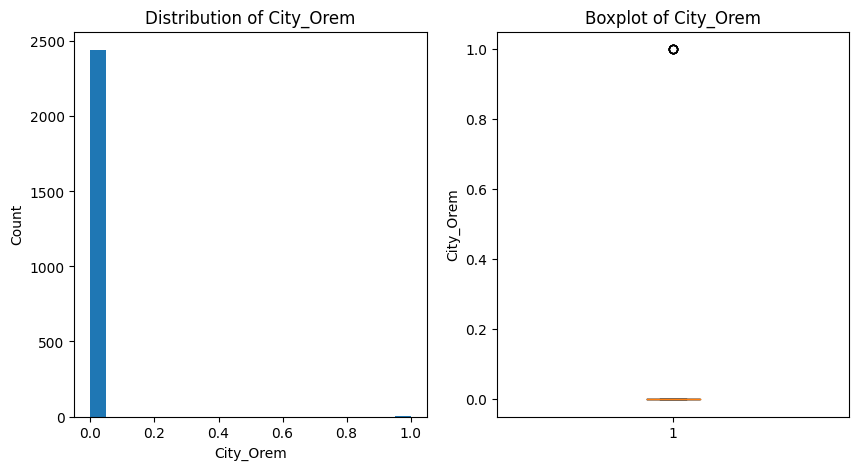

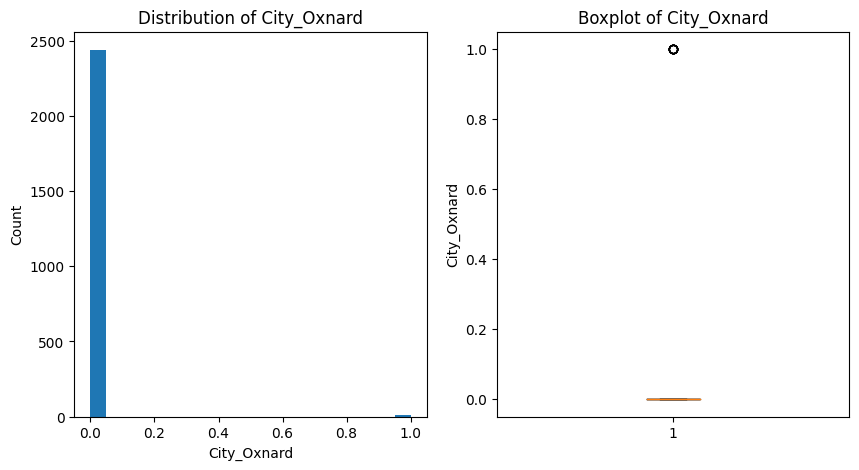

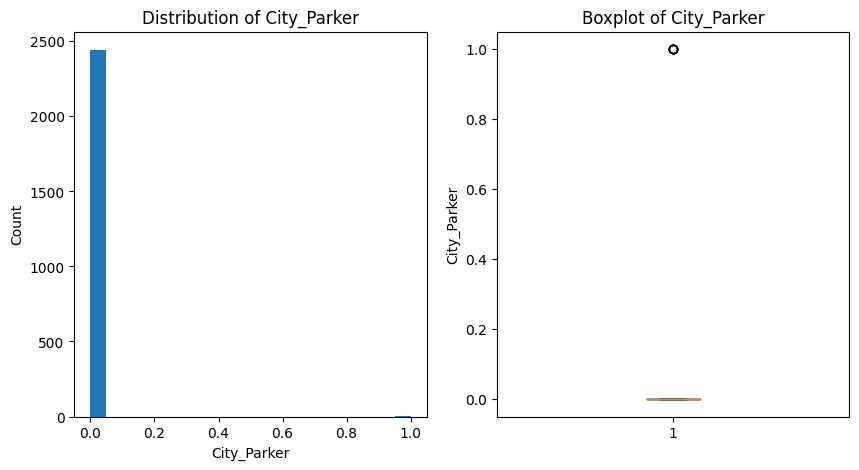

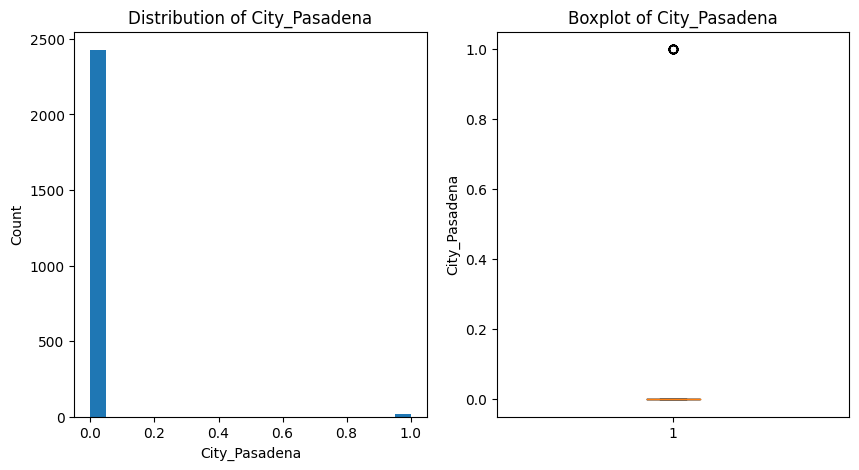

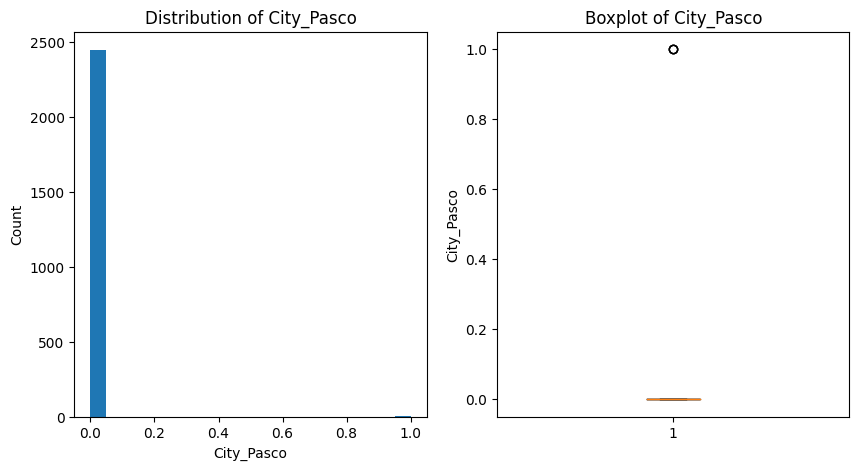

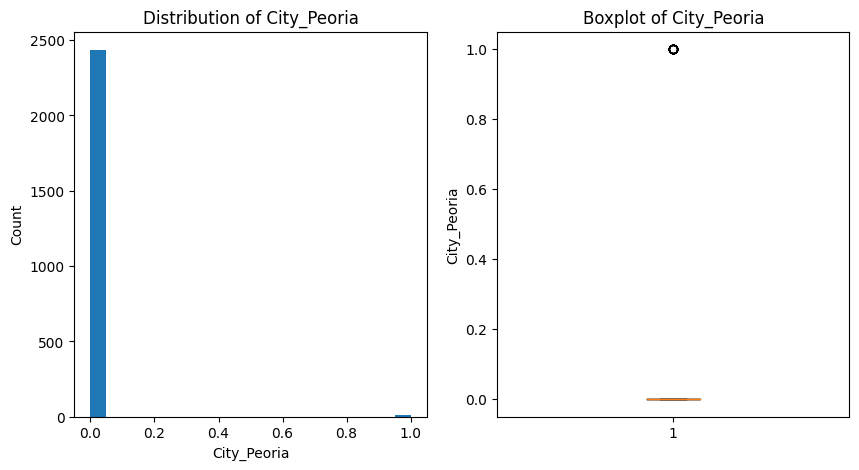

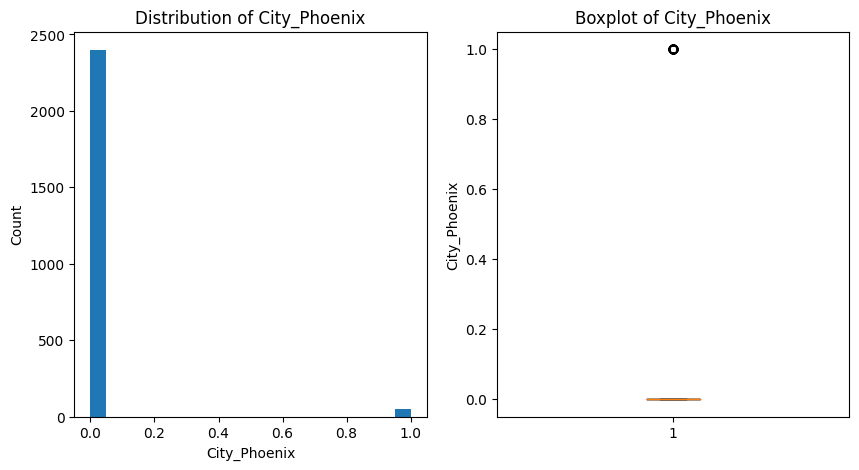

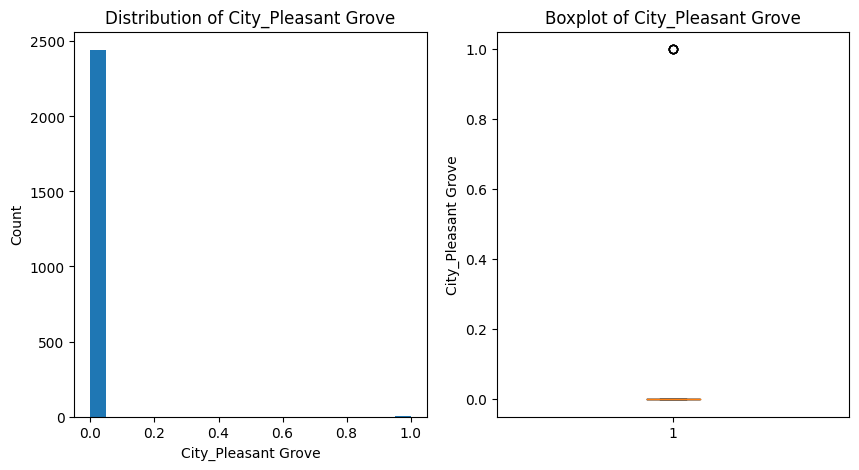

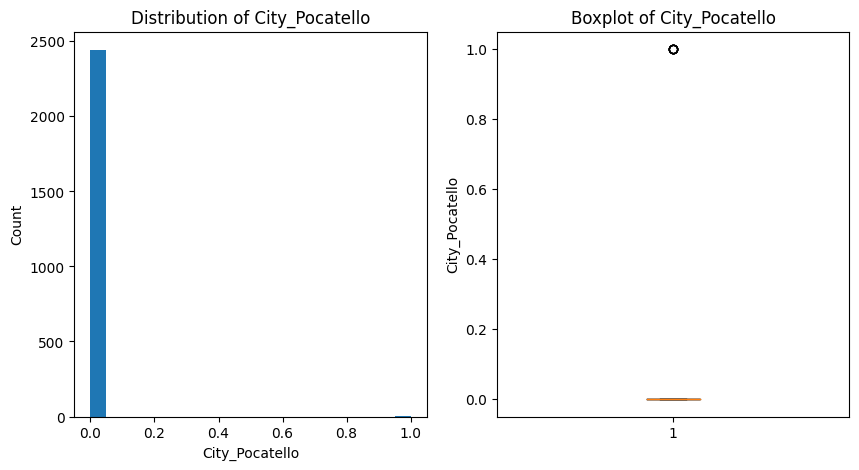

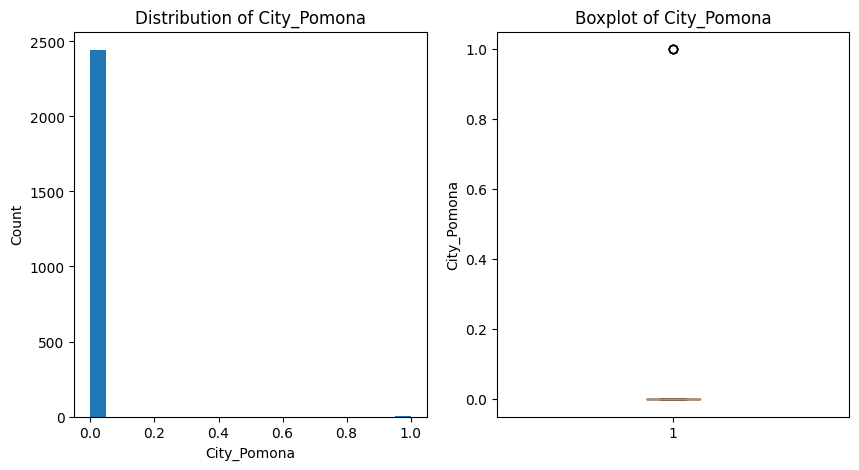

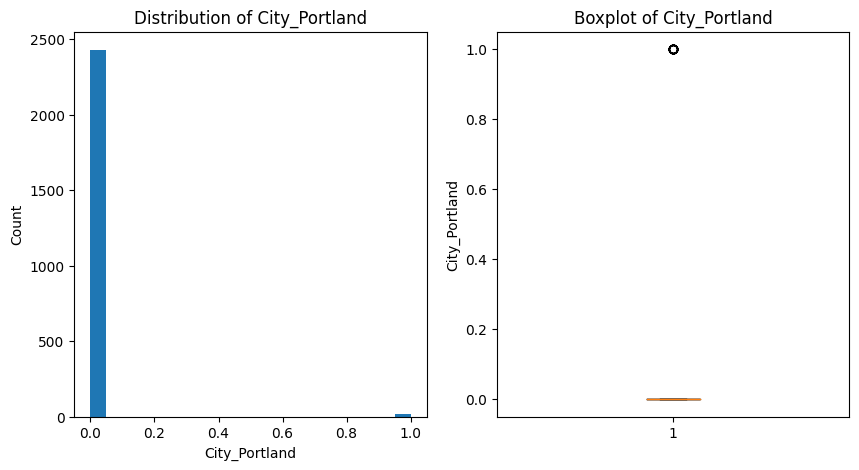

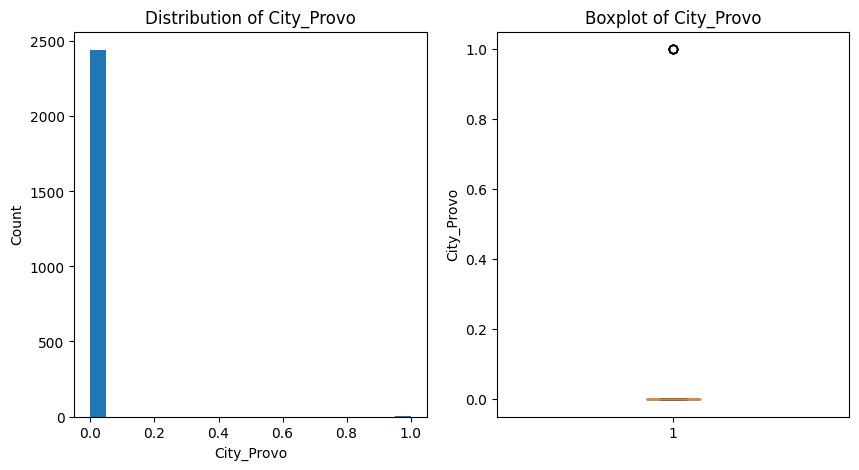

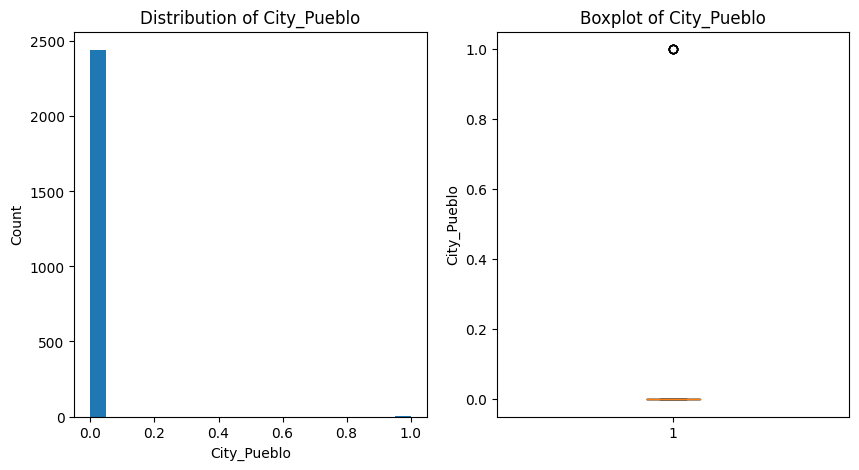

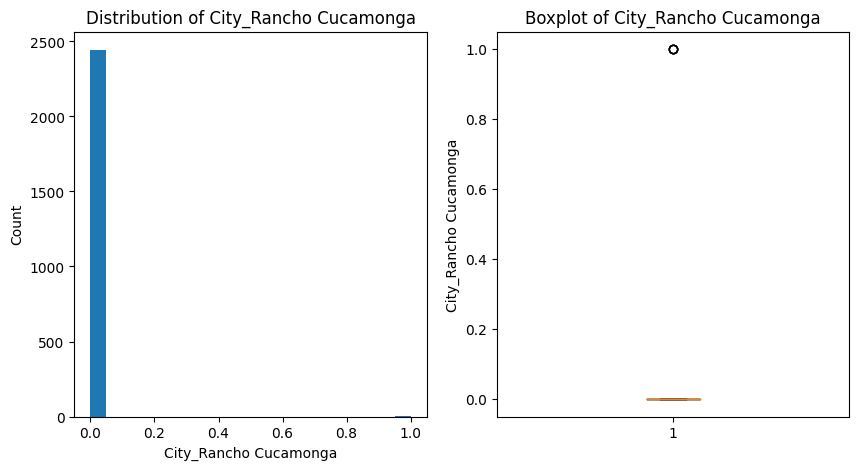

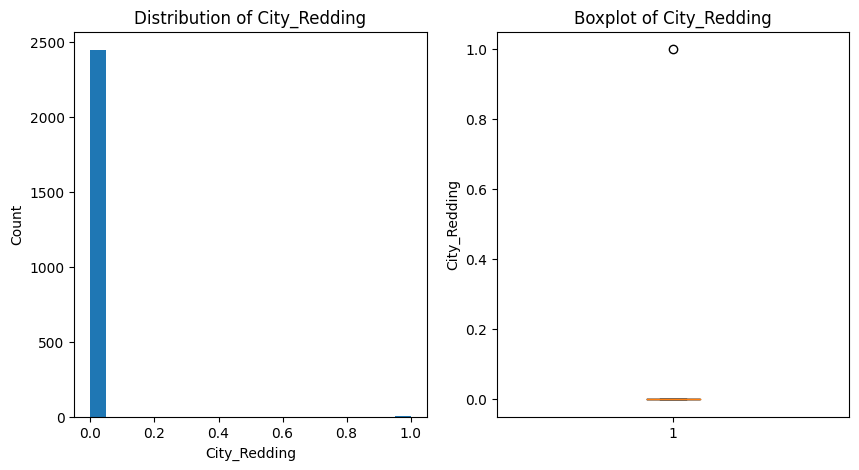

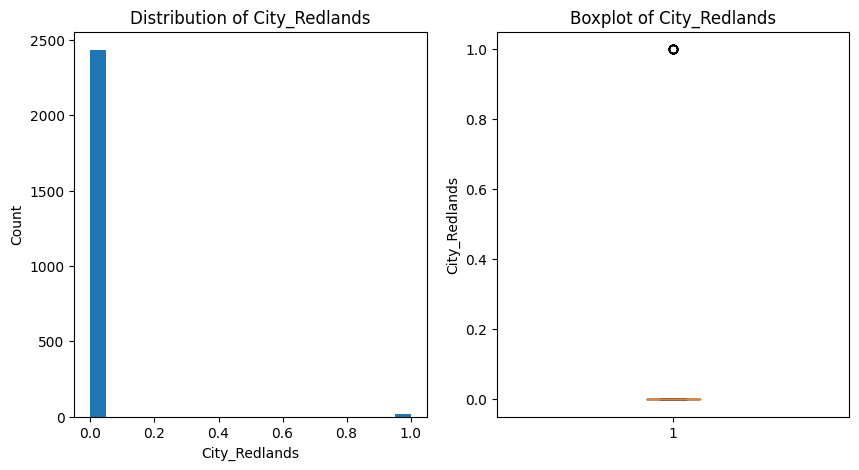

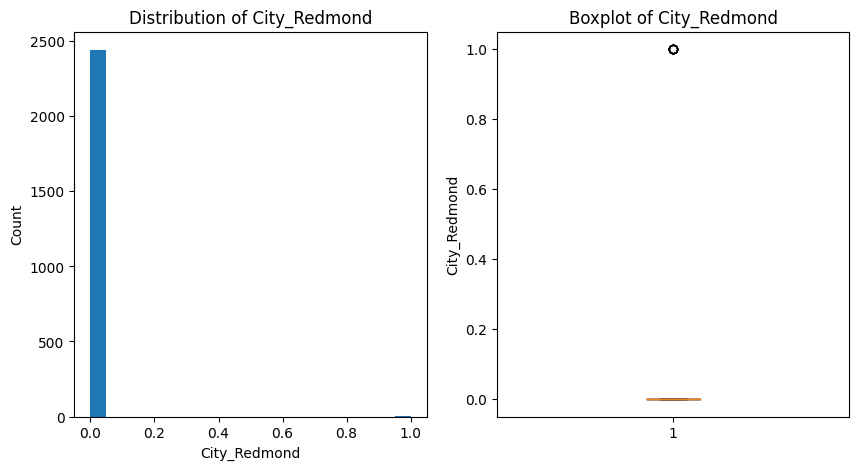

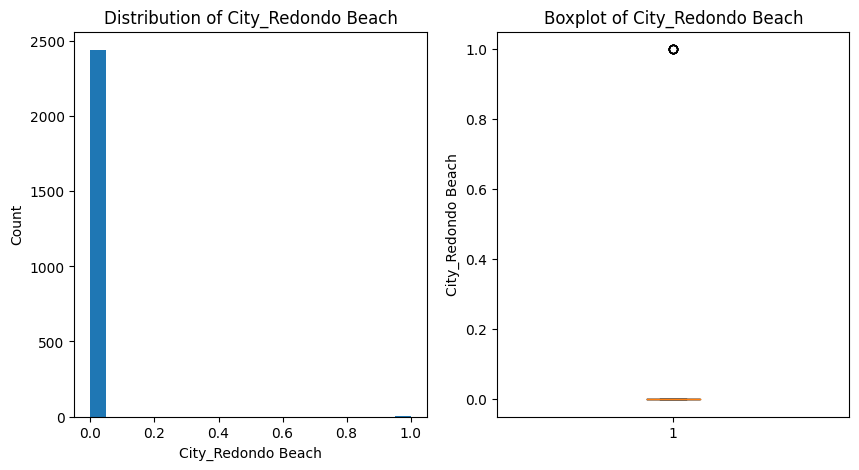

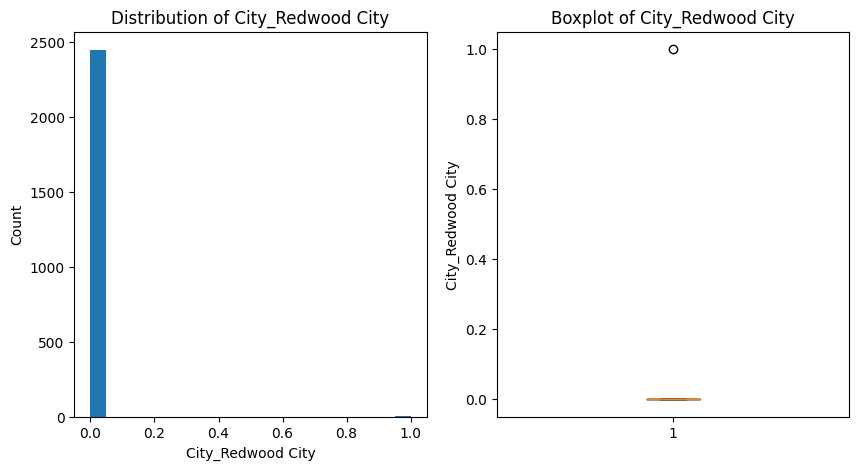

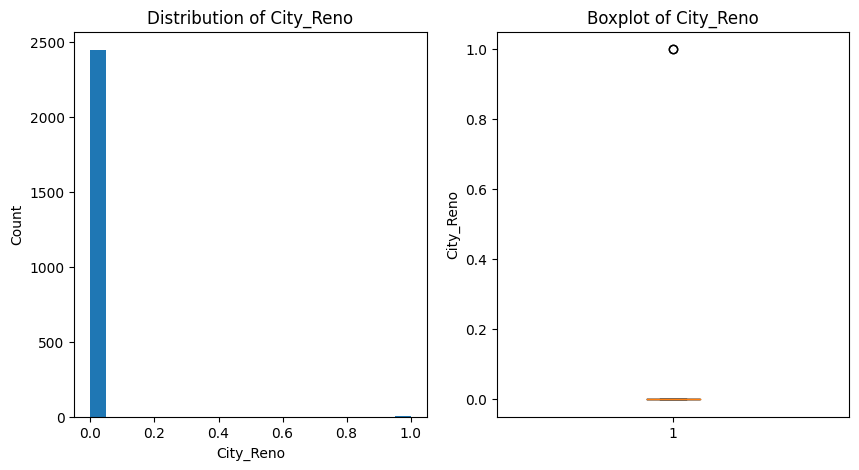

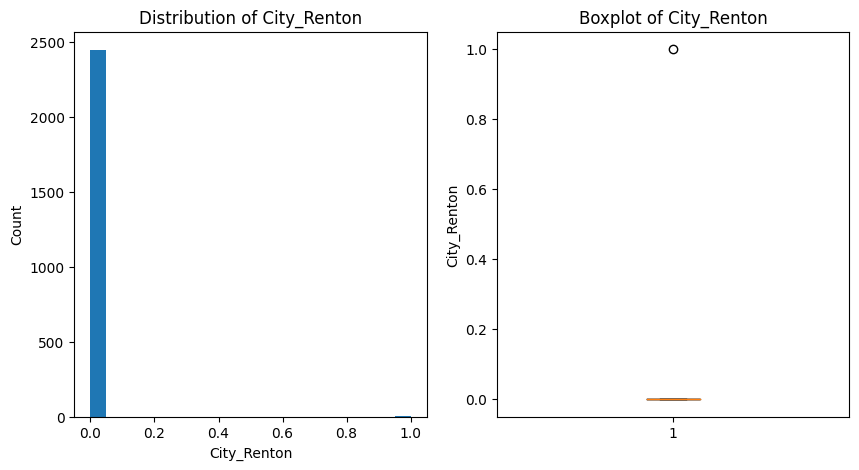

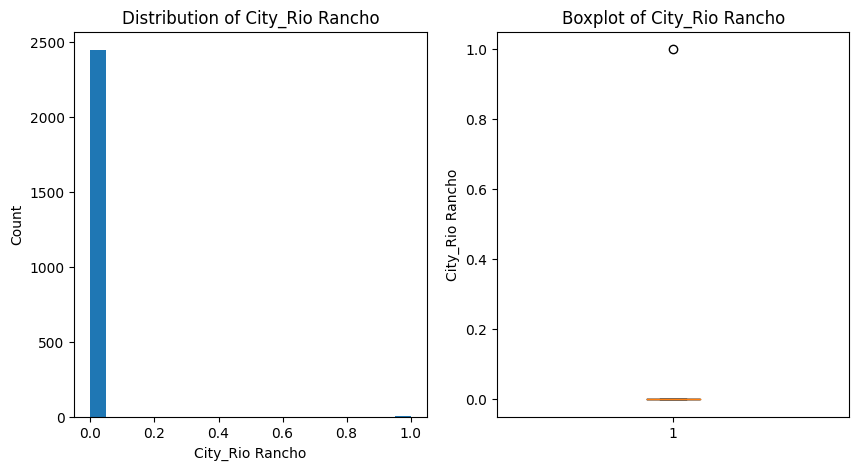

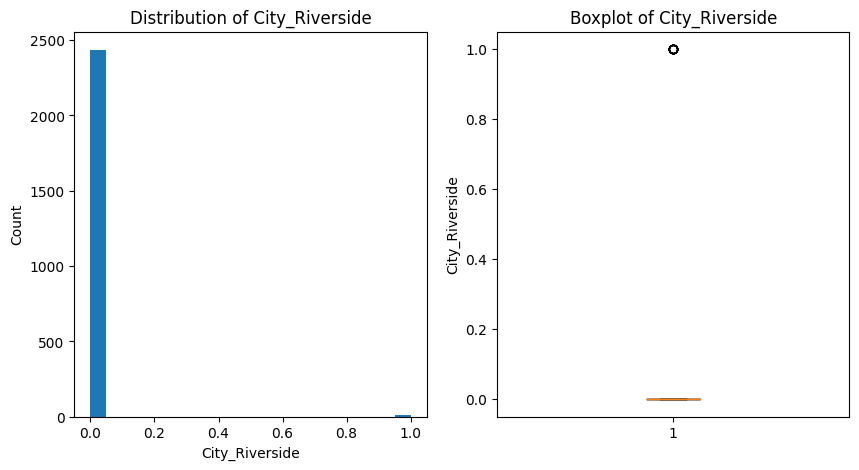

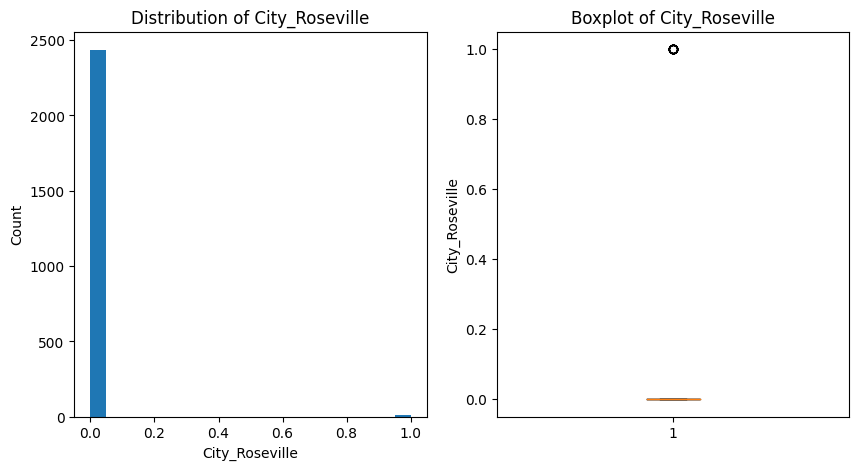

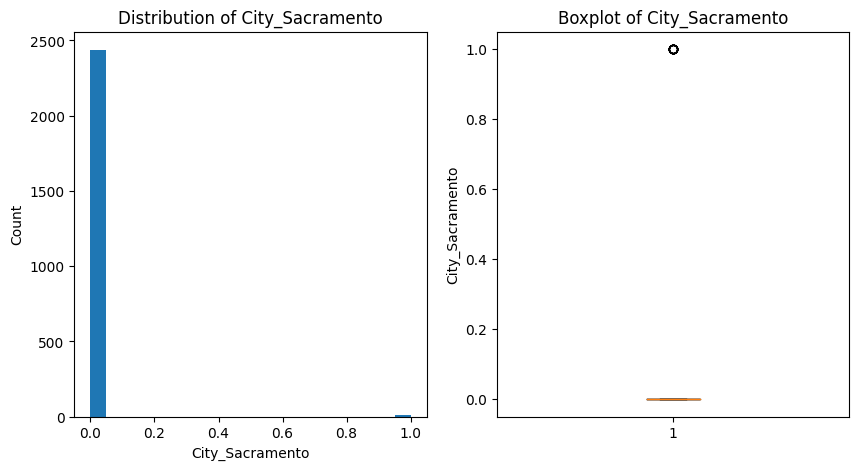

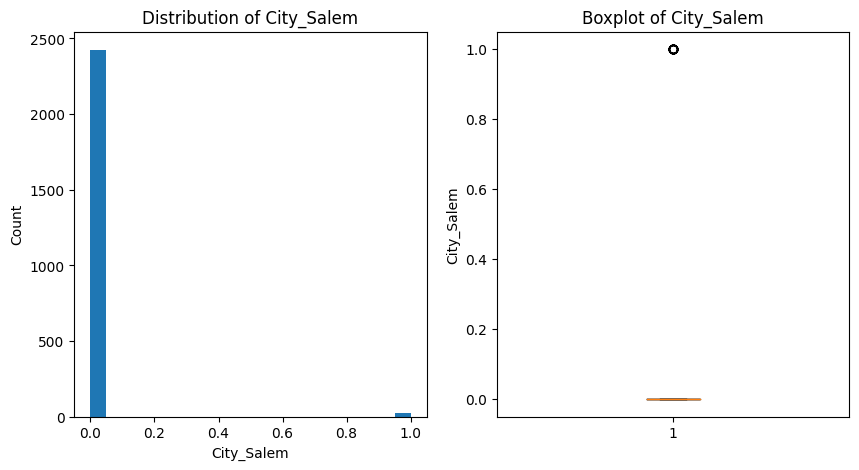

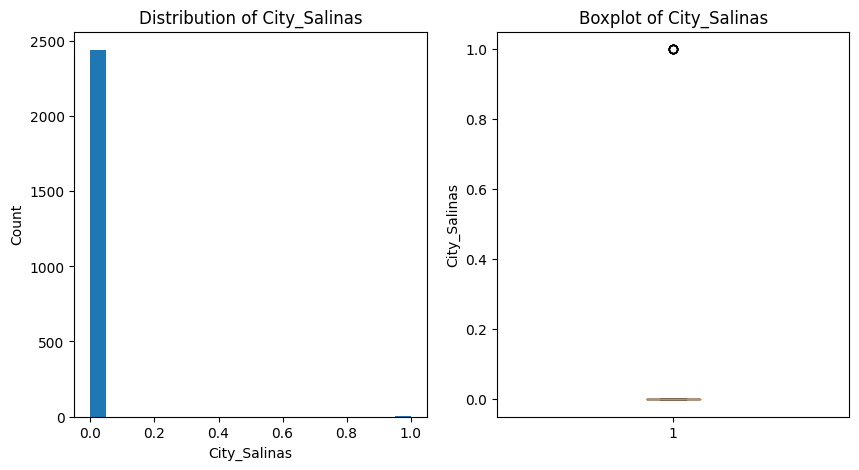

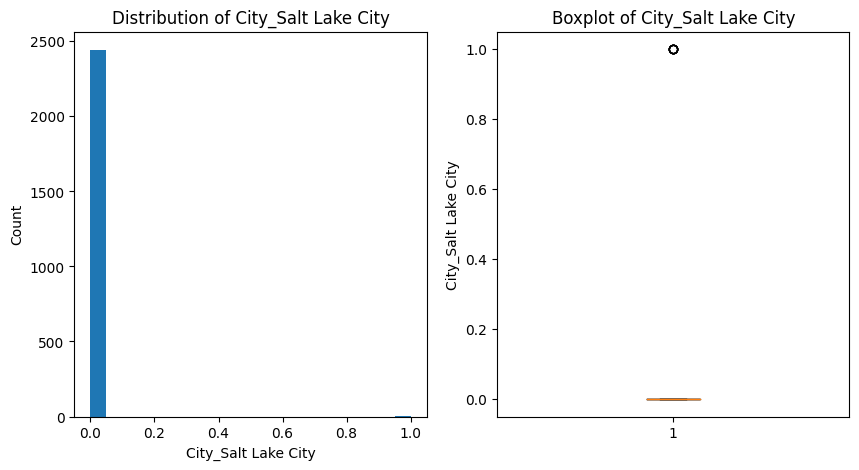

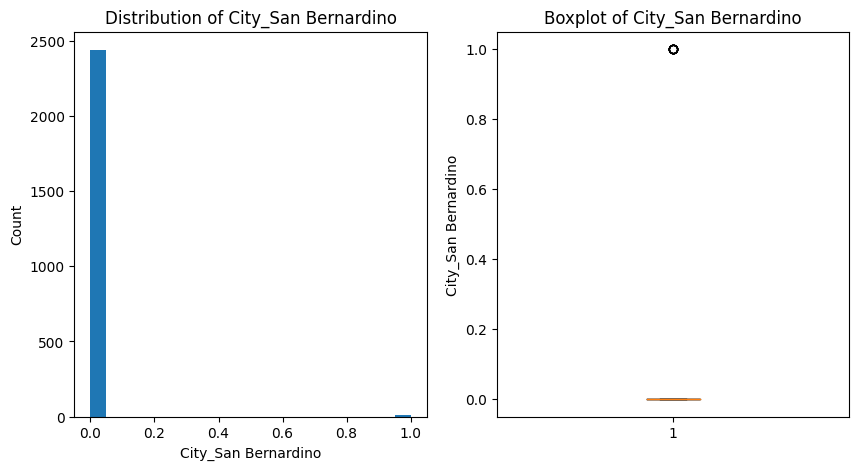

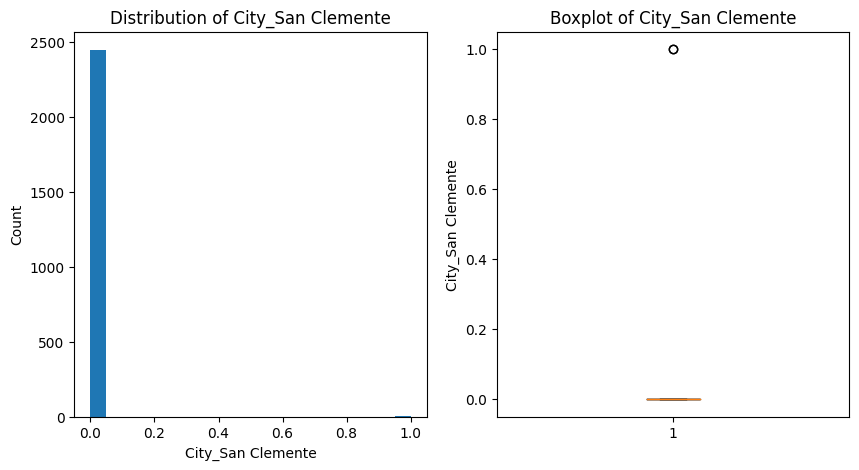

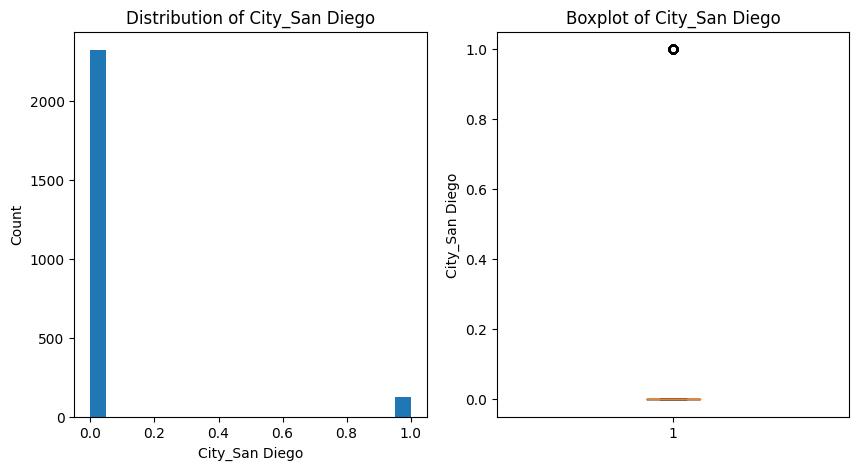

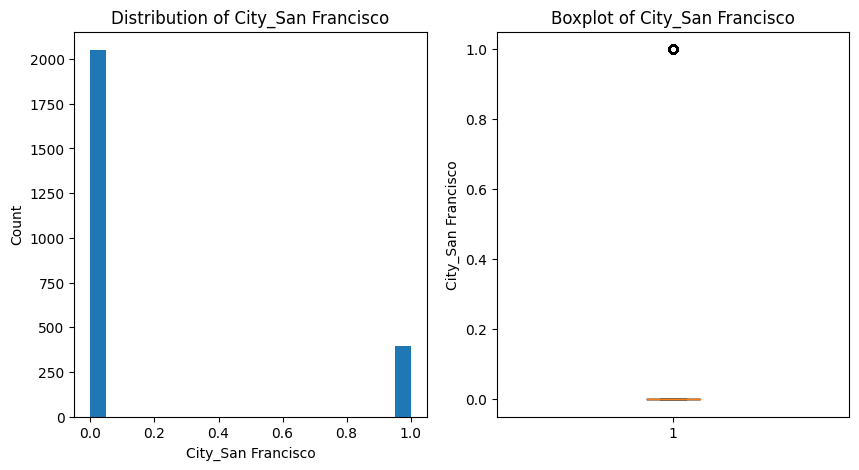

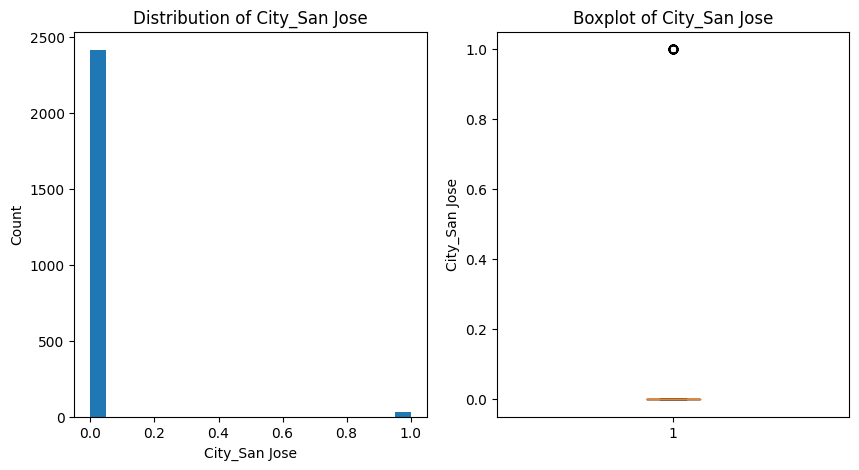

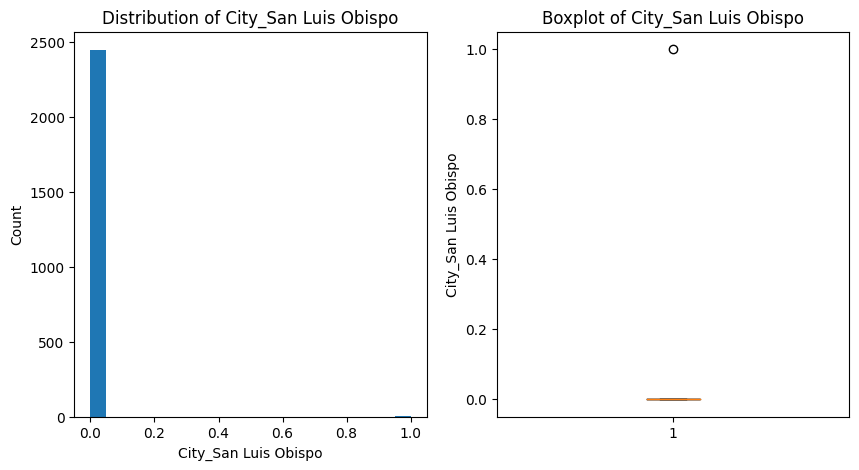

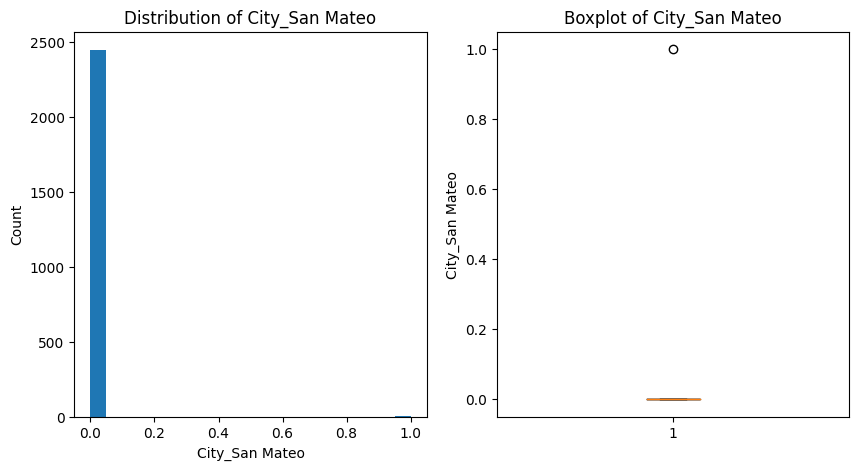

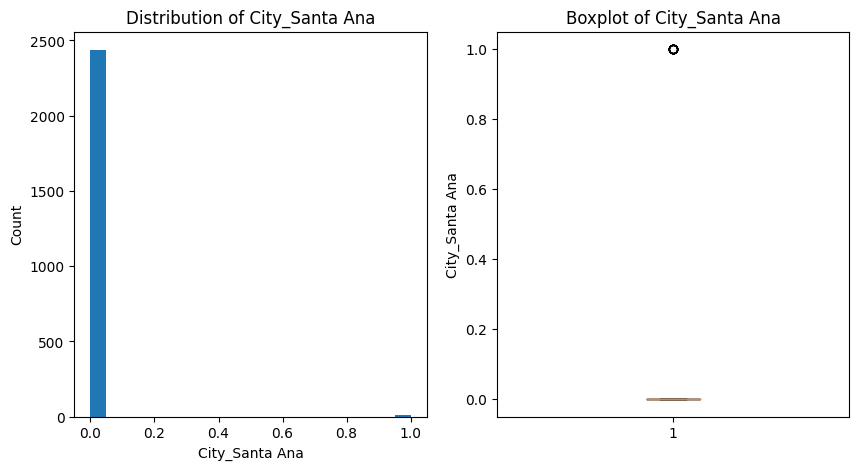

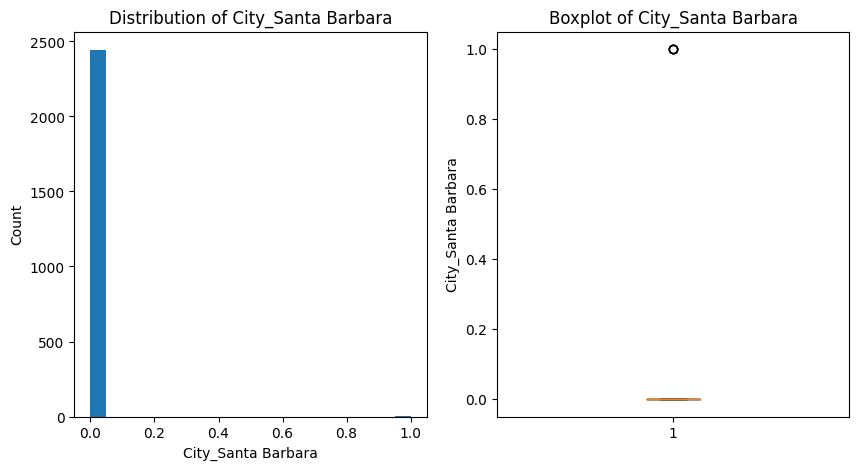

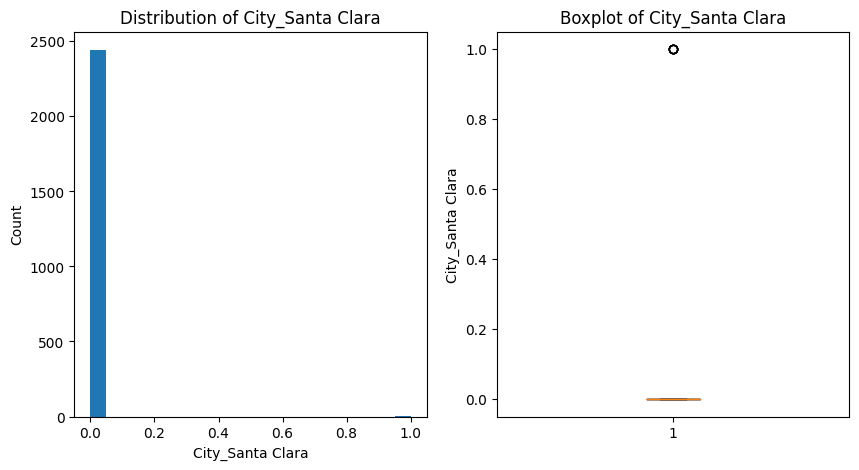

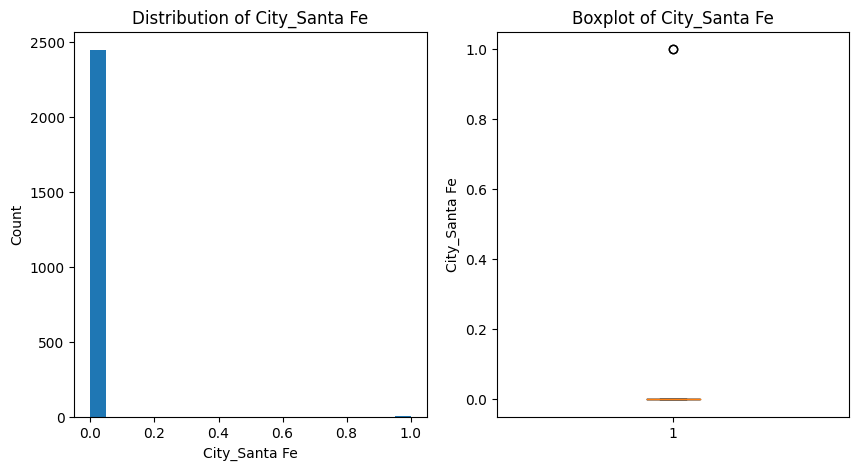

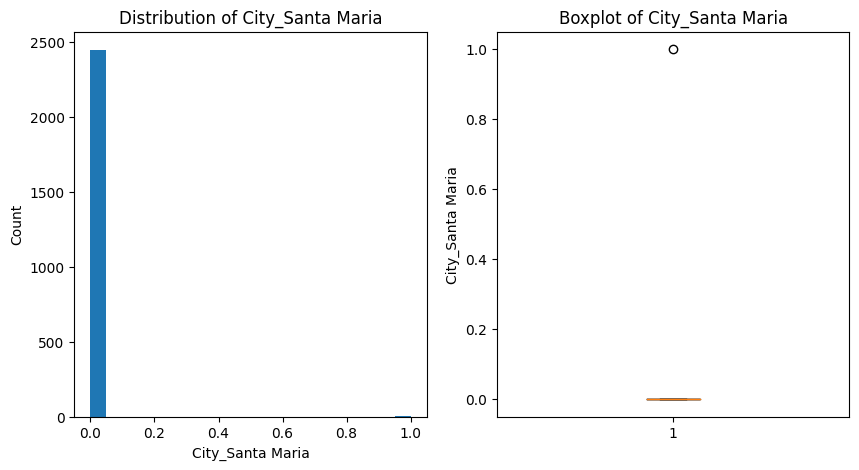

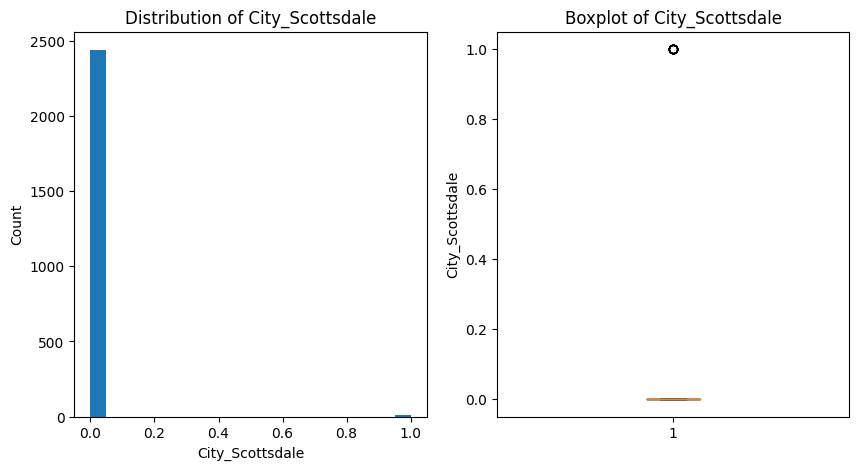

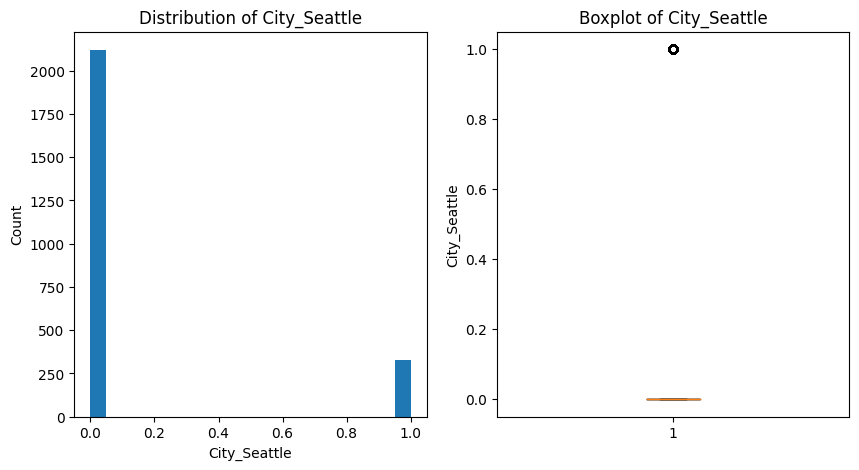

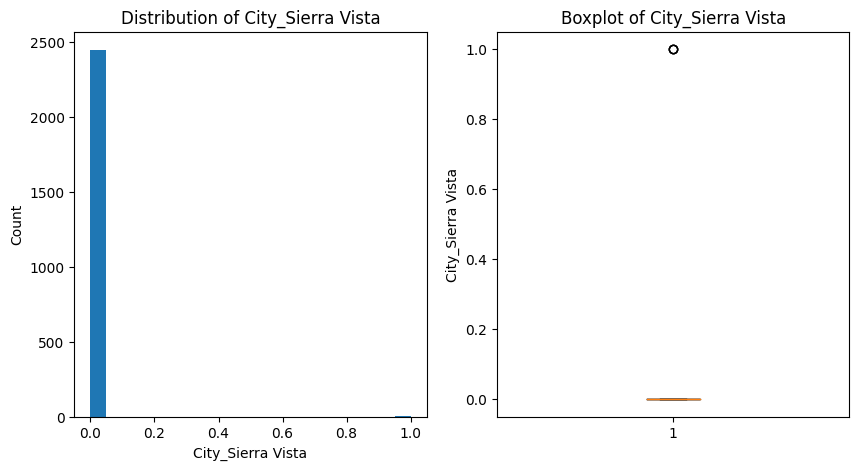

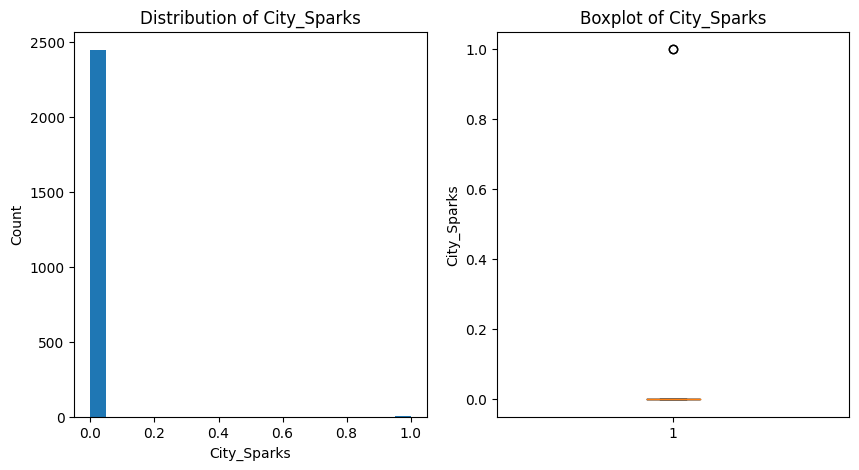

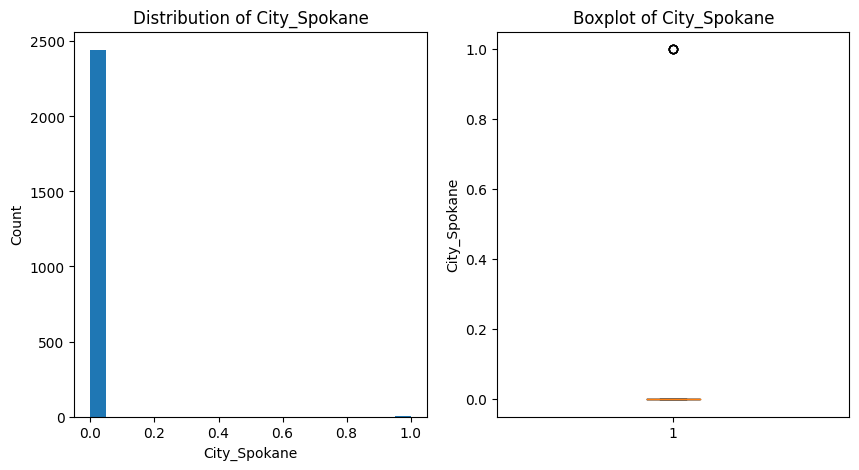

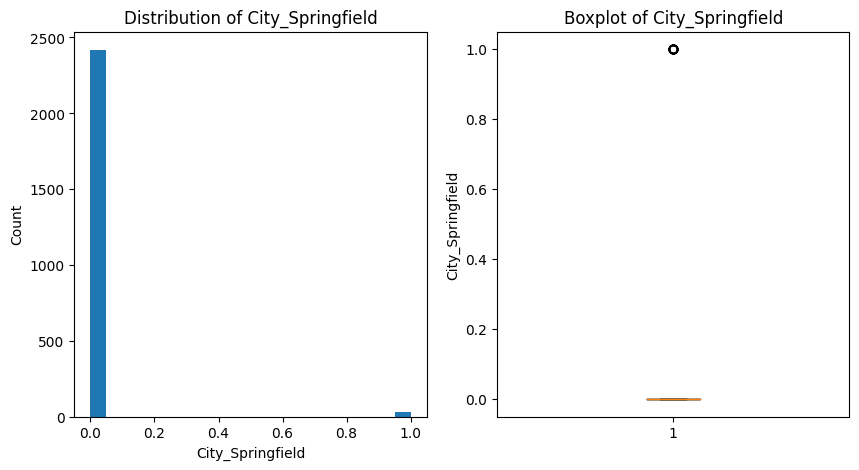

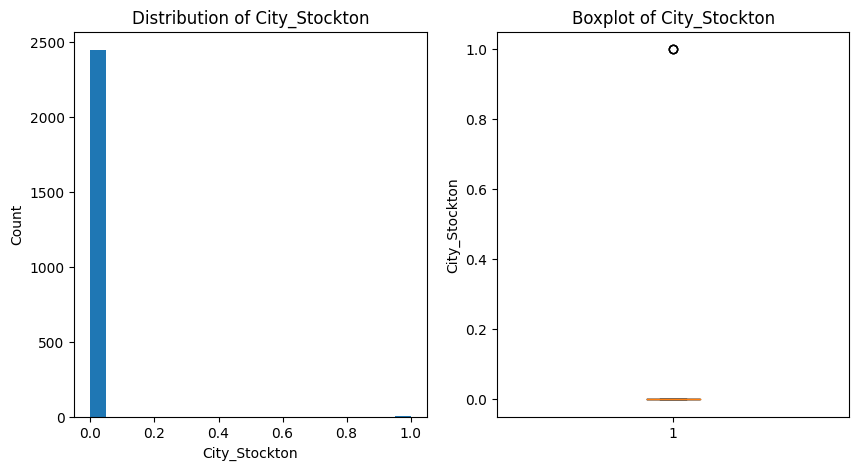

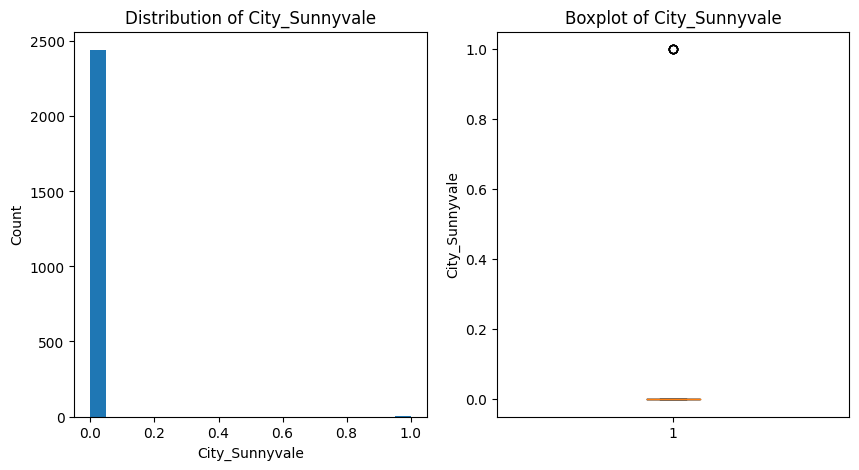

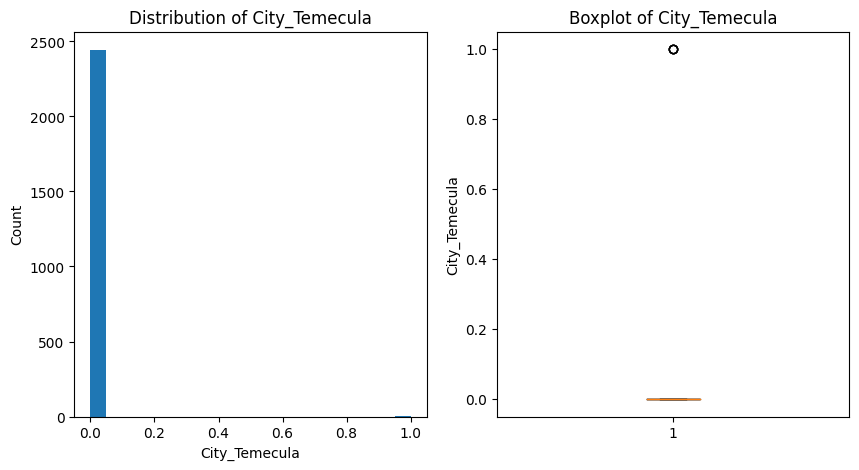

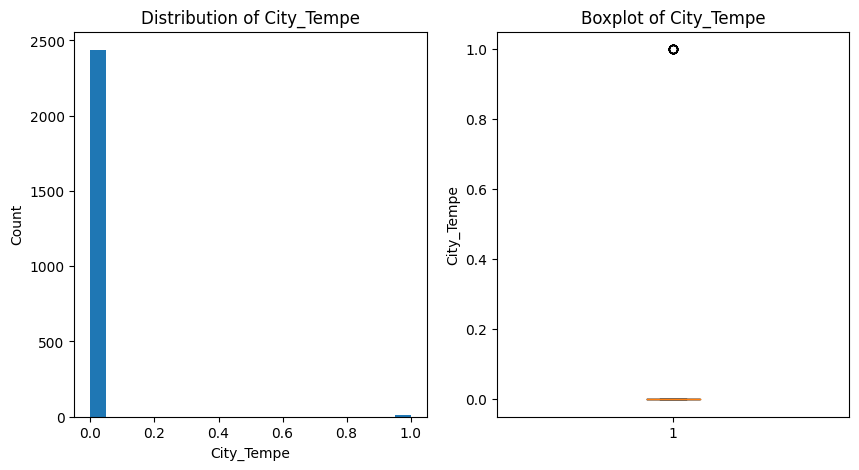

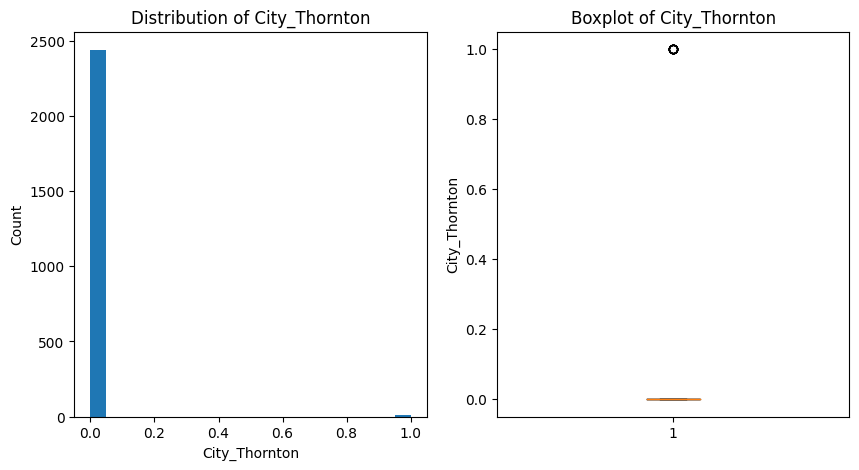

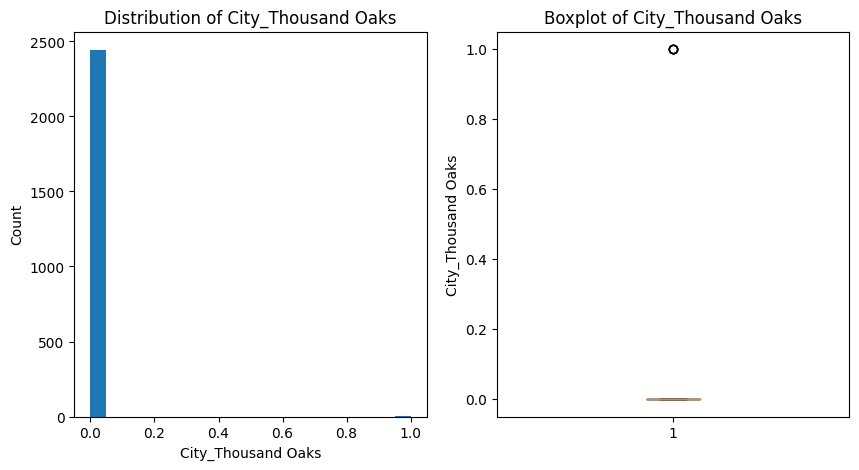

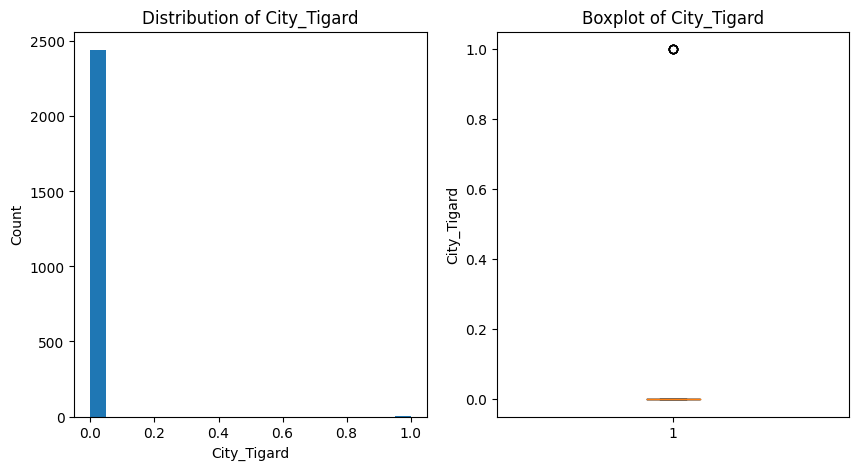

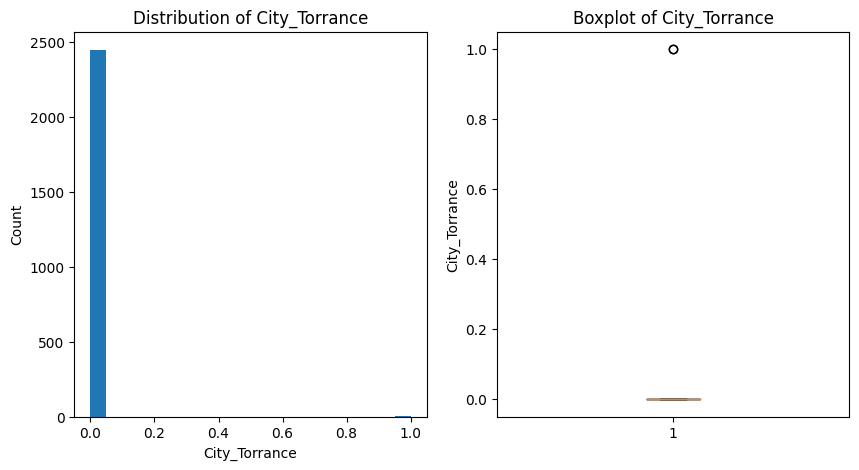

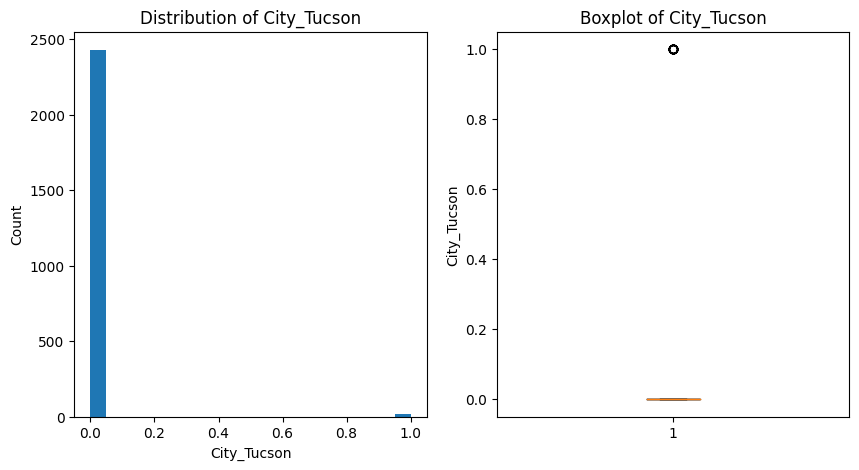

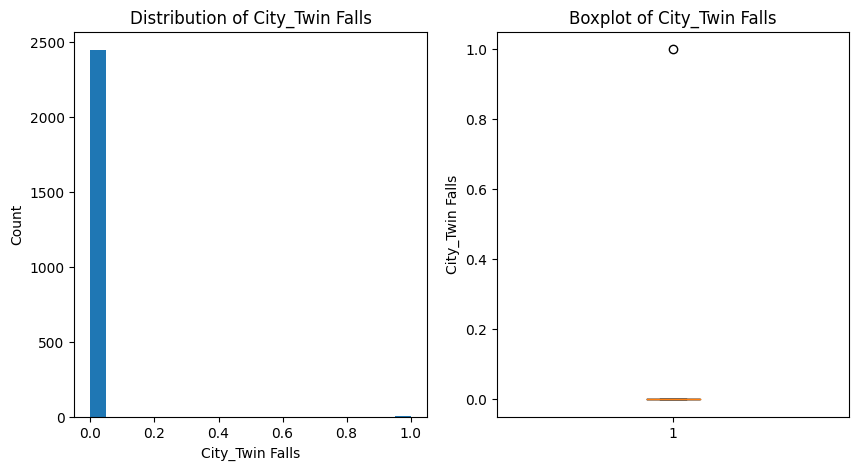

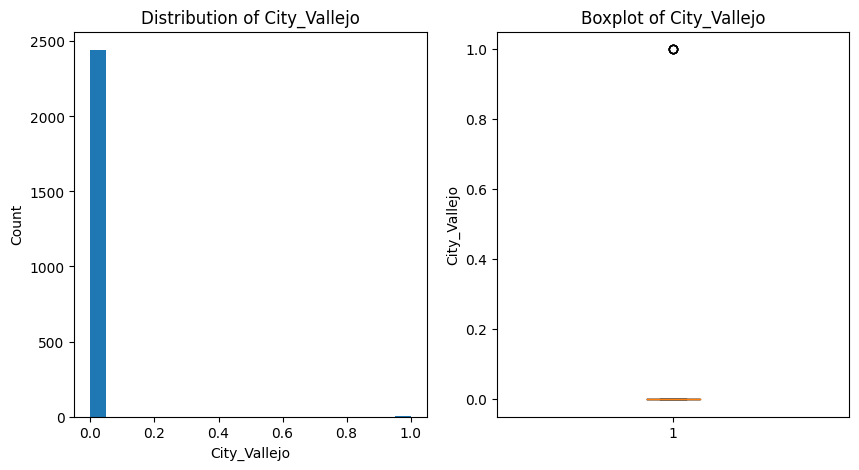

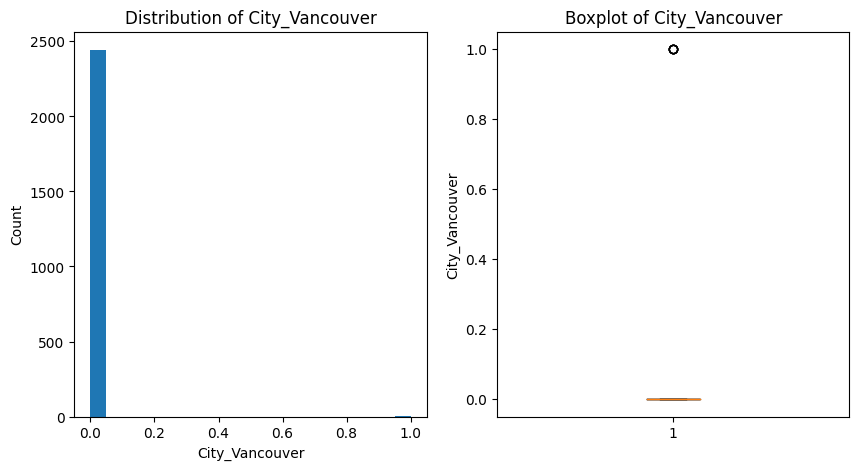

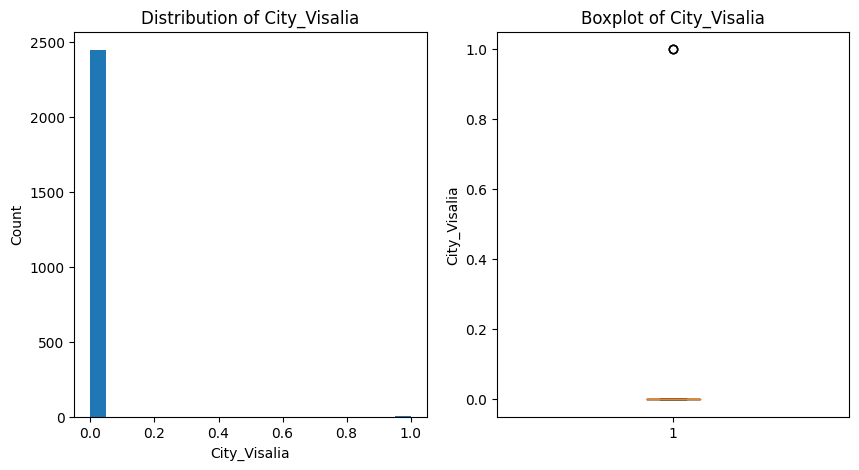

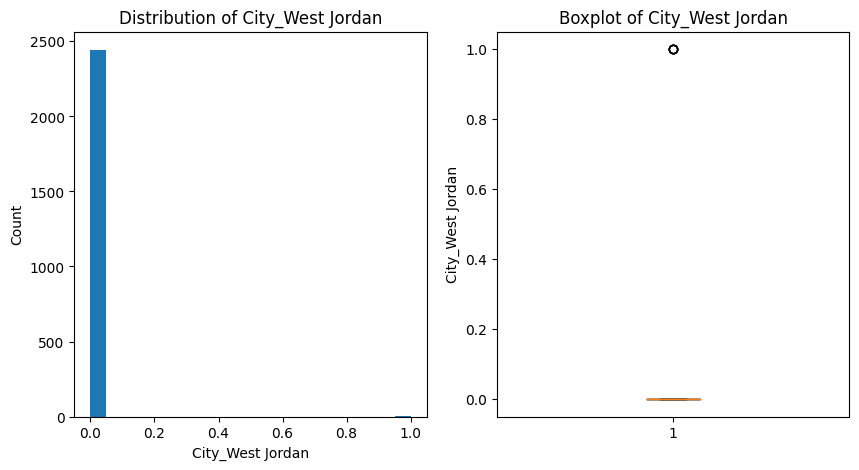

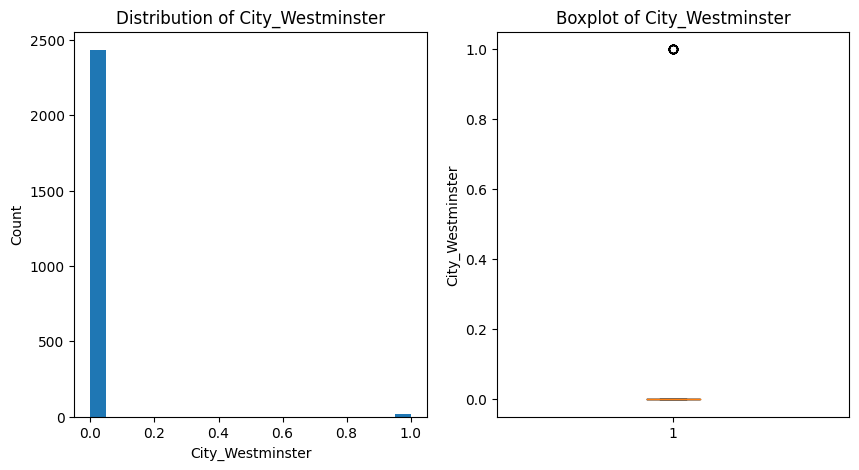

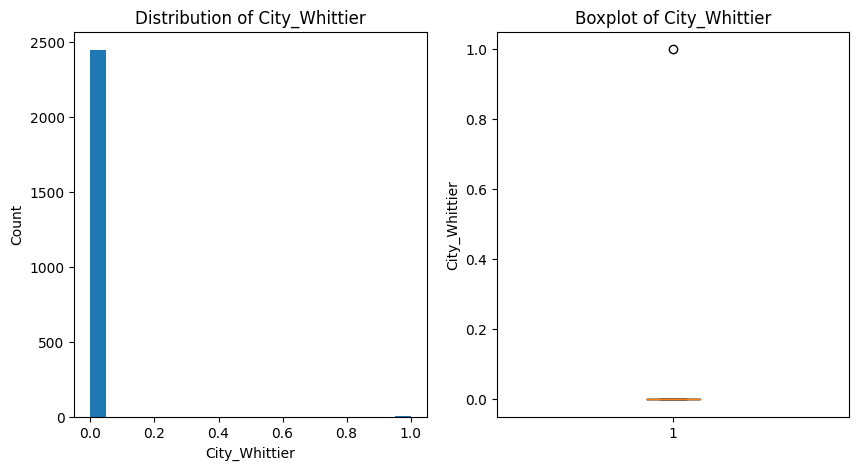

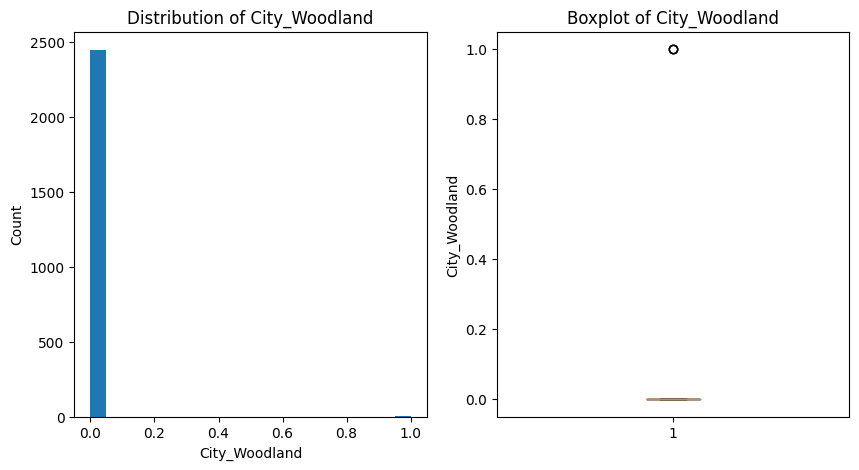

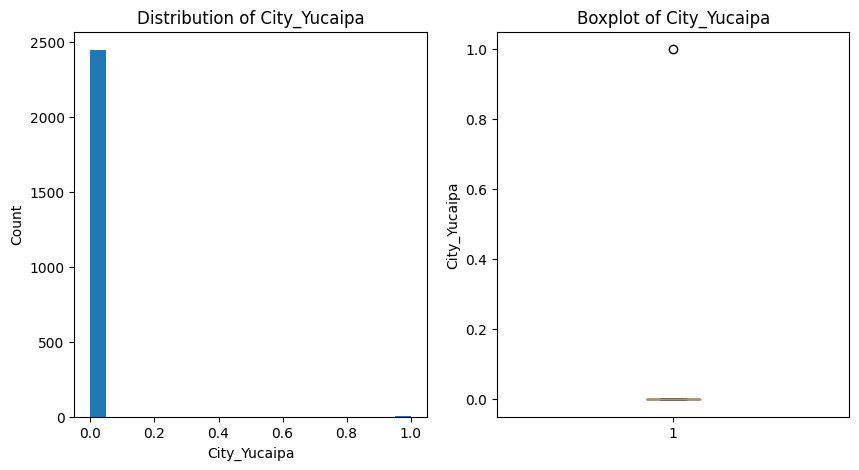

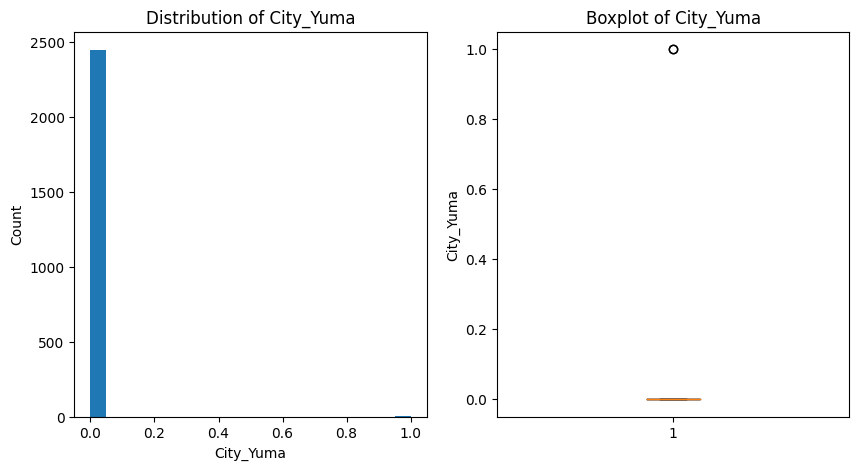

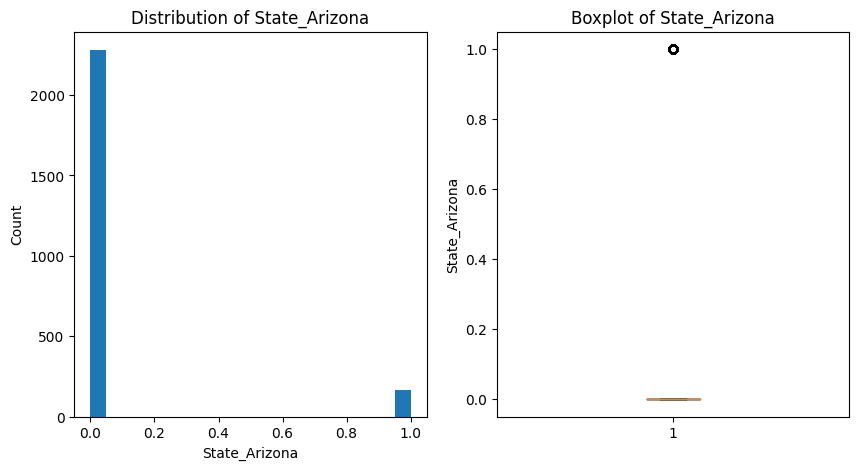

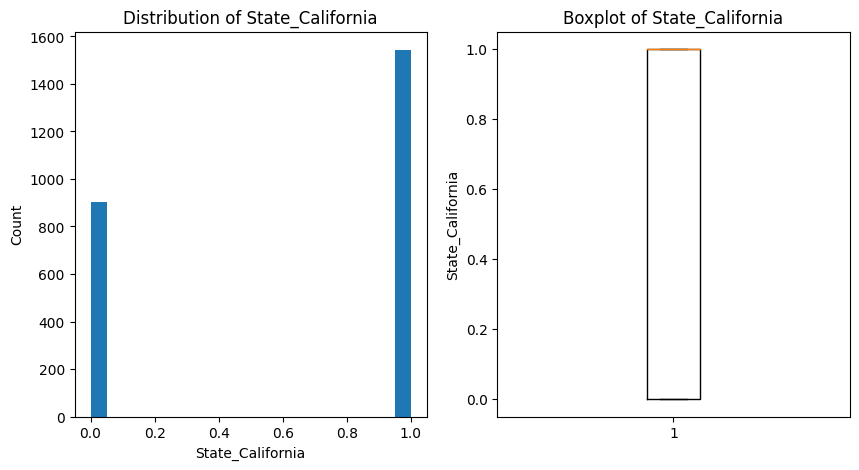

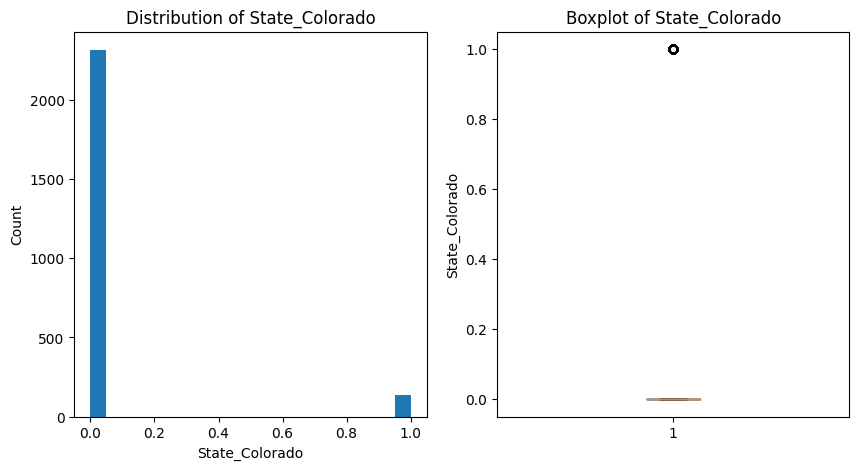

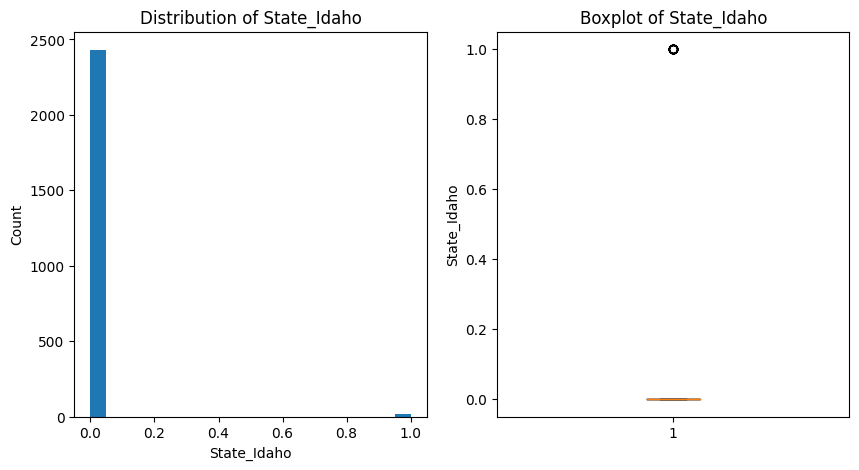

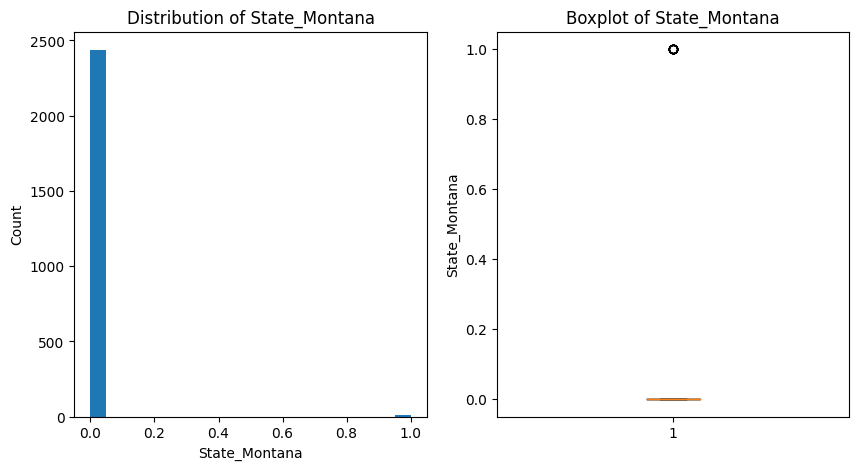

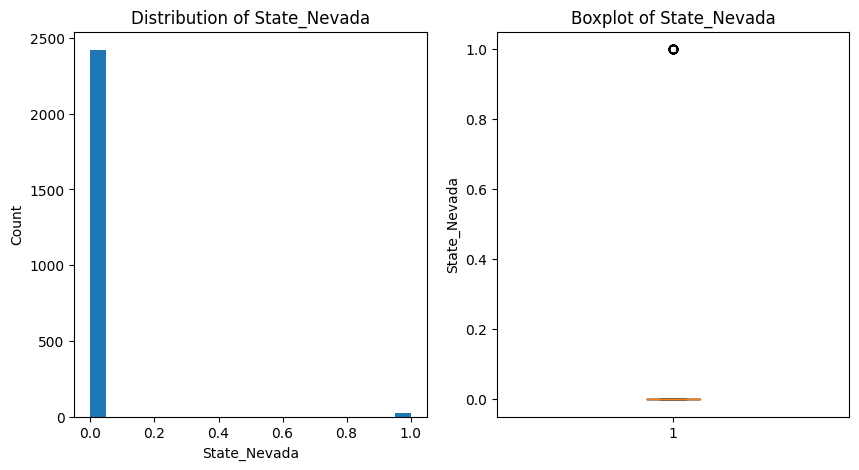

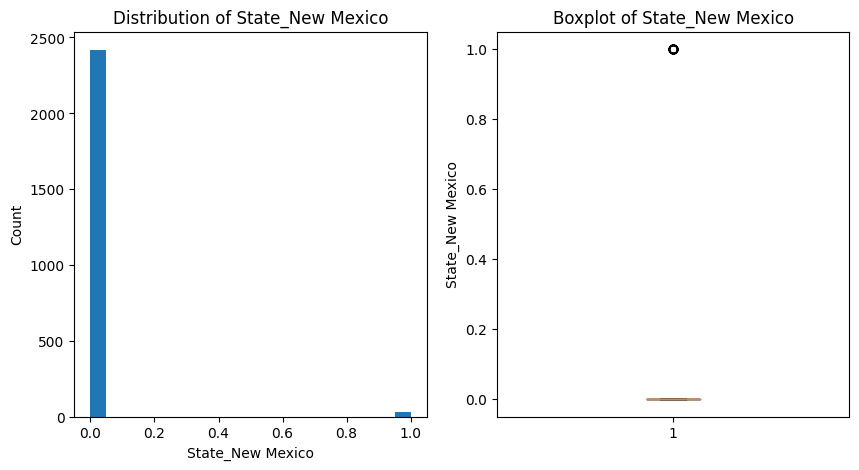

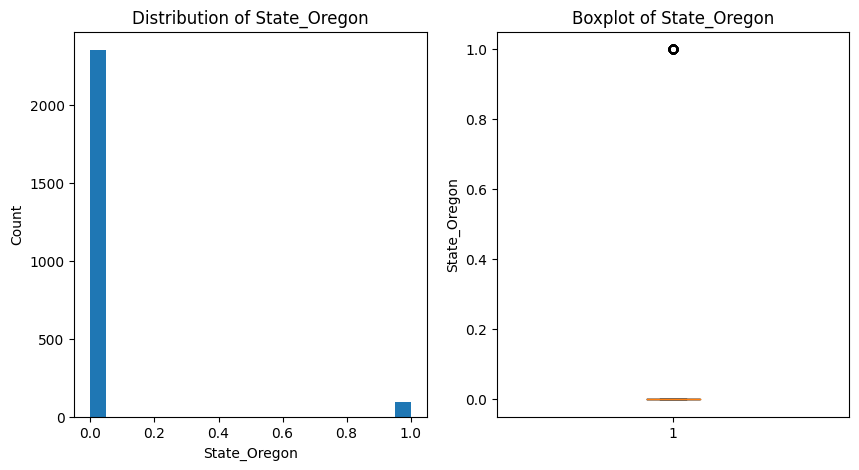

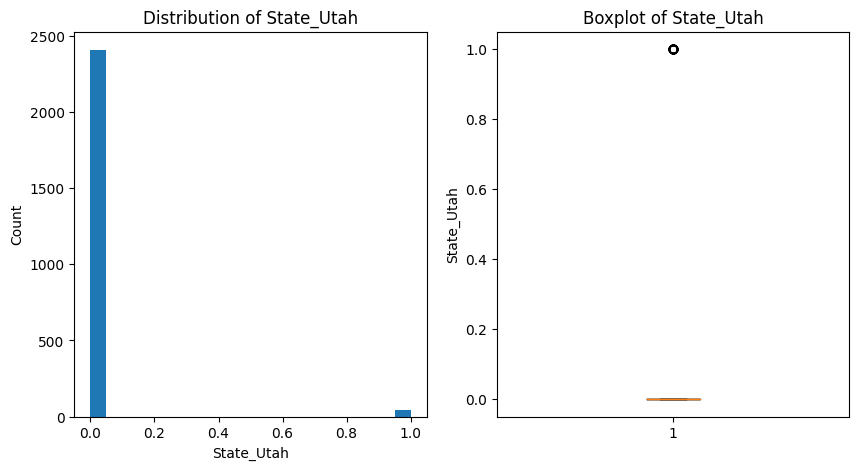

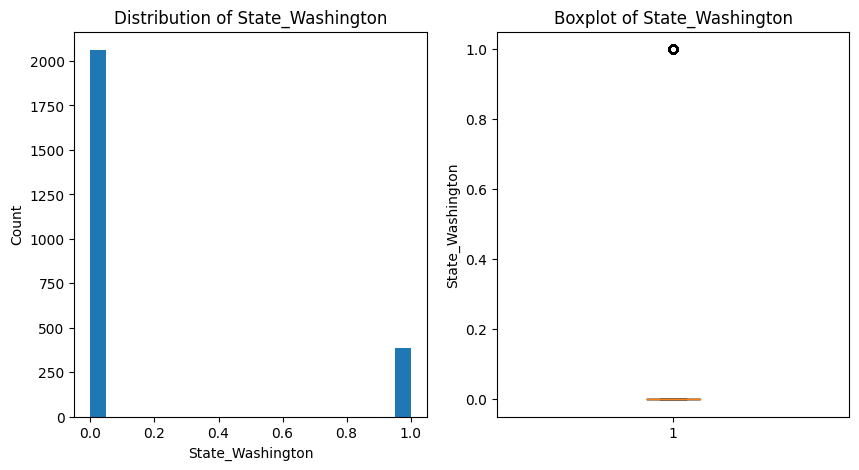

In [64]:
#for column in df.columns:
 #   if df[column].dtype == 'datetime64[ns]':
  #      df[column] = df[column].dt.strftime('%Y-%m-%d %H:%M:%S')

for column in df.columns:
    if df[column].dtype != 'object':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].hist(df[column], bins=20)
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')
        axs[0].set_title('Distribution of ' + column)
        axs[1].boxplot(df[column])
        axs[1].set_ylabel(column)
        axs[1].set_title('Boxplot of ' + column)
        plt.show()

# EDA (Expolatory Data Analysis

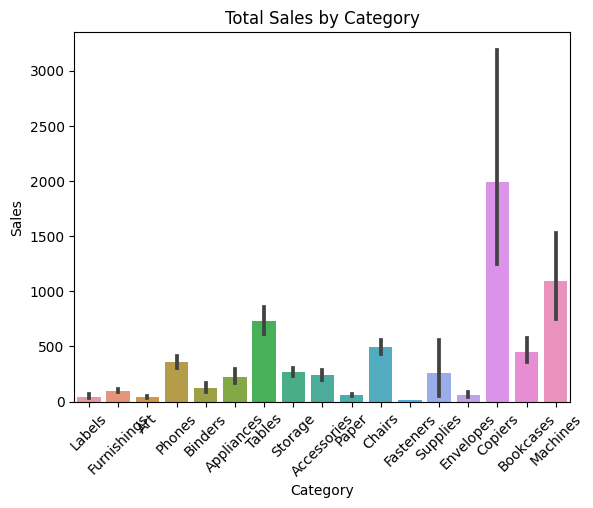

In [9]:
# Bar chart showing the total sales by category
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

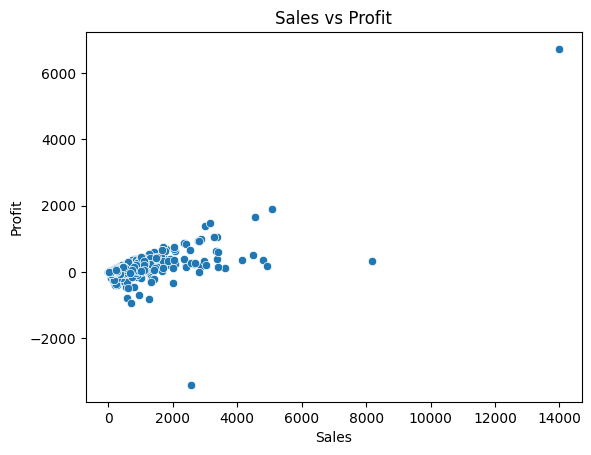

In [10]:
# Scatter plot showing the relationship between sales and profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()

In [11]:
df.head()

Order ID           Order Date            Ship Date    Customer Name  \
0  CA-2013-138688  2013-06-13 00:00:00  2013-06-17 00:00:00  Darrin Van Huff   
1  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
2  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
3  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
4  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   

         Country         City       State     Category  \
0  United States  Los Angeles  California       Labels   
1  United States  Los Angeles  California  Furnishings   
2  United States  Los Angeles  California          Art   
3  United States  Los Angeles  California       Phones   
4  United States  Los Angeles  California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
3                     Mitel 5320 IP Phone VoIP phone  907.152         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
3  90.7152  
4   5.7825

## What is the most popular product category in terms of total sales

In [12]:
df['Category'].unique()

array(['Labels', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances',
       'Tables', 'Storage', 'Accessories', 'Paper', 'Chairs', 'Fasteners',
       'Supplies', 'Envelopes', 'Copiers', 'Bookcases', 'Machines'],
      dtype=object)

In [13]:
popular_category=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

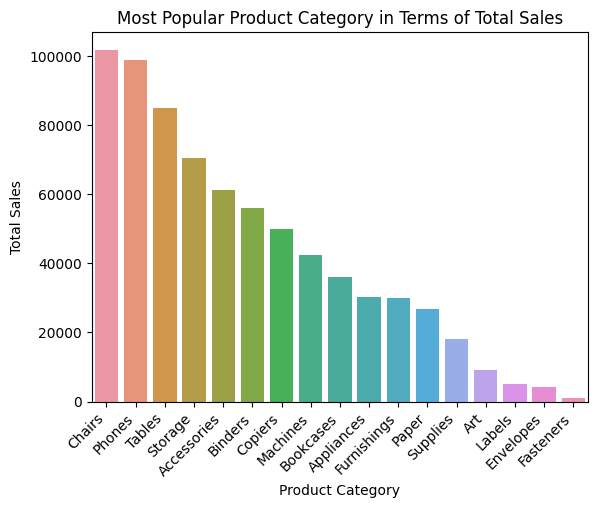

In [14]:
sns.barplot(x=popular_category.index , y=popular_category.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Most Popular Product Category in Terms of Total Sales')
plt.show()

In [15]:
print('The most popular product category in terms of total sales is:',popular_category.index[0])

The most popular product category in terms of total sales is: Chairs


#### Is there a relationship between sales and profit? If yes, how strong is the correlation?

In [16]:
# Calculating the correlation coefficient between Sales and Profit
corr_coef=df['Sales'].corr(df['Profit'])

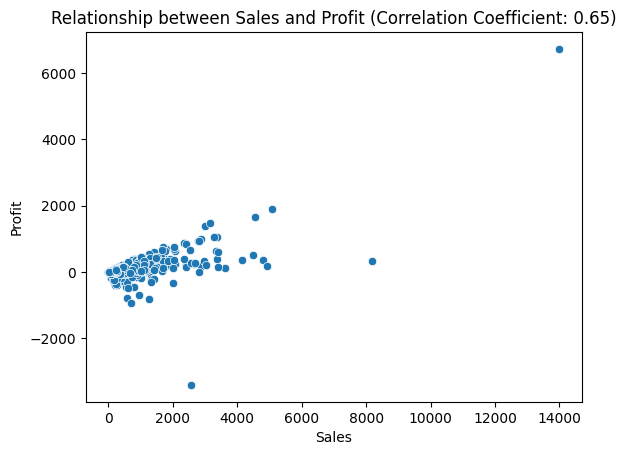

In [17]:
sns.scatterplot(x='Sales',y='Profit',data=df)
plt.title(f"Relationship between Sales and Profit (Correlation Coefficient: {corr_coef:.2f})")
plt.show()

so as we see the correrlation coeefficient is close to 1 that mean it is positive correlation  means that as sales increase, profit also tends to increase

## What is the distribution of sales and profit among the different product categories?

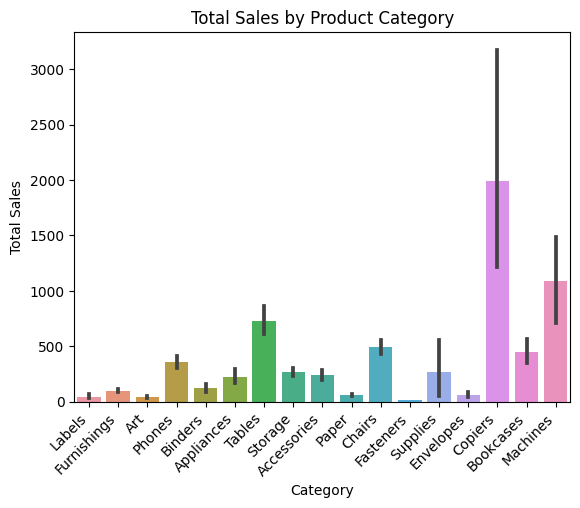

In [18]:
sns.barplot(x='Category',y='Sales',data=df)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,ha='right')
plt.show()

we see the the total sales of copiers , machines and tables are higher sales 

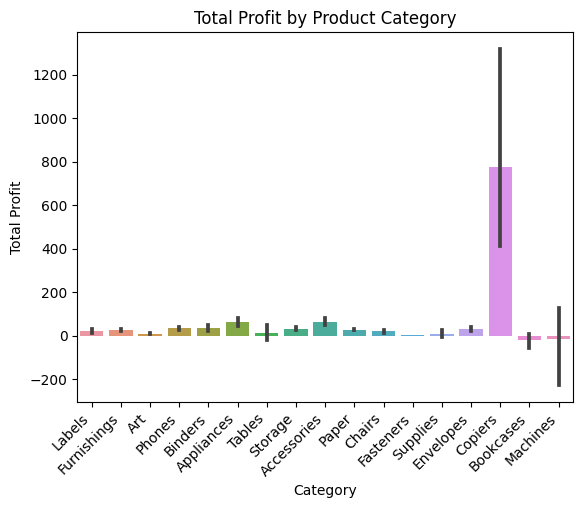

In [19]:
# Creating a bar chart for profit by product category
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Total Profit by Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45,ha='right')
plt.show()


IN that only copiers product are only to make good profit despite of large number of sales

## Which states have the highest and lowest sales and profits?

In [20]:
state_sales=df.groupby('State')['Sales'].sum().reset_index()

In [21]:
state_profit=df.groupby('State')['Profit'].sum().reset_index()

In [22]:
highest_sales =state_sales.sort_values('Sales',ascending=False).reset_index(drop=True)
highest_profit = state_profit.sort_values('Profit', ascending=False).reset_index(drop=True)
lowest_profit = state_profit.sort_values('Profit').reset_index(drop=True)

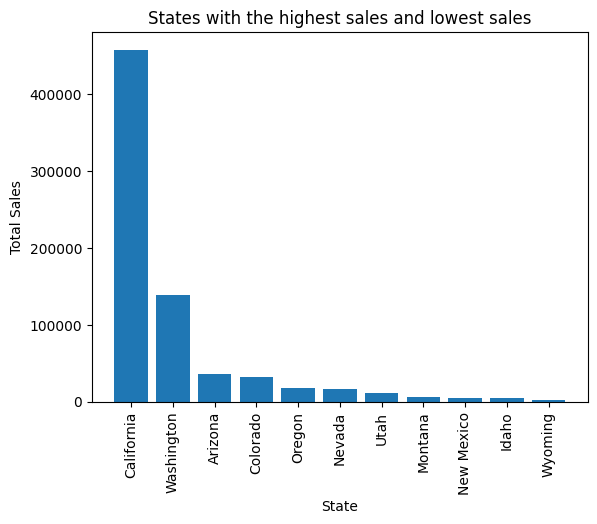

In [23]:
# Creating a bar chart of the states with the highest sales
plt.bar(highest_sales['State'], highest_sales['Sales'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('States with the highest sales and lowest sales')
plt.show()

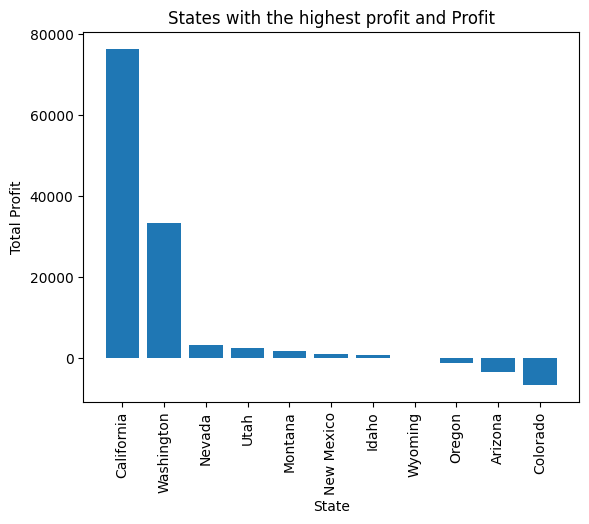

In [24]:
plt.bar(highest_profit['State'], highest_profit['Profit'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('States with the highest profit and Profit')
plt.show()


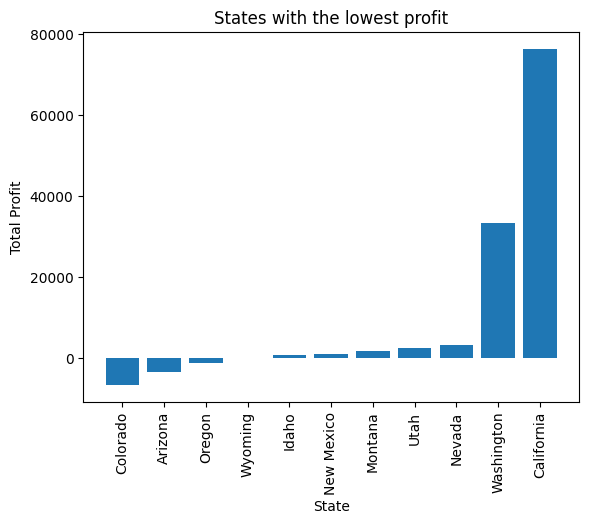

In [25]:
plt.bar(lowest_profit['State'], lowest_profit['Profit'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('States with the lowest profit')
plt.show()

### NOw we remove the outlier from sales , profit and quantity columns 

In [26]:
# using iqr 
columns = ['Sales', 'Quantity', 'Profit']

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    df = df[(df[column] > (Q1 - 1.5 * IQR)) & (df[column] < (Q3 + 1.5 * IQR))]


In [27]:
df.head()

Order ID           Order Date            Ship Date    Customer Name  \
0  CA-2013-138688  2013-06-13 00:00:00  2013-06-17 00:00:00  Darrin Van Huff   
1  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
2  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
4  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
5  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   

         Country         City       State     Category  \
0  United States  Los Angeles  California       Labels   
1  United States  Los Angeles  California  Furnishings   
2  United States  Los Angeles  California          Art   
4  United States  Los Angeles  California      Binders   
5  United States  Los Angeles  California   Appliances   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   
5                   Belkin F5C206VTEL 6 Outlet Surge  114.900         5   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
4   5.7825  
5  34.4700

In [28]:
# Convert categorical columns to numerical columns
#df = pd.get_dummies(df, columns=["Category", "Product Name", "Country", "City", "State"])


In [29]:
# latest one 
df = pd.get_dummies(df, columns=["Category", "Country", "City", "State"])

In [30]:
df.head()

Order ID           Order Date            Ship Date    Customer Name  \
0  CA-2013-138688  2013-06-13 00:00:00  2013-06-17 00:00:00  Darrin Van Huff   
1  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
2  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
4  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   
5  CA-2011-115812  2011-06-09 00:00:00  2011-06-14 00:00:00  Brosina Hoffman   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   
5                   Belkin F5C206VTEL 6 Outlet Surge  114.900         5   

    Profit  Category_Accessories  Category_Appliances  ...  State_Arizona  \
0   6.8714                     0                    0  ...              0   
1  14.1694                     0                    0  ...              0   
2   1.9656                     0                    0  ...              0   
4   5.7825                     0                    0  ...              0   
5  34.4700                     0                    1  ...              0   

   State_California  State_Colorado  State_Idaho  State_Montana  State_Nevada  \
0                 1               0            0              0             0   
1                 1               0            0              0             0   
2                 1               0            0              0             0   
4                 1               0            0              0             0   
5                 1               0            0              0             0   

   State_New Mexico  State_Oregon  State_Utah  State_Washington  
0                 0             0           0                 0  
1                 0             0           0                 0  
2                 0             0           0                 0  
4                 0             0           0                 0  
5                 0             0           0                 0  

[5 rows x 193 columns]

In [31]:
# Split the data into train and test sets
X = df.drop(["Order ID", "Order Date", "Ship Date", "Customer Name",'Product Name', "Sales", "Profit"], axis=1)
y_sales = df["Sales"]
y_profit = df["Profit"]
X_train, X_test, y_sales_train, y_sales_test, y_profit_train, y_profit_test = train_test_split(X, y_sales, y_profit, test_size=0.3, random_state=42)


In [32]:
X_train.shape 

(1712, 186)

In [33]:
X_test.shape

(735, 186)

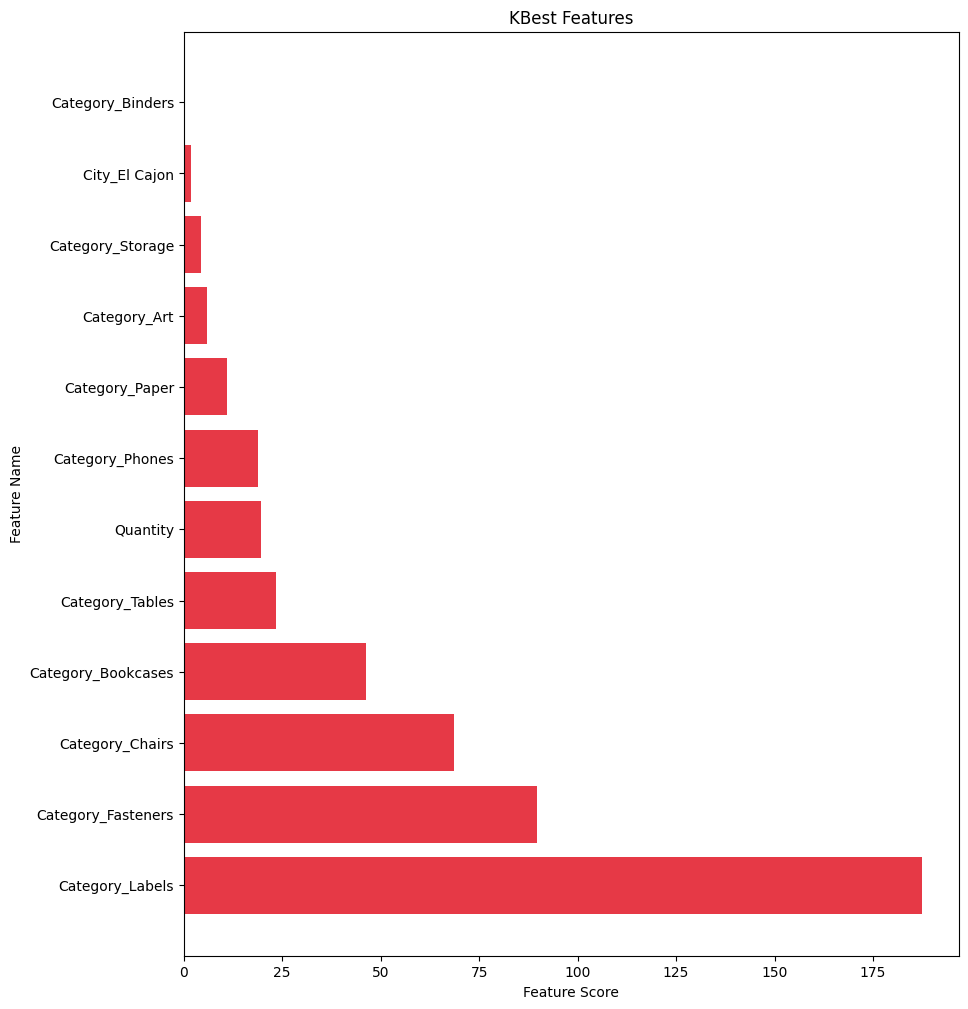

In [35]:
skb=SelectKBest(f_regression,k=12)
KBest_features=skb.fit(X_train,y_sales_train)

mask=KBest_features.get_support(True)
names=[]
for i in mask:
    names.append(X_train.columns[i])

scores=skb.scores_
named_scores=zip(names,scores)
sorted_named_scores=sorted(named_scores,key=lambda z: z[1],reverse=True)

sorted_scores=[score[1] for score in sorted_named_scores]
sorted_names=[name[0] for name in sorted_named_scores]

y_pos=np.arange(len(names))

plt.figure(figsize=(10,12))
plt.barh(y_pos,sorted_scores,height=0.8,align='center',tick_label=sorted_names,color='#E63946')
plt.yticks(y_pos)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('KBest Features');

## Model Preparation 

In [36]:
# Standardize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# Linear regression for sales prediction
lr_sales = LinearRegression()
lr_sales.fit(X_train_scaled, y_sales_train)
y_sales_pred_lr = lr_sales.predict(X_test_scaled)
mse_lr_sales = mean_squared_error(y_sales_test, y_sales_pred_lr)

In [38]:
# SVM for sales prediction
svm_sales = SVR(kernel="linear")
svm_sales.fit(X_train_scaled, y_sales_train)
y_sales_pred_svm = svm_sales.predict(X_test_scaled)
mse_svm_sales = mean_squared_error(y_sales_test, y_sales_pred_svm)

In [39]:
# Random forest for sales prediction
rf_sales = RandomForestRegressor(random_state=42)
rf_sales.fit(X_train_scaled, y_sales_train)
y_sales_pred_rf = rf_sales.predict(X_test_scaled)
mse_rf_sales = mean_squared_error(y_sales_test, y_sales_pred_rf)

In [40]:
# Linear regression for profit prediction
lr_profit = LinearRegression()
lr_profit.fit(X_train_scaled, y_profit_train)
y_profit_pred_lr = lr_profit.predict(X_test_scaled)
mse_lr_profit = mean_squared_error(y_profit_test, y_profit_pred_lr)

In [41]:
# SVM for profit prediction
svm_profit = SVR(kernel="linear")
svm_profit.fit(X_train_scaled, y_profit_train)
y_profit_pred_svm = svm_profit.predict(X_test_scaled)
mse_svm_profit = mean_squared_error(y_profit_test, y_profit_pred_svm)


In [42]:
# Random forest for profit prediction
rf_profit = RandomForestRegressor(random_state=42)
rf_profit.fit(X_train_scaled, y_profit_train)
y_profit_pred_rf = rf_profit.predict(X_test_scaled)
mse_rf_profit = mean_squared_error(y_profit_test, y_profit_pred_rf)


In [43]:
print("MSE for sales prediction using Linear Regression:", mse_lr_sales)
print("MSE for sales prediction using SVM:", mse_svm_sales)
print("MSE for sales prediction using Random Forest:", mse_rf_sales)
print("MSE for profit prediction using Linear Regression:", mse_lr_profit)
print("MSE for profit prediction using SVM:", mse_svm_profit)
print("MSE for profit prediction using Random Forest:", mse_rf_profit)

MSE for sales prediction using Linear Regression: 2.0701376463107834e+27
MSE for sales prediction using SVM: 6219.016489044119
MSE for sales prediction using Random Forest: 4988.990735554603
MSE for profit prediction using Linear Regression: 5.860973831544878e+26
MSE for profit prediction using SVM: 161.64686084905966
MSE for profit prediction using Random Forest: 179.09168242660166


# Compare the Model Perfomance 

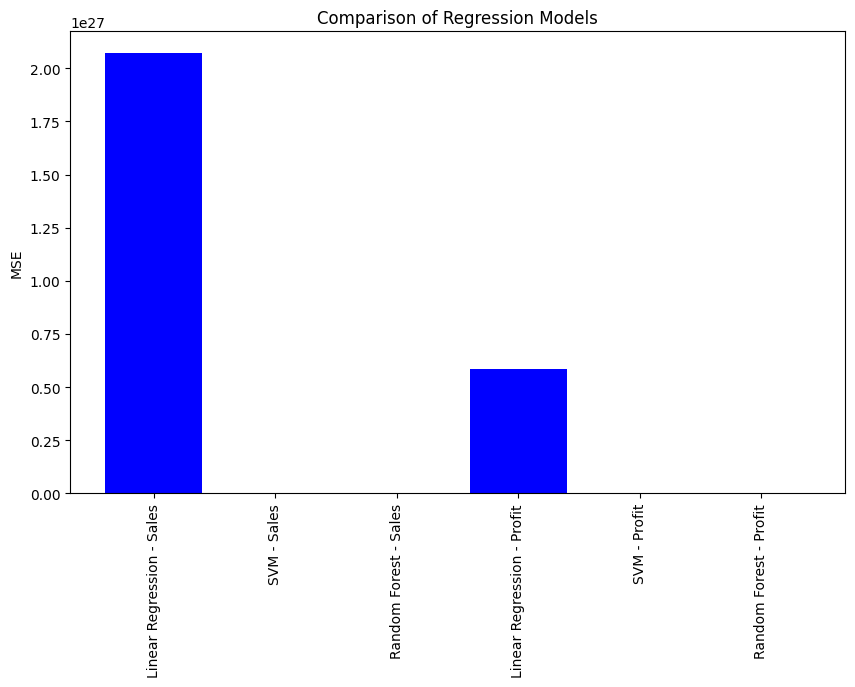

In [44]:
model_results = {
    'Linear Regression - Sales': mse_lr_sales,
    'SVM - Sales':mse_svm_sales,
    'Random Forest - Sales':mse_rf_sales,
    'Linear Regression - Profit': mse_lr_profit,
    'SVM - Profit':mse_svm_profit,
    'Random Forest - Profit':mse_rf_profit
}

fig, ax = plt.subplots(figsize=(10, 6))

x_pos = [i for i, _ in enumerate(model_results.keys())]

ax.bar(x_pos, model_results.values(), color=['b', 'g', 'r', 'b', 'g', 'r'])
ax.set_xticks(x_pos)
ax.set_xticklabels(model_results.keys(), rotation='vertical')
ax.set_ylabel('MSE')
ax.set_title('Comparison of Regression Models')

plt.show()

Linear regression is showing very good accuracy and other are not the reason  dataset is low only 3000 record random require more data for goood accuracy 

In [45]:
out=pd.DataFrame({'Price_actual':y_sales_test,'Price_pred':y_sales_pred_rf})

In [62]:
out.reset_index(drop=True)

Price_actual  Price_pred
0         159.980  130.097152
1          10.480   31.616515
2          12.540   76.806560
3          16.192   20.724406
4           6.456   20.405066
..            ...         ...
730        34.580    7.311389
731        17.712   23.380697
732         2.880    8.285128
733        14.256   35.754374
734        41.904   55.022734

[735 rows x 2 columns]